#            

# ----------------------------- Data Visualization Project -----------------------------

#              

Furkan Mert Şahin

160 304 110 42

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings 
import missingno as msn

## -----------------------------------------------

                

## 1) Covid-19 & Food Datasets

           

## -----------------------------------------------


In [3]:
worldmeter_coronavirus = pd.read_csv("Worldometer_coronavirus_summary_data.csv")
worldmeter_coronavirus = worldmeter_coronavirus.drop(["serious_or_critical"
                                                      ,"total_cases_per_1m_population"
                                                      ,"total_deaths_per_1m_population"
                                                      ,"total_tests_per_1m_population"
                                                      ,"total_confirmed"
                                                      ,"total_deaths"
                                                      ,"total_recovered"
                                                      ,"active_cases"
                                                      ,"total_tests"
                                                      ,"population"],axis=1)

corona_dataset = worldmeter_coronavirus.copy()
worldmeter_coronavirus.rename(columns = {"country":"Country","continent":"Continent"}, inplace=True)
worldmeter_coronavirus

Country          Continent
0                  Afghanistan               Asia
1                      Albania             Europe
2                      Algeria             Africa
3                      Andorra             Europe
4                       Angola             Africa
..                         ...                ...
215  Wallis And Futuna Islands  Australia/Oceania
216             Western Sahara             Africa
217                      Yemen               Asia
218                     Zambia             Africa
219                   Zimbabwe             Africa

[220 rows x 2 columns]

In [4]:

# --------------------------------- Food Supply Quantity (kg) Intake of Countries Dataset ---------------------------------


## This dataset includes percentage of food intake (kg) in countries around the world. 


country_food_supply = pd.read_csv("Food_Supply_Quantity_kg_Data.csv");
country_food_supply = pd.merge(country_food_supply,worldmeter_coronavirus, on = "Country")
country_food_supply = country_food_supply.drop(["Unit (all except Population)","Miscellaneous","Undernourished","Offals","Starchy Roots","Animal fats","Aquatic Products, Other","Fish, Seafood",
                                               "Obesity","Treenuts","Oilcrops","Meat","Stimulants","Sugar Crops","Fruits - Excluding Wine","Spices","Pulses","Milk - Excluding Butter",
                                                      "Vegetal Products","Vegetable Oils","Eggs","Confirmed","Deaths","Active"], axis =1)
country_food_supply

Country  Alcoholic Beverages  Animal Products  \
0    Afghanistan               0.0014           9.4341   
1        Albania               1.6719          18.7684   
2        Algeria               0.2711           9.6334   
3         Angola               5.8087           4.9278   
4      Argentina               4.2672          19.3454   
..           ...                  ...              ...   
140      Vanuatu               0.2424           6.6244   
141      Vietnam               1.4591           8.5765   
142        Yemen               0.0364           5.7874   
143       Zambia               5.7360           6.0197   
144     Zimbabwe               4.0552           8.1489   

     Cereals - Excluding Beer  Sugar & Sweeteners  Vegetables  Recovered  \
0                     24.8097              1.3489      6.7642   0.123374   
1                      5.7817              1.5367     11.7753   1.792636   
2                     13.6816              1.8342     11.6484   0.167572   
3                      9.1085              1.8495      2.3041   0.056808   
4                      8.4102              3.0536      4.3503   3.905192   
..                        ...                 ...         ...        ...   
140                    6.4102              1.3645      3.9175   0.000312   
141                   16.8740              1.2846     11.9508   0.001526   
142                   27.2077              5.0468      3.2135   0.004788   
143                   21.1938              1.5632      3.4649   0.290524   
144                   22.6240              4.6485      2.3213   0.190964   

     Population          Continent  
0    38928000.0               Asia  
1     2838000.0             Europe  
2    44357000.0             Africa  
3    32522000.0             Africa  
4    45377000.0      South America  
..          ...                ...  
140    321000.0  Australia/Oceania  
141  96209000.0               Asia  
142  29826000.0               Asia  
143  18384000.0             Africa  
144  14863000.0             Africa  

[145 rows x 9 columns]

In [5]:
country_food_supply.describe()

Alcoholic Beverages  Animal Products  Cereals - Excluding Beer  \
count           145.000000       145.000000                145.000000   
mean              3.018301        12.365094                 11.860053   
std               2.409926         5.915916                  5.943763   
min               0.000000         1.739100                  3.401400   
25%               0.829800         7.238500                  7.064600   
50%               2.895600        12.131900                 10.141500   
75%               4.714700        16.746600                 15.814400   
max              15.370600        26.886500                 29.804500   

       Sugar & Sweeteners  Vegetables   Recovered    Population  
count          145.000000  145.000000  142.000000  1.450000e+02  
mean             2.807636    5.996748    1.485936  4.611154e+07  
std              1.553084    3.488464    1.904708  1.669247e+08  
min              0.366600    0.914100    0.000000  7.200000e+04  
25%              1.731600    3.608500    0.103276  3.531000e+06  
50%              2.590300    5.002000    0.522317  1.037700e+07  
75%              3.818800    7.718000    2.681275  3.278100e+07  
max              9.725900   19.299500    9.039871  1.402385e+09

In [6]:
country_food_supply.groupby("Continent").aggregate(["min", np.mean, "max"])

Alcoholic Beverages                    Animal Products  \
                                  min      mean      max             min   
Continent                                                                  
Africa                         0.0000  2.820505  15.3706          1.7391   
Asia                           0.0000  1.174249   4.5783          5.1926   
Australia/Oceania              0.2424  3.107150   5.5436          3.8504   
Europe                         1.6719  4.955491   8.0858         12.7089   
North America                  0.9410  3.059783   7.8024          3.5986   
South America                  1.8708  3.660927   4.9690          6.7984   

                                      Cereals - Excluding Beer             \
                        mean      max                      min       mean   
Continent                                                                   
Africa              7.108077  15.0193                   3.5380  15.302623   
Asia               11.748029  25.8904                   6.5119  15.276863   
Australia/Oceania  11.828050  21.4175                   3.6768   7.342037   
Europe             19.386488  26.8865                   4.1196   6.643830   
North America      12.091494  18.6770                   3.4014   9.919156   
South America      13.219018  19.3454                   7.5639  10.580464   

                           Sugar & Sweeteners  ...         Vegetables  \
                       max                min  ...     max        min   
Continent                                      ...                      
Africa             25.9204             0.3666  ...  4.7857     0.9141   
Asia               29.8045             0.5470  ...  5.1366     2.2173   
Australia/Oceania  10.1440             0.8268  ...  9.7259     1.1223   
Europe              9.7485             1.4126  ...  8.1121     3.2587   
North America      16.8052             2.0961  ...  6.2151     1.9480   
South America      14.9132             1.7339  ...  4.7518     2.4981   

                                     Recovered                     Population  \
                       mean      max       min      mean       max        min   
Continent                                                                       
Africa             4.888263  15.7731  0.016330  0.354650  2.461151   556000.0   
Asia               8.339889  19.2995  0.001526  1.515094  6.805249   541000.0   
Australia/Oceania  3.956713   6.6889  0.000312  0.025768  0.101289   200000.0   
Europe             6.388964  12.5188  0.000000  2.894620  9.039871   368000.0   
North America      4.711206   8.3740  0.064054  1.290205  6.773850    72000.0   
South America      4.982791  15.2061  0.884625  2.400274  4.090144   605000.0   

                                               
                           mean           max  
Continent                                      
Africa             2.764228e+07  2.061400e+08  
Asia               1.252044e+08  1.402385e+09  
Australia/Oceania  4.181000e+06  2.575400e+07  
Europe             1.547842e+07  8.330000e+07  
North America      1.410233e+07  1.277920e+08  
South America      3.638627e+07  2.118120e+08  

[6 rows x 21 columns]

In [7]:
country_food_supply.groupby("Continent").mean()

Alcoholic Beverages  Animal Products  \
Continent                                                 
Africa                        2.820505         7.108077   
Asia                          1.174249        11.748029   
Australia/Oceania             3.107150        11.828050   
Europe                        4.955491        19.386488   
North America                 3.059783        12.091494   
South America                 3.660927        13.219018   

                   Cereals - Excluding Beer  Sugar & Sweeteners  Vegetables  \
Continent                                                                     
Africa                            15.302623            1.949770    4.888263   
Asia                              15.276863            2.614240    8.339889   
Australia/Oceania                  7.342037            3.301887    3.956713   
Europe                             6.643830            3.074467    6.388964   
North America                      9.919156            4.211494    4.711206   
South America                     10.580464            3.085327    4.982791   

                   Recovered    Population  
Continent                                   
Africa              0.354650  2.764228e+07  
Asia                1.515094  1.252044e+08  
Australia/Oceania   0.025768  4.181000e+06  
Europe              2.894620  1.547842e+07  
North America       1.290205  1.410233e+07  
South America       2.400274  3.638627e+07

In [8]:

# --------------------------------- Protein Intake of Countries Dataset ---------------------------------


## This dataset includes percentage of protein intake from different types of food in countries around the world. 



country_protein_supply = pd.read_csv("Protein_Supply_Quantity_Data.csv");
country_protein_supply = pd.merge(country_protein_supply,worldmeter_coronavirus, on = "Country")
country_protein_supply = country_protein_supply.drop(["Unit (all except Population)","Miscellaneous","Undernourished","Offals","Starchy Roots","Animal fats","Aquatic Products, Other","Fish, Seafood",
                                               "Obesity","Treenuts","Oilcrops","Meat","Stimulants","Sugar Crops","Fruits - Excluding Wine","Spices","Pulses","Milk - Excluding Butter",
                                                      "Vegetal Products","Vegetable Oils","Eggs","Confirmed","Deaths","Active"], axis =1)
country_protein_supply


Country  Alcoholic Beverages  Animal Products  \
0    Afghanistan               0.0000           9.7523   
1        Albania               0.1840          27.7469   
2        Algeria               0.0323          13.8360   
3         Angola               0.6285          15.2311   
4      Argentina               0.1704          31.9799   
..           ...                  ...              ...   
140      Vanuatu               0.0078          19.8713   
141      Vietnam               0.1555          20.4466   
142        Yemen               0.0000          10.0122   
143       Zambia               0.4824           9.8925   
144     Zimbabwe               0.2929          11.3443   

     Cereals - Excluding Beer  Sugar & Sweeteners  Vegetables  Recovered  \
0                     35.9771              0.0000      1.1370   0.123374   
1                     14.2331              0.0042      3.2456   1.792636   
2                     26.5633              0.0000      3.1267   0.167572   
3                     20.3882              0.0092      0.8133   0.056808   
4                     13.6702              0.0049      1.0516   3.905192   
..                        ...                 ...         ...        ...   
140                   14.6387              0.0000      1.5847   0.000312   
141                   18.5247              0.0056      3.7216   0.001526   
142                   35.1179              0.0000      0.5448   0.004788   
143                   28.5182              0.0000      0.8039   0.290524   
144                   33.1934              0.0000      0.5955   0.190964   

     Population          Continent  
0    38928000.0               Asia  
1     2838000.0             Europe  
2    44357000.0             Africa  
3    32522000.0             Africa  
4    45377000.0      South America  
..          ...                ...  
140    321000.0  Australia/Oceania  
141  96209000.0               Asia  
142  29826000.0               Asia  
143  18384000.0             Africa  
144  14863000.0             Africa  

[145 rows x 9 columns]

In [9]:
country_protein_supply.describe()

Alcoholic Beverages  Animal Products  Cereals - Excluding Beer  \
count           145.000000       145.000000                145.000000   
mean              0.257350        21.249543                 19.042886   
std               0.234121         7.973036                  6.564720   
min               0.000000         4.456100                  7.808100   
25%               0.065700        14.549800                 13.653100   
50%               0.201000        21.852100                 17.566600   
75%               0.382300        28.497600                 23.886900   
max               1.366000        35.786000                 35.977100   

       Sugar & Sweeteners  Vegetables   Recovered    Population  
count          145.000000  145.000000  142.000000  1.450000e+02  
mean             0.009401    1.691142    1.485936  4.611154e+07  
std              0.045035    0.935232    1.904708  1.669247e+08  
min              0.000000    0.163100    0.000000  7.200000e+04  
25%              0.000000    0.978700    0.103276  3.531000e+06  
50%              0.000000    1.514800    0.522317  1.037700e+07  
75%              0.004900    2.020900    2.681275  3.278100e+07  
max              0.469900    5.054600    9.039871  1.402385e+09

In [10]:
country_protein_supply.groupby("Continent").aggregate(["min", np.mean, "max"])

Alcoholic Beverages                   Animal Products  \
                                  min      mean     max             min   
Continent                                                                 
Africa                         0.0000  0.283305  1.3660          4.4561   
Asia                           0.0000  0.098777  0.4817          8.5877   
Australia/Oceania              0.0078  0.231887  0.3778         14.7782   
Europe                         0.1588  0.460176  0.7973         21.6930   
North America                  0.0000  0.171478  0.4784          9.9930   
South America                  0.0000  0.218073  0.4165         18.8205   

                                      Cereals - Excluding Beer             \
                        mean      max                      min       mean   
Continent                                                                   
Africa             13.090888  24.3394                   8.8276  23.794020   
Asia               20.014571  34.0697                  10.8868  21.699900   
Australia/Oceania  26.295137  32.9981                   8.4665  13.044487   
Europe             29.071909  35.7860                   9.3826  13.974982   
North America      23.217150  34.1684                   7.8081  16.550428   
South America      24.490491  31.9799                  12.1671  16.956655   

                           Sugar & Sweeteners  ...         Vegetables  \
                       max                min  ...     max        min   
Continent                                      ...                      
Africa             33.1934                0.0  ...  0.0431     0.1631   
Asia               35.9771                0.0  ...  0.2625     0.5448   
Australia/Oceania  16.8335                0.0  ...  0.0058     0.4752   
Europe             20.3469                0.0  ...  0.0387     0.9787   
North America      23.8869                0.0  ...  0.0428     0.6605   
South America      22.6665                0.0  ...  0.4699     0.7753   

                                    Recovered                     Population  \
                       mean     max       min      mean       max        min   
Continent                                                                      
Africa             1.436800  4.2371  0.016330  0.354650  2.461151   556000.0   
Asia               2.178040  5.0546  0.001526  1.515094  6.805249   541000.0   
Australia/Oceania  1.282863  1.7640  0.000312  0.025768  0.101289   200000.0   
Europe             1.868964  3.2456  0.000000  2.894620  9.039871   368000.0   
North America      1.279183  2.6759  0.064054  1.290205  6.773850    72000.0   
South America      1.504382  4.4560  0.884625  2.400274  4.090144   605000.0   

                                               
                           mean           max  
Continent                                      
Africa             2.764228e+07  2.061400e+08  
Asia               1.252044e+08  1.402385e+09  
Australia/Oceania  4.181000e+06  2.575400e+07  
Europe             1.547842e+07  8.330000e+07  
North America      1.410233e+07  1.277920e+08  
South America      3.638627e+07  2.118120e+08  

[6 rows x 21 columns]

In [11]:
country_protein_supply.groupby("Continent").mean()

Alcoholic Beverages  Animal Products  \
Continent                                                 
Africa                        0.283305        13.090888   
Asia                          0.098777        20.014571   
Australia/Oceania             0.231887        26.295137   
Europe                        0.460176        29.071909   
North America                 0.171478        23.217150   
South America                 0.218073        24.490491   

                   Cereals - Excluding Beer  Sugar & Sweeteners  Vegetables  \
Continent                                                                     
Africa                            23.794020            0.001455    1.436800   
Asia                              21.699900            0.014809    2.178040   
Australia/Oceania                 13.044487            0.001412    1.282863   
Europe                            13.974982            0.005773    1.868964   
North America                     16.550428            0.004867    1.279183   
South America                     16.956655            0.045200    1.504382   

                   Recovered    Population  
Continent                                   
Africa              0.354650  2.764228e+07  
Asia                1.515094  1.252044e+08  
Australia/Oceania   0.025768  4.181000e+06  
Europe              2.894620  1.547842e+07  
North America       1.290205  1.410233e+07  
South America       2.400274  3.638627e+07

In [12]:

# --------------------------------- Energy Intake of Countries (kcal) Dataset ---------------------------------


# This dataset includes percentage of energy intake (kcal) from different types of food in countries around the world. 



country_kcal_supply = pd.read_csv("Food_Supply_kcal_Data.csv");
country_kcal_supply = pd.merge(country_kcal_supply,worldmeter_coronavirus, on = "Country")
country_kcal_supply = country_kcal_supply.drop(["Unit (all except Population)","Miscellaneous","Undernourished","Offals","Starchy Roots","Animal fats","Aquatic Products, Other","Fish, Seafood",
                                               "Obesity","Treenuts","Oilcrops","Meat","Stimulants","Sugar Crops","Fruits - Excluding Wine","Spices","Pulses","Milk - Excluding Butter",
                                                      "Vegetal Products","Vegetable Oils","Eggs","Confirmed","Deaths","Active"], axis =1)
country_kcal_supply

Country  Alcoholic Beverages  Animal Products  \
0    Afghanistan               0.0000           4.7774   
1        Albania               0.9120          16.0930   
2        Algeria               0.0896           6.0326   
3         Angola               1.9388           4.6927   
4      Argentina               1.4354          14.9869   
..           ...                  ...              ...   
140      Vanuatu               0.2668           7.4519   
141      Vietnam               0.7150          10.9806   
142        Yemen               0.0000           3.4667   
143       Zambia               1.1925           3.3043   
144     Zimbabwe               1.4269           3.9356   

     Cereals - Excluding Beer  Sugar & Sweeteners  Vegetables  Recovered  \
0                     37.1186              2.2261      0.7504   0.123374   
1                     16.2107              3.4422      2.7508   1.792636   
2                     25.0112              3.9869      2.0457   0.167572   
3                     18.3521              2.7539      0.3525   0.056808   
4                     16.7927              7.0536      0.8643   3.905192   
..                        ...                 ...         ...        ...   
140                   16.1044              2.4204      0.6099   0.000312   
141                   26.9833              2.0940      1.9578   0.001526   
142                   32.0727              7.0303      0.3636   0.004788   
143                   31.5528              2.5590      0.4472   0.290524   
144                   29.8044              5.0403      0.2532   0.190964   

     Population          Continent  
0    38928000.0               Asia  
1     2838000.0             Europe  
2    44357000.0             Africa  
3    32522000.0             Africa  
4    45377000.0      South America  
..          ...                ...  
140    321000.0  Australia/Oceania  
141  96209000.0               Asia  
142  29826000.0               Asia  
143  18384000.0             Africa  
144  14863000.0             Africa  

[145 rows x 9 columns]

In [13]:
country_kcal_supply.describe()

Alcoholic Beverages  Animal Products  Cereals - Excluding Beer  \
count           145.000000       145.000000                145.000000   
mean              1.301438         9.388809                 20.370450   
std               1.050185         4.843865                  6.529553   
min               0.000000         1.623700                  8.956500   
25%               0.354300         5.183100                 14.754600   
50%               1.236700         8.854400                 19.632900   
75%               1.995500        13.206100                 24.822100   
max               5.157400        22.291100                 37.526500   

       Sugar & Sweeteners  Vegetables   Recovered    Population  
count          145.000000  145.000000  142.000000  1.450000e+02  
mean             4.821679    1.072581    1.485936  4.611154e+07  
std              2.079098    0.636362    1.904708  1.669247e+08  
min              0.678600    0.095700    0.000000  7.200000e+04  
25%              3.473100    0.602300    0.103276  3.531000e+06  
50%              4.647900    1.014100    0.522317  1.037700e+07  
75%              6.326000    1.315200    2.681275  3.278100e+07  
max              9.549200    3.352400    9.039871  1.402385e+09

In [14]:
country_kcal_supply.groupby("Continent").aggregate(["min", np.mean, "max"])

Alcoholic Beverages                   Animal Products  \
                                  min      mean     max             min   
Continent                                                                 
Africa                         0.0000  0.830260  2.5188          1.6237   
Asia                           0.0000  0.627180  2.4472          2.3695   
Australia/Oceania              0.2668  1.101500  1.9783          4.1693   
Europe                         0.9120  2.565594  5.1574          9.8831   
North America                  0.5887  1.453567  2.9145          3.7884   
South America                  0.5719  1.264182  1.8252          5.7963   

                                      Cereals - Excluding Beer             \
                        mean      max                      min       mean   
Continent                                                                   
Africa              4.537400   8.5288                   8.9565  24.251993   
Asia                8.583223  20.3754                  14.6746  24.384171   
Australia/Oceania  11.585375  15.6146                   9.6134  14.820150   
Europe             15.150694  22.2911                  10.6717  14.605830   
North America       9.726406  14.7930                  10.7274  17.850100   
South America      10.157936  14.9869                  14.5913  18.939464   

                           Sugar & Sweeteners  ...         Vegetables  \
                       max                min  ...     max        min   
Continent                                      ...                      
Africa             34.6044             0.6786  ...  6.3512     0.0957   
Asia               37.5265             0.9069  ...  7.7290     0.3636   
Australia/Oceania  18.1338             1.7424  ...  8.8706     0.2074   
Europe             20.0791             3.4422  ...  7.8963     0.8423   
North America      25.0904             4.0425  ...  9.3995     0.3696   
South America      23.4396             3.6908  ...  9.5492     0.4638   

                                    Recovered                     Population  \
                       mean     max       min      mean       max        min   
Continent                                                                      
Africa             0.785305  2.3655  0.016330  0.354650  2.461151   556000.0   
Asia               1.397097  3.3524  0.001526  1.515094  6.805249   541000.0   
Australia/Oceania  0.758400  1.1326  0.000312  0.025768  0.101289   200000.0   
Europe             1.308367  2.7508  0.000000  2.894620  9.039871   368000.0   
North America      0.825556  1.5185  0.064054  1.290205  6.773850    72000.0   
South America      1.010036  3.1889  0.884625  2.400274  4.090144   605000.0   

                                               
                           mean           max  
Continent                                      
Africa             2.764228e+07  2.061400e+08  
Asia               1.252044e+08  1.402385e+09  
Australia/Oceania  4.181000e+06  2.575400e+07  
Europe             1.547842e+07  8.330000e+07  
North America      1.410233e+07  1.277920e+08  
South America      3.638627e+07  2.118120e+08  

[6 rows x 21 columns]

In [15]:
country_kcal_supply.groupby("Continent").mean()

Alcoholic Beverages  Animal Products  \
Continent                                                 
Africa                        0.830260         4.537400   
Asia                          0.627180         8.583223   
Australia/Oceania             1.101500        11.585375   
Europe                        2.565594        15.150694   
North America                 1.453567         9.726406   
South America                 1.264182        10.157936   

                   Cereals - Excluding Beer  Sugar & Sweeteners  Vegetables  \
Continent                                                                     
Africa                            24.251993            3.219888    0.785305   
Asia                              24.384171            4.431023    1.397097   
Australia/Oceania                 14.820150            4.596500    0.758400   
Europe                            14.605830            5.302048    1.308367   
North America                     17.850100            7.432100    0.825556   
South America                     18.939464            6.340436    1.010036   

                   Recovered    Population  
Continent                                   
Africa              0.354650  2.764228e+07  
Asia                1.515094  1.252044e+08  
Australia/Oceania   0.025768  4.181000e+06  
Europe              2.894620  1.547842e+07  
North America       1.290205  1.410233e+07  
South America       2.400274  3.638627e+07

## ---------------------------------------------

## 2) Data Preparation

## ---------------------------------------------


### Completion of Missing Data

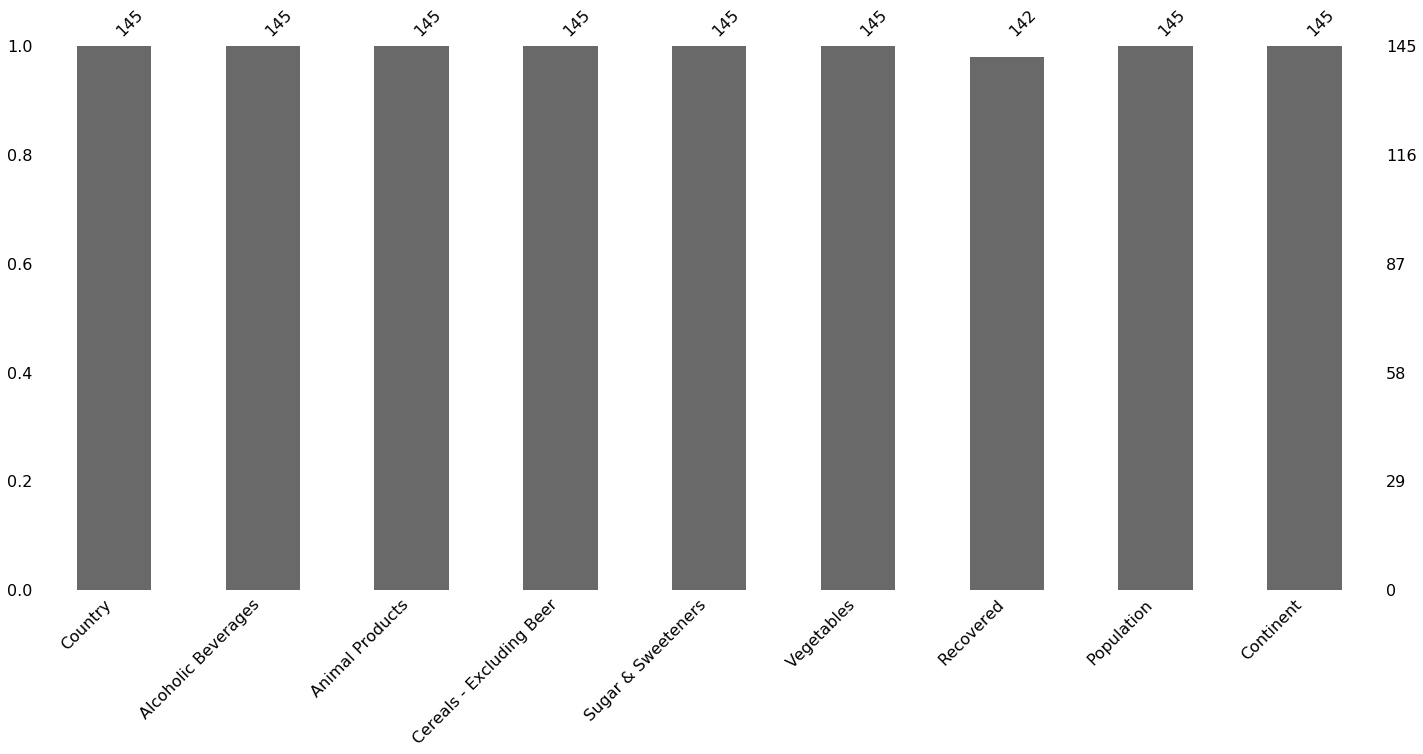

In [16]:
msn.bar(country_food_supply)

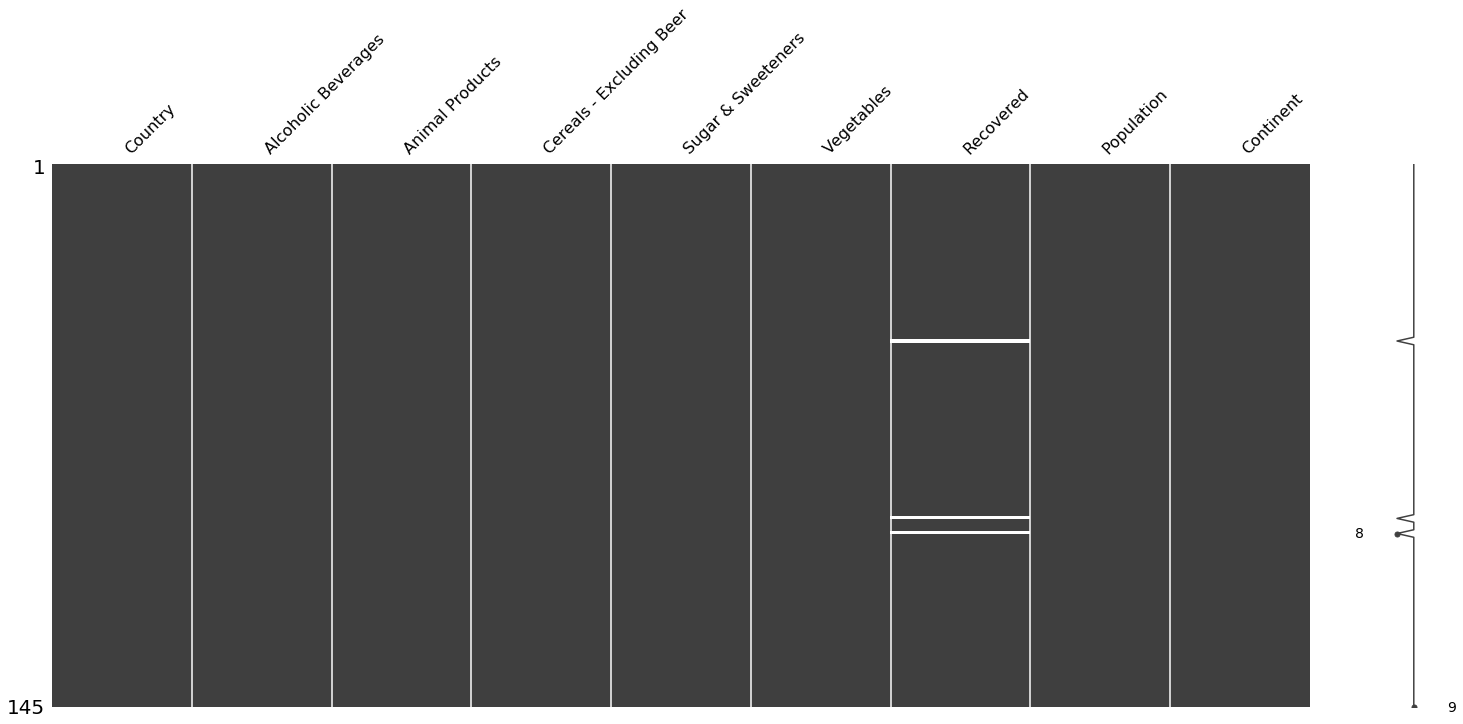

In [17]:
msn.matrix(country_food_supply)

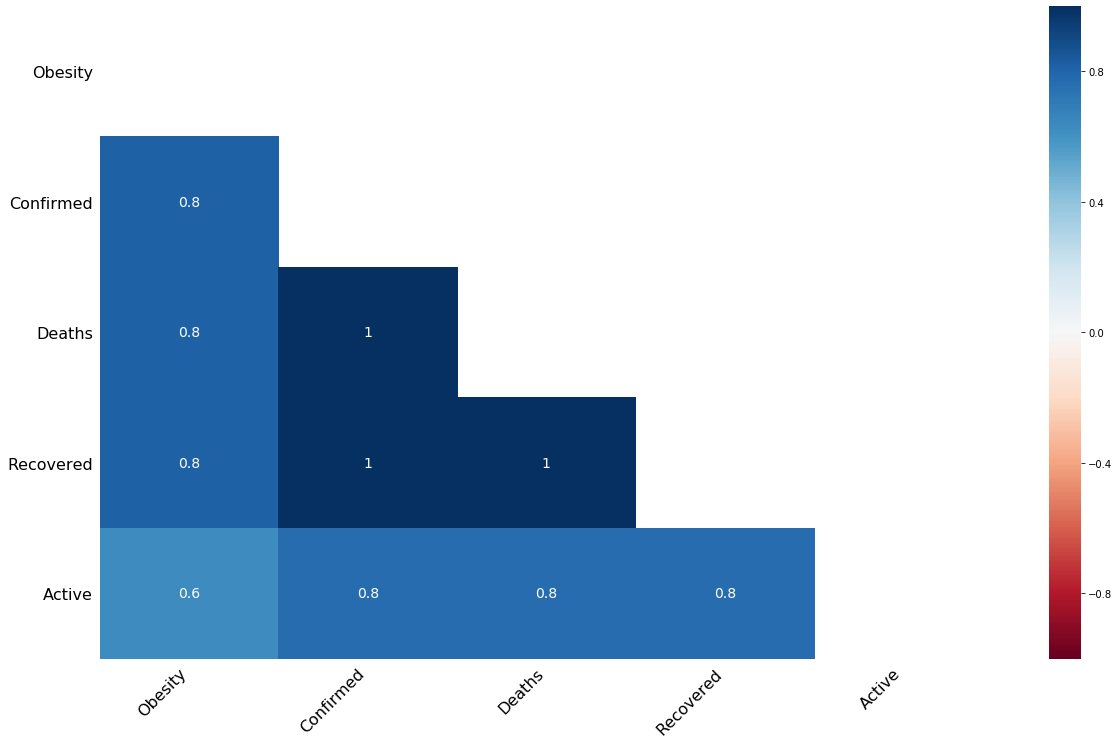

In [20]:
msn.heatmap(country_food_supply);

In [14]:
country_food_supply.isnull().sum()     # Columns with Missing Data in the Food Supply Dataset

Country                     0
Alcoholic Beverages         0
Animal Products             0
Cereals - Excluding Beer    0
Sugar & Sweeteners          0
Vegetables                  0
Recovered                   3
Population                  0
Continent                   0
dtype: int64

In [15]:
country_protein_supply.isnull().sum()     # Columns with Missing Data in the Protein Supply Dataset

Country                     0
Alcoholic Beverages         0
Animal Products             0
Cereals - Excluding Beer    0
Sugar & Sweeteners          0
Vegetables                  0
Recovered                   3
Population                  0
Continent                   0
dtype: int64

In [16]:
country_kcal_supply.isnull().sum()     # Columns with Missing Data in the Energy Supply Dataset

Country                     0
Alcoholic Beverages         0
Animal Products             0
Cereals - Excluding Beer    0
Sugar & Sweeteners          0
Vegetables                  0
Recovered                   3
Population                  0
Continent                   0
dtype: int64

In [21]:

# Food Supply Dataset

# Since the data gap in the columns was not too large, the missing data was filled with the value assignment approach.

country_food_supply["Recovered"].fillna(country_food_supply["Recovered"].mean(),inplace=True)

country_food_supply.isnull().sum()  # With the value assignment approach, missing data were filled with average data.


Country                     0
Alcoholic Beverages         0
Animal Products             0
Cereals - Excluding Beer    0
Sugar & Sweeteners          0
Vegetables                  0
Recovered                   0
Population                  0
Continent                   0
dtype: int64

In [22]:

# Protein Supply Dataset

# Note: Since there are the same columns in each dataset, the same operations were performed.

country_protein_supply["Recovered"].fillna(country_protein_supply["Recovered"].mean(),inplace=True)

country_protein_supply.isnull().sum()  # With the value assignment approach, missing data were filled with average data.


Country                     0
Alcoholic Beverages         0
Animal Products             0
Cereals - Excluding Beer    0
Sugar & Sweeteners          0
Vegetables                  0
Recovered                   0
Population                  0
Continent                   0
dtype: int64

In [23]:

# Energy (kcal) Supply Dataset

# Note: Since there are the same columns in each dataset, the same operations were performed.

country_kcal_supply["Recovered"].fillna(country_kcal_supply["Recovered"].mean(),inplace=True)

country_kcal_supply.isnull().sum()  # With the value assignment approach, missing data were filled with average data.


Country                     0
Alcoholic Beverages         0
Animal Products             0
Cereals - Excluding Beer    0
Sugar & Sweeteners          0
Vegetables                  0
Recovered                   0
Population                  0
Continent                   0
dtype: int64

In [28]:
country_food_supply.dtypes

Country                      object
Alcoholic Beverages         float64
Animal fats                 float64
Animal Products             float64
Aquatic Products, Other     float64
Cereals - Excluding Beer    float64
Eggs                        float64
Fish, Seafood               float64
Fruits - Excluding Wine     float64
Meat                        float64
Milk - Excluding Butter     float64
Oilcrops                    float64
Pulses                      float64
Spices                      float64
Stimulants                  float64
Sugar & Sweeteners          float64
Sugar Crops                 float64
Treenuts                    float64
Vegetable Oils              float64
Vegetables                  float64
Vegetal Products            float64
Obesity                     float64
Confirmed                   float64
Deaths                      float64
Recovered                   float64
Active                      float64
Population                  float64
Continent                   

## --------------------------------------------------

## 3) Visualization of Covid-19 & Food Datasets

## --------------------------------------------------


## Food Supply Dataset

### Bar Plots

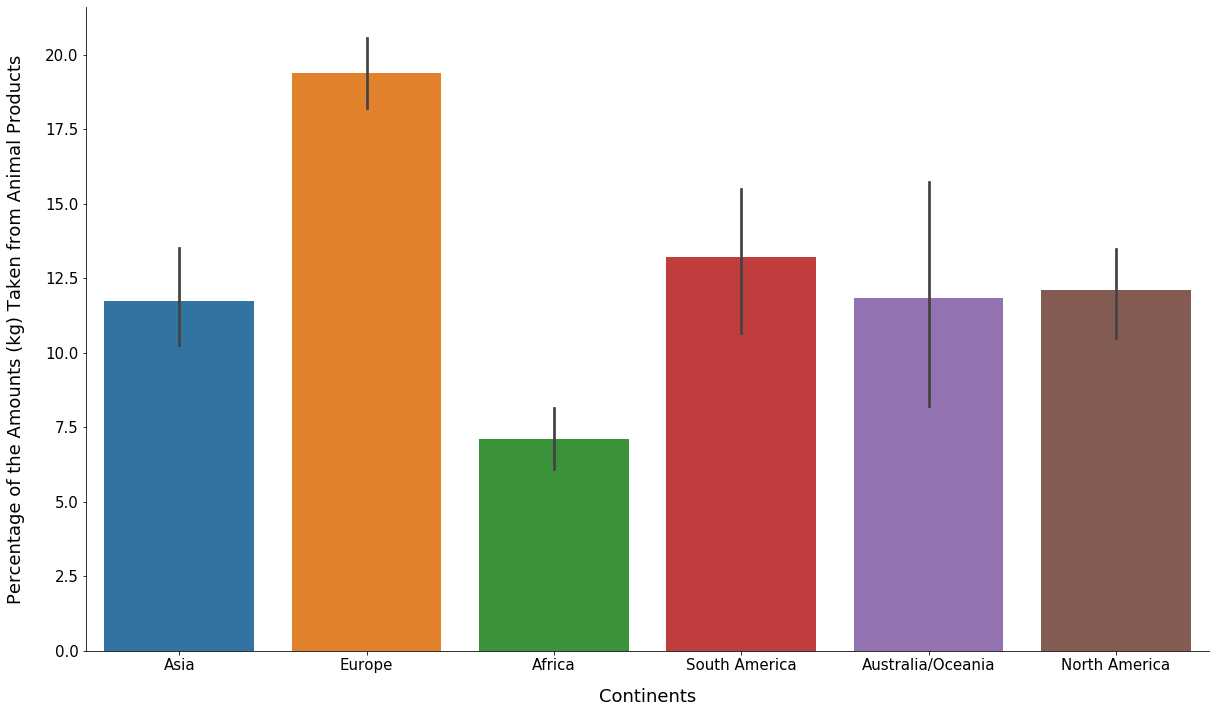

In [26]:

sns.catplot(x = "Continent", y = "Animal Products", data = country_food_supply, height=10,kind = "bar");
plt.xlabel("Continents",labelpad = 15)
plt.ylabel("Percentage of the Amounts (kg) Taken from Animal Products",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(18,10)

plt.rc("font", size = 15)
plt.rc("axes", labelsize = 18)

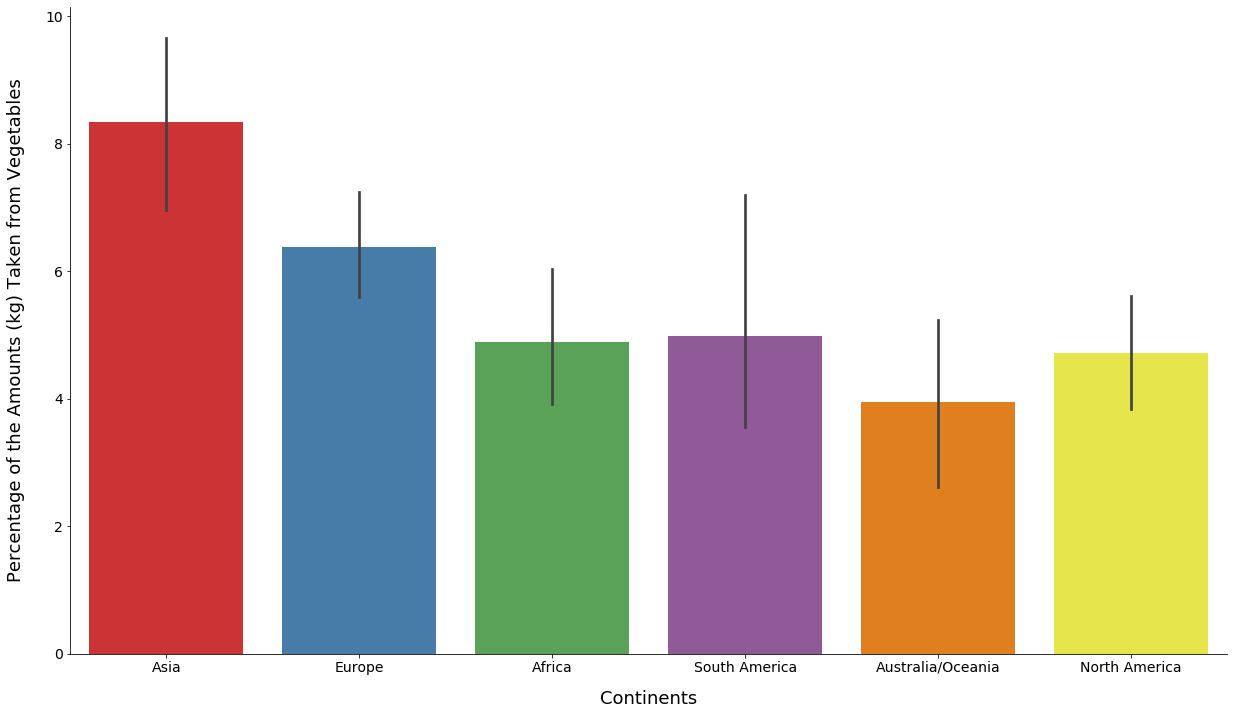

In [85]:

sns.catplot(x = "Continent", y = "Vegetables", data = country_food_supply, height=10,kind = "bar",palette="Set1");
plt.xlabel("Continents",labelpad = 15)
plt.ylabel("Percentage of the Amounts (kg) Taken from Vegetables",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(18,10)

plt.rc("font", size = 14)
plt.rc("axes", labelsize = 18)


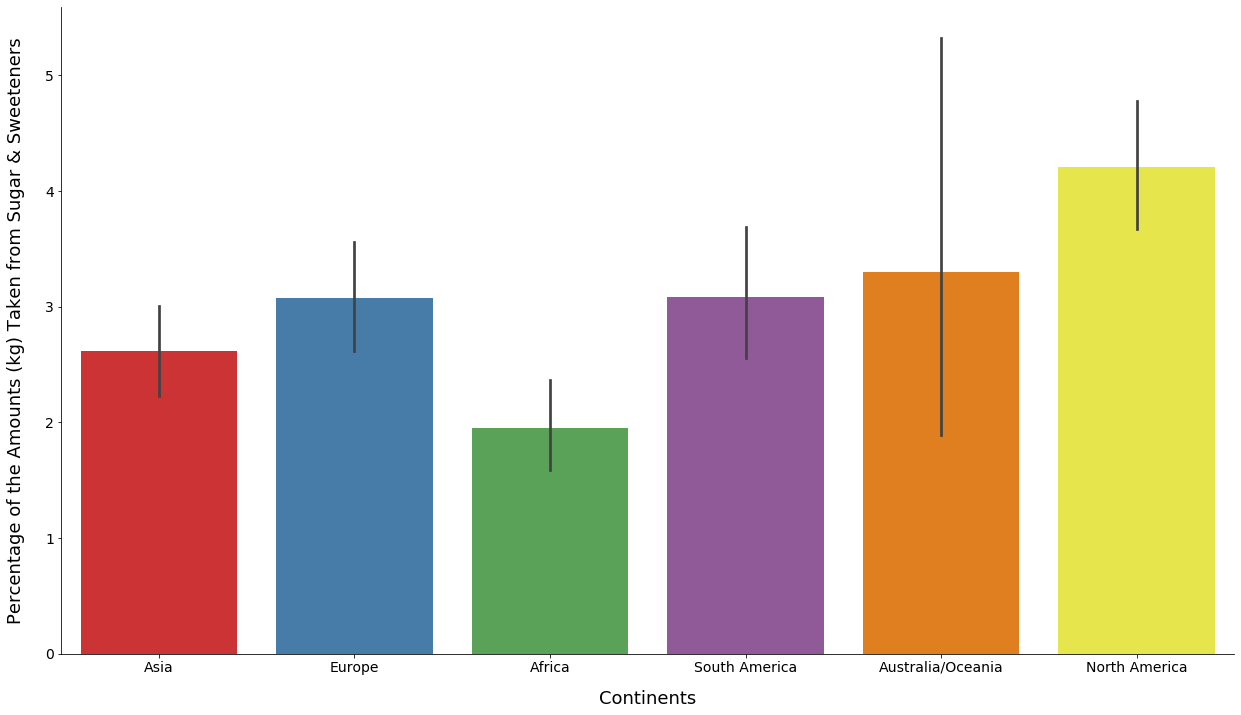

In [81]:

sns.catplot(x = "Continent", y = "Sugar & Sweeteners", data = country_food_supply, height=10,kind = "bar",palette="Set1");
plt.xlabel("Continents",labelpad = 15)
plt.ylabel("Percentage of the Amounts (kg) Taken from Sugar & Sweeteners",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(18,10)

plt.rc("font", size = 14)
plt.rc("axes", labelsize = 18)


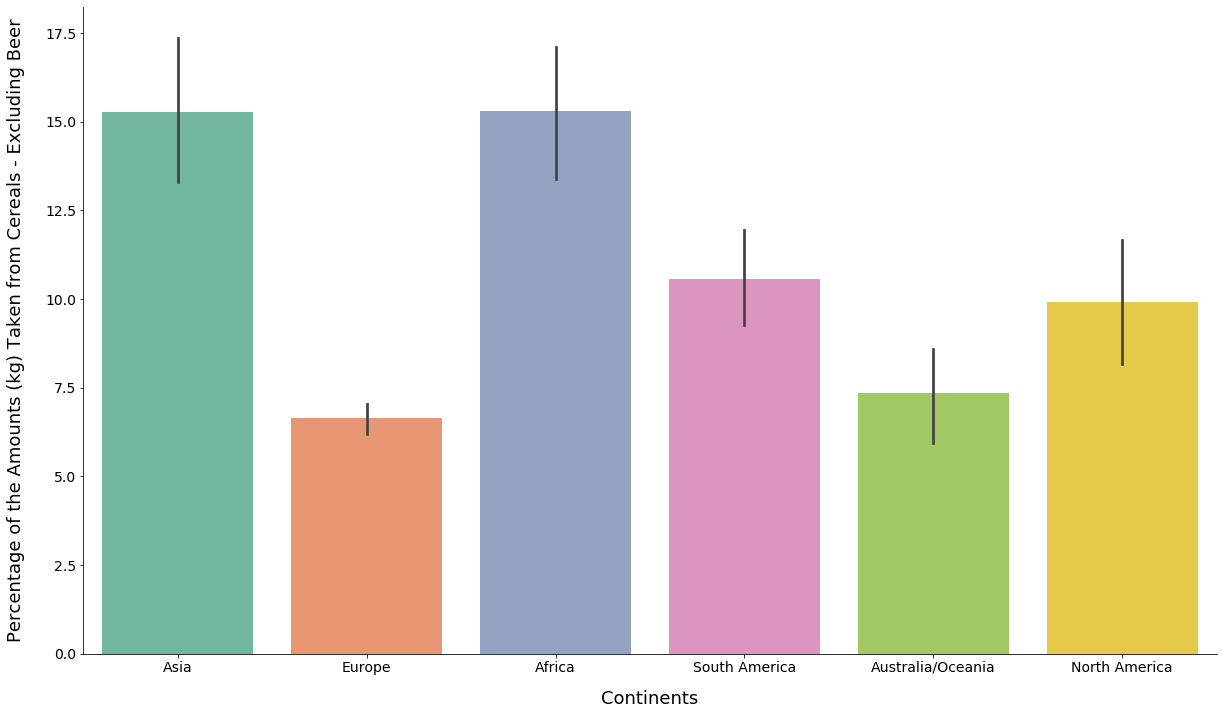

In [77]:

sns.catplot(x = "Continent", y = "Cereals - Excluding Beer", data = country_food_supply, height=10,kind = "bar",palette="Set2");
plt.xlabel("Continents",labelpad = 15)
plt.ylabel("Percentage of the Amounts (kg) Taken from Cereals - Excluding Beer",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(18,10)

plt.rc("font", size = 14)
plt.rc("axes", labelsize = 18)


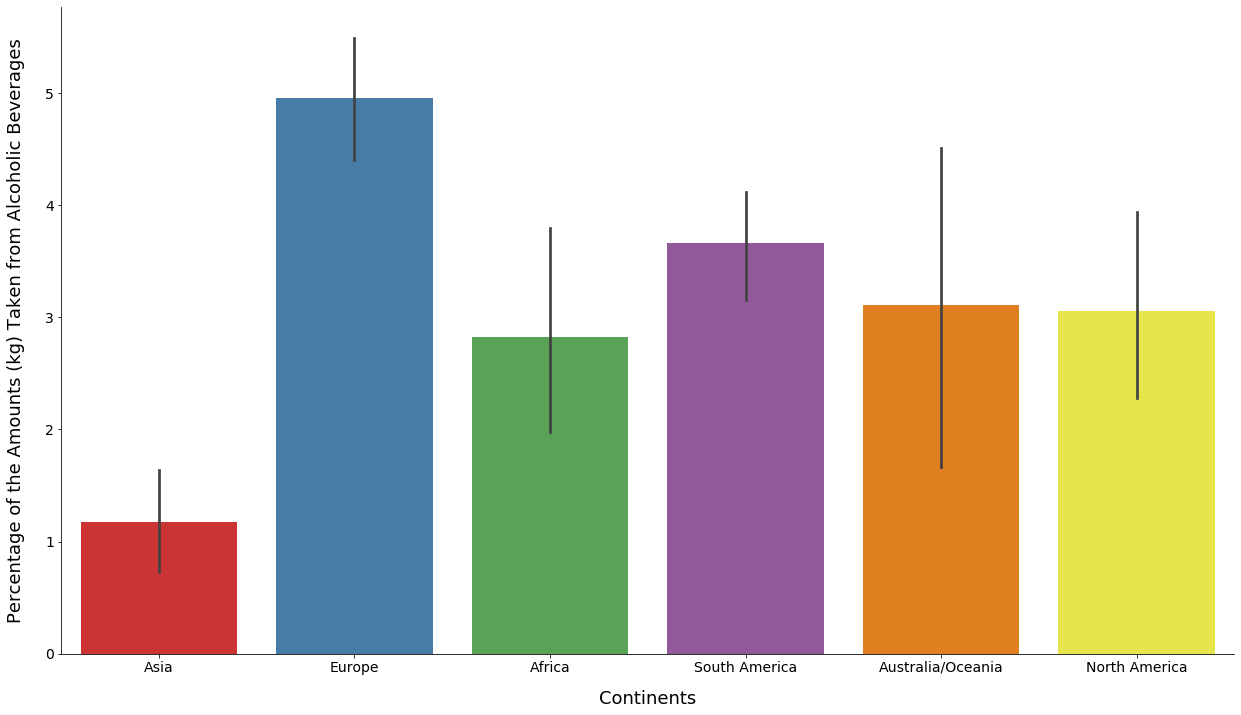

In [83]:

sns.catplot(x = "Continent", y = "Alcoholic Beverages", data = country_food_supply, height=10,kind = "bar",palette="Set1");
plt.xlabel("Continents",labelpad = 15)
plt.ylabel("Percentage of the Amounts (kg) Taken from Alcoholic Beverages",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(18,10)

plt.rc("font", size = 14)
plt.rc("axes", labelsize = 18)


##      
## COVID-19 Recovery Situation of Continents
##   

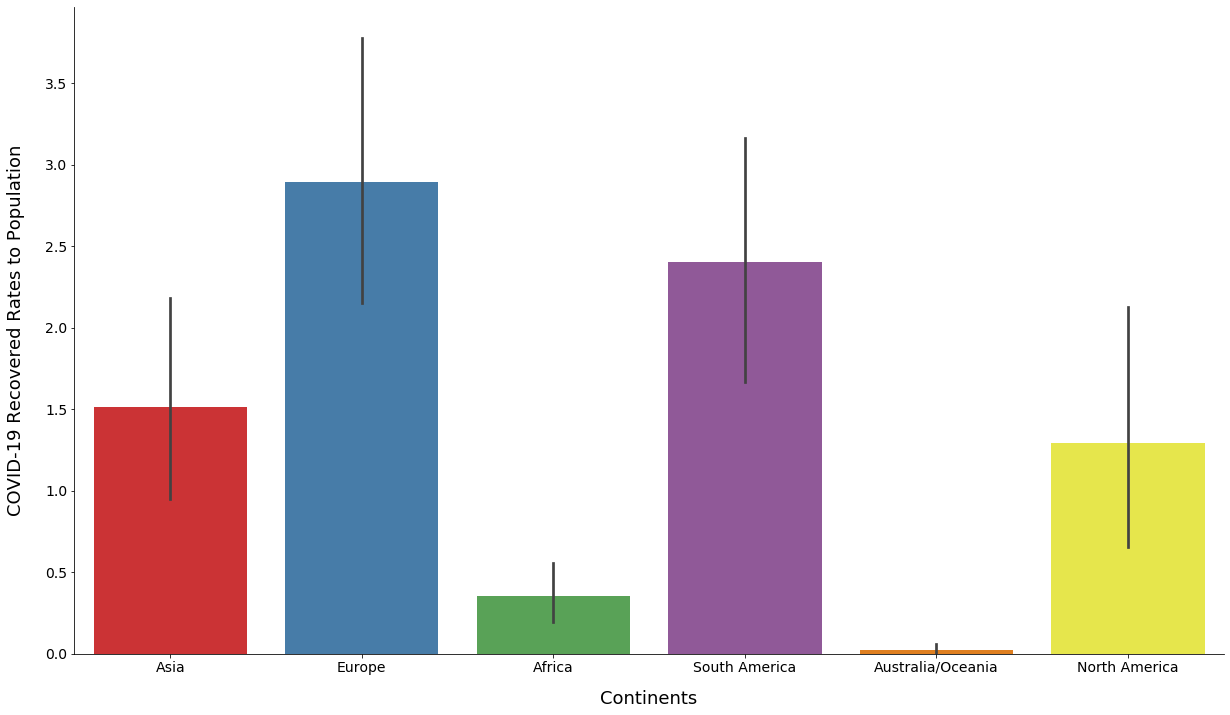

In [94]:

sns.catplot(x = "Continent", y = "Recovered", data = country_food_supply, height=10,kind = "bar",palette="Set1");
plt.xlabel("Continents",labelpad = 15)
plt.ylabel("COVID-19 Recovered Rates to Population",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(18,10)

plt.rc("font", size = 14)
plt.rc("axes", labelsize = 18)


###      

## --------------------------- Animal Products ---------------------------

###       

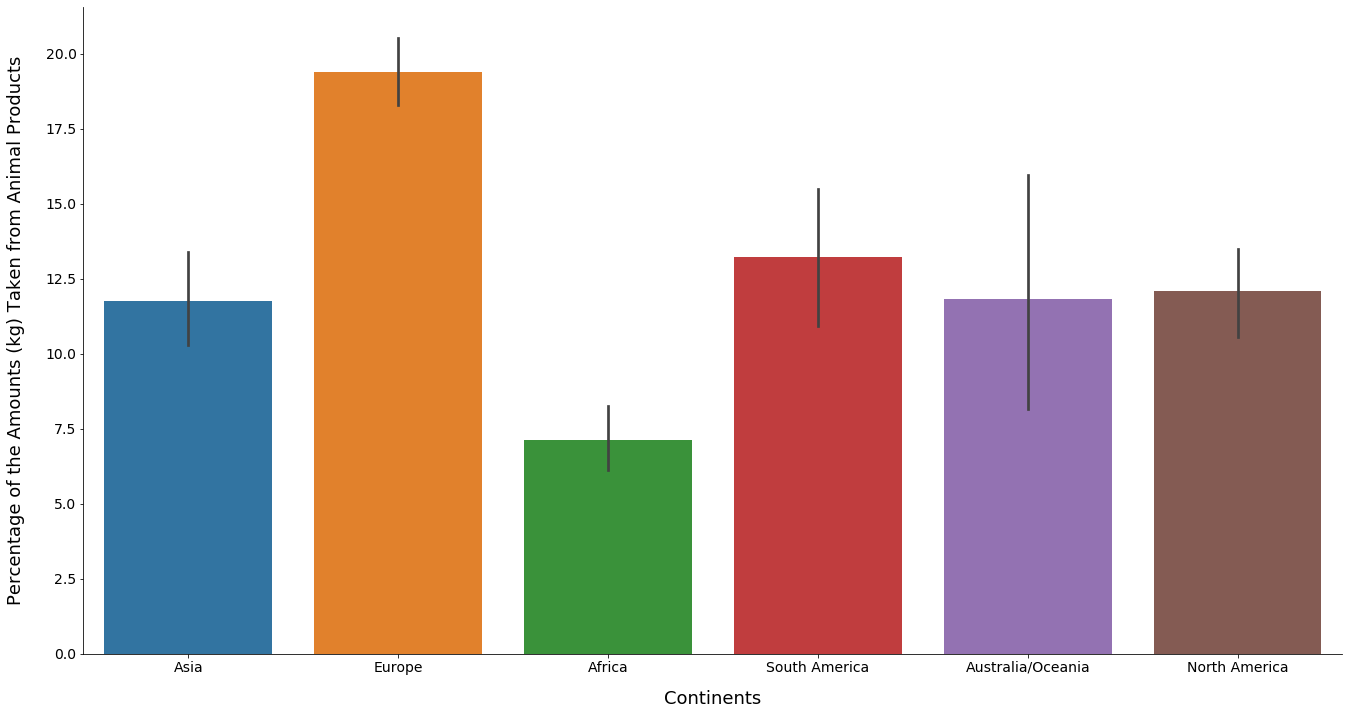

In [201]:

sns.catplot(x = "Continent", y = "Animal Products", data = country_food_supply, height=10,kind = "bar");
plt.xlabel("Continents",labelpad = 15)
plt.ylabel("Percentage of the Amounts (kg) Taken from Animal Products",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(20,10)

plt.rc("font", size = 14)
plt.rc("axes", labelsize = 18)

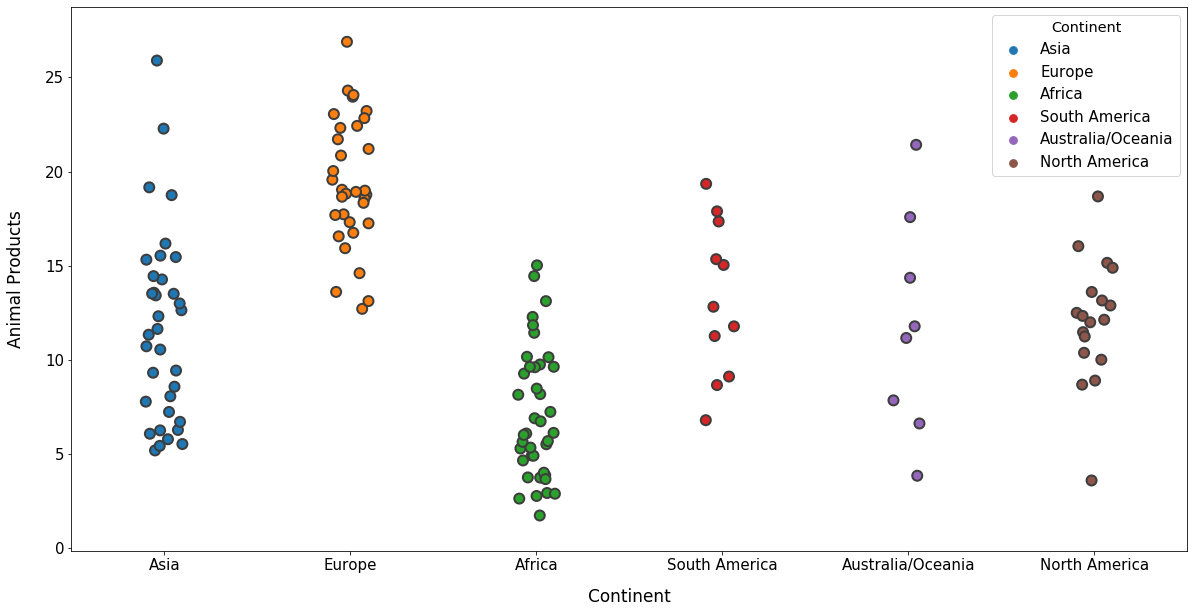

In [8]:
sns.stripplot(x = "Continent", y = "Animal Products", data = country_food_supply,hue = "Continent",s = 10,linewidth=2);
plt.xlabel("Continent",labelpad = 15)
plt.ylabel("Animal Products",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(20,10)

plt.rc("font", size = 15)
plt.rc("axes", labelsize = 18)


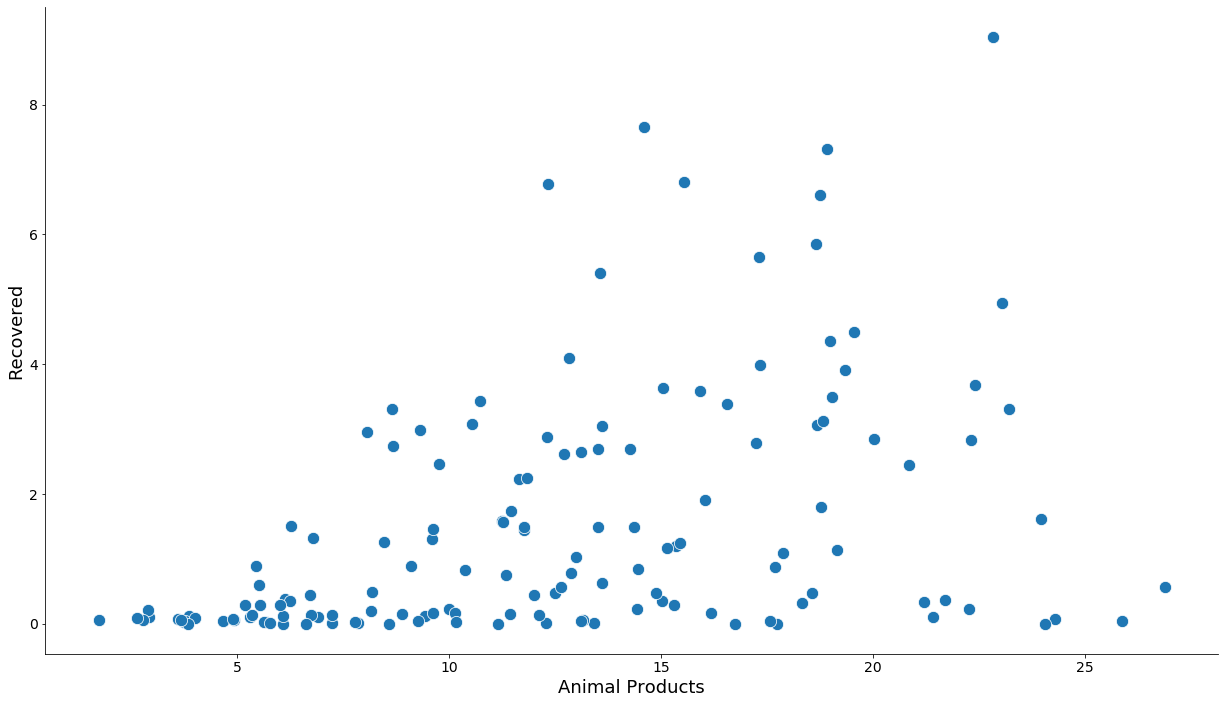

In [73]:
sns.relplot(x = "Animal Products", y = "Recovered", data = country_food_supply, height=10,kind = "scatter",s = 150);

figure = plt.gcf()
figure.set_size_inches(18,10)

plt.rc("font", size = 14)
plt.rc("axes", labelsize = 18)

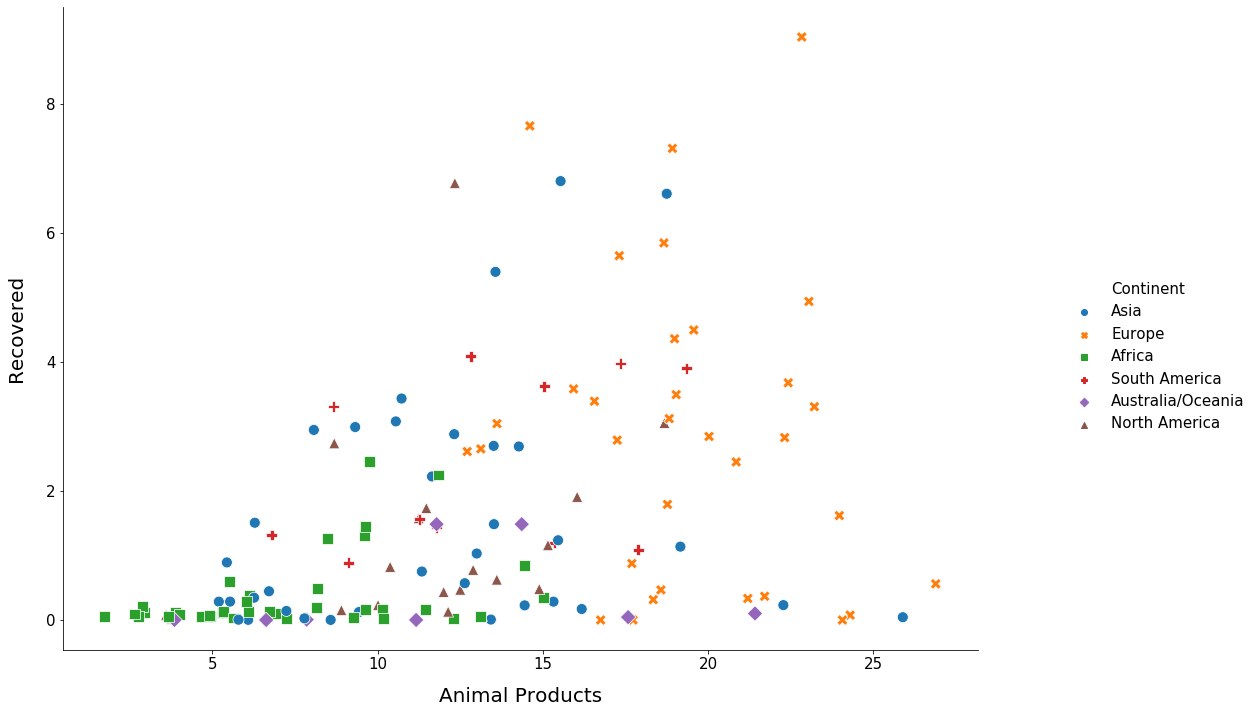

In [93]:
sns.relplot(x = "Animal Products", y = "Recovered", data = country_food_supply, height=10,kind = "scatter",hue="Continent", s = 120,style="Continent");
plt.xlabel("Animal Products",labelpad = 15)
plt.ylabel("Recovered",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(18,10)

plt.rc("font", size = 14)
plt.rc("axes", labelsize = 18)

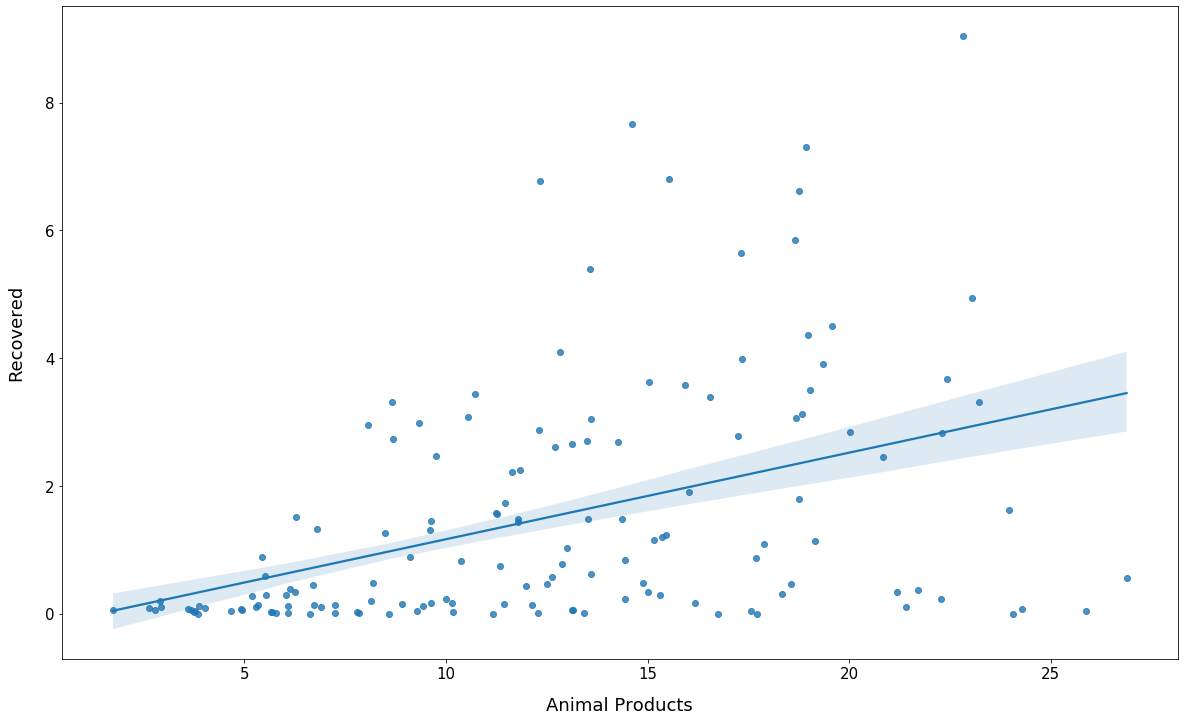

In [179]:
sns.regplot(x = "Animal Products", y = "Recovered", data = country_food_supply,truncate=True,ci=80);
plt.xlabel("Animal Products",labelpad = 15)
plt.ylabel("Recovered",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(20,12)

plt.rc("font", size = 14)
plt.rc("axes", labelsize = 18)

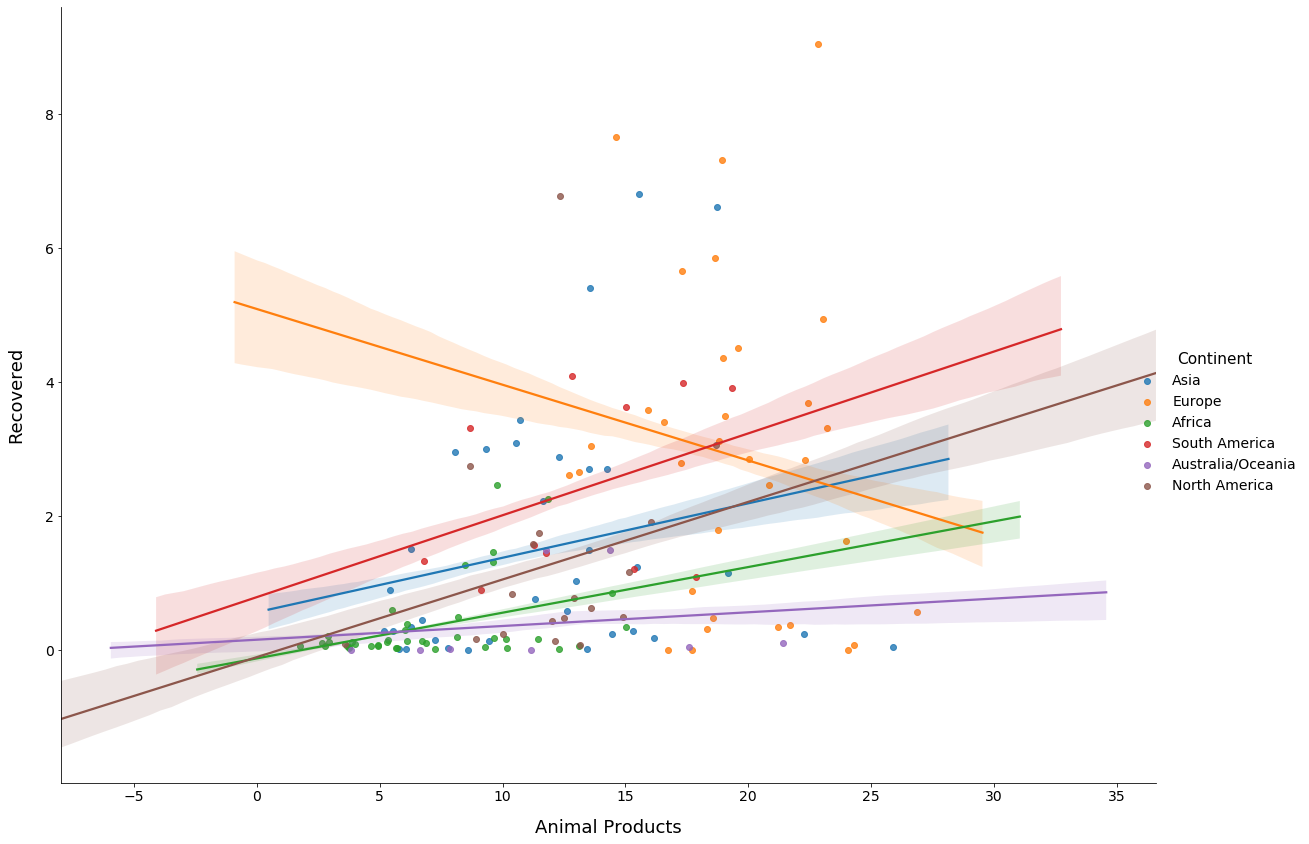

In [90]:
sns.lmplot(x = "Animal Products", y = "Recovered", data = country_food_supply,hue = "Continent",aspect=2,height=10,ci = 30,fit_reg=True);
plt.xlabel("Animal Products",labelpad = 15)
plt.ylabel("Recovered",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(18,12)

plt.rc("font", size = 14)
plt.rc("axes", labelsize = 18)


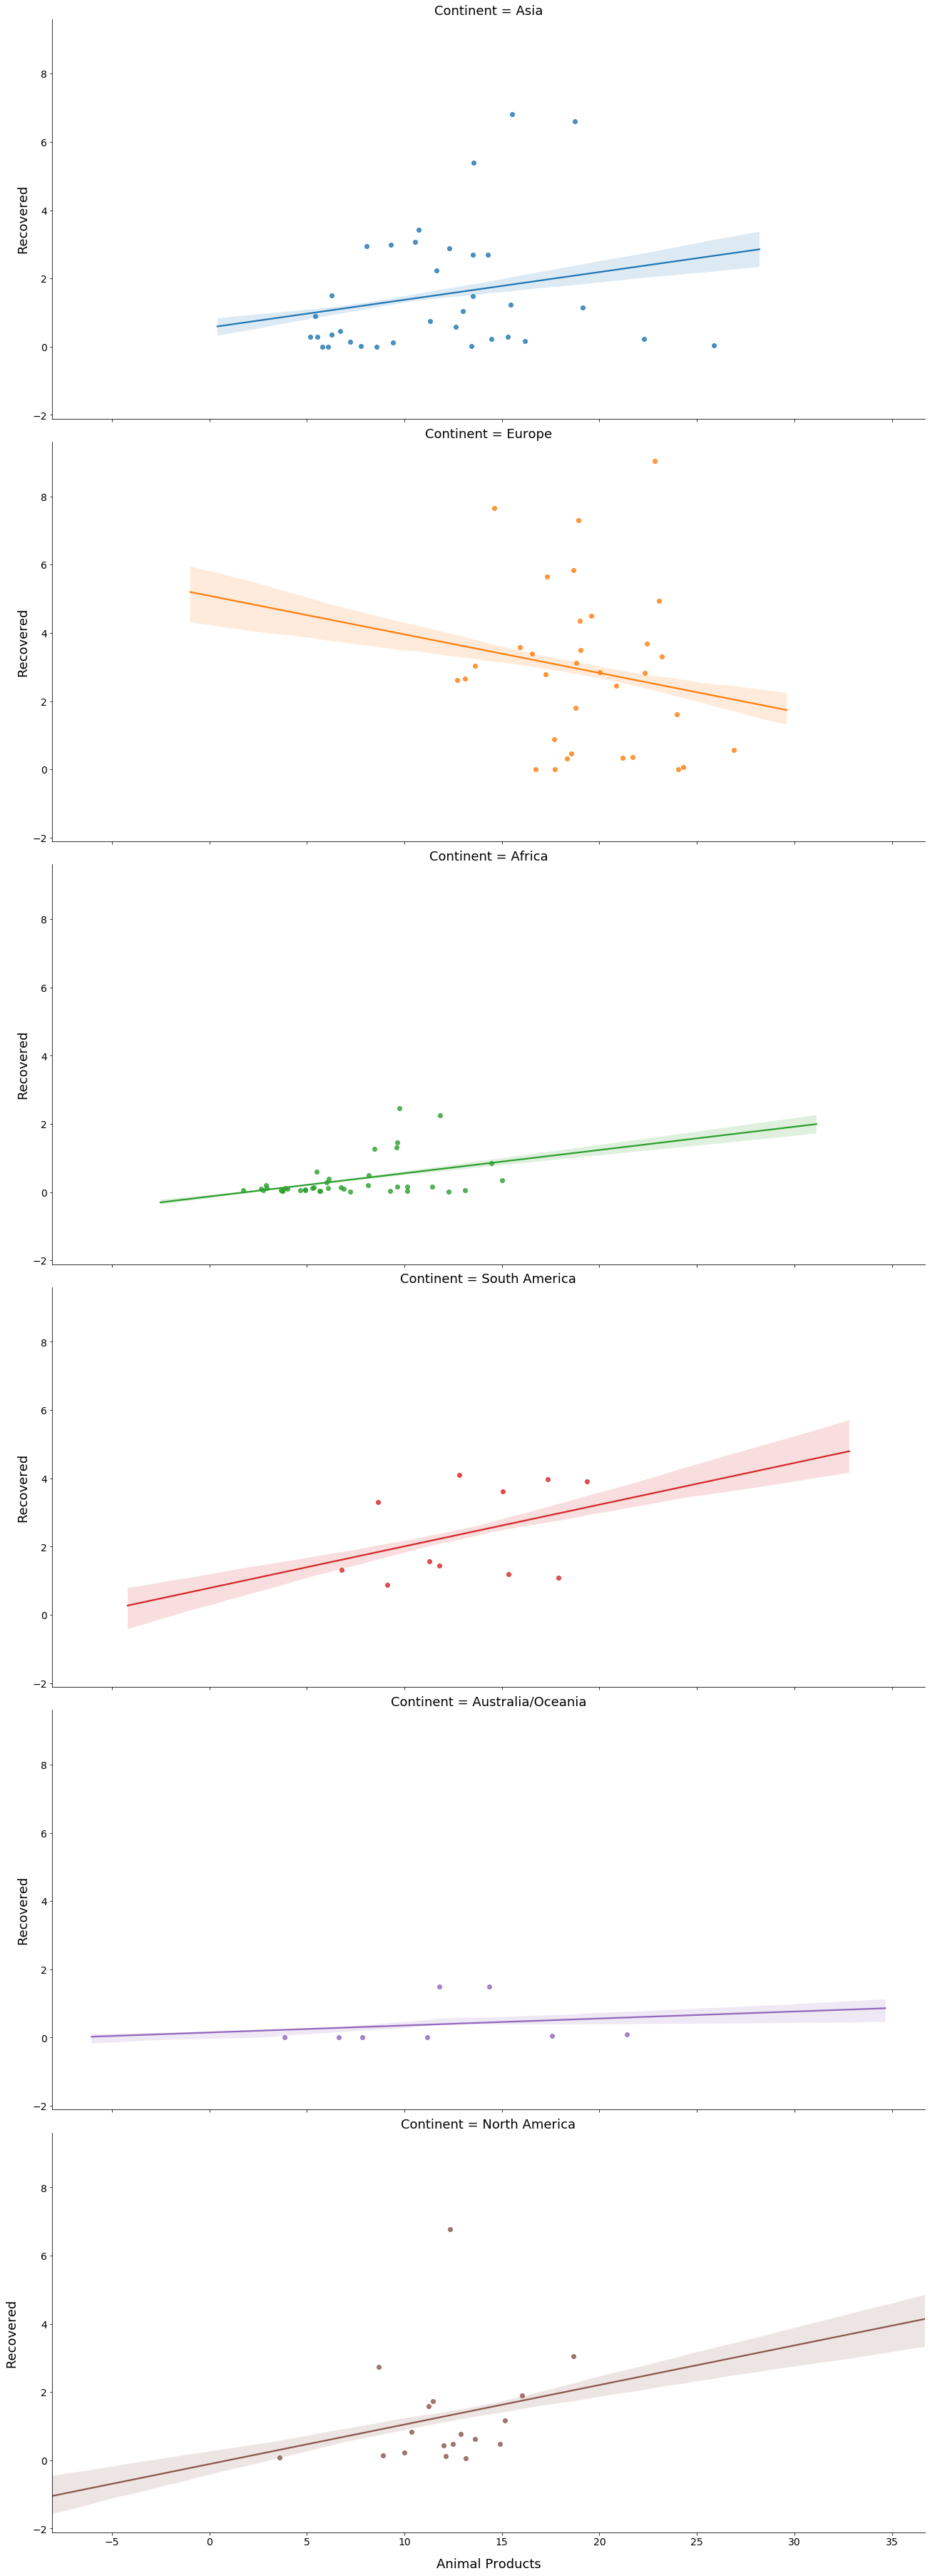

In [94]:
sns.lmplot(x = "Animal Products", y = "Recovered", data = country_food_supply,hue = "Continent",aspect=2,height=10,ci = 30,fit_reg=True,row="Continent");
plt.xlabel("Animal Products",labelpad = 15)
plt.ylabel("Recovered",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(18,50)

plt.rc("font", size = 14)
plt.rc("axes", labelsize = 18)

##    
## Percentage of Protein Supply from Animal Products
##      

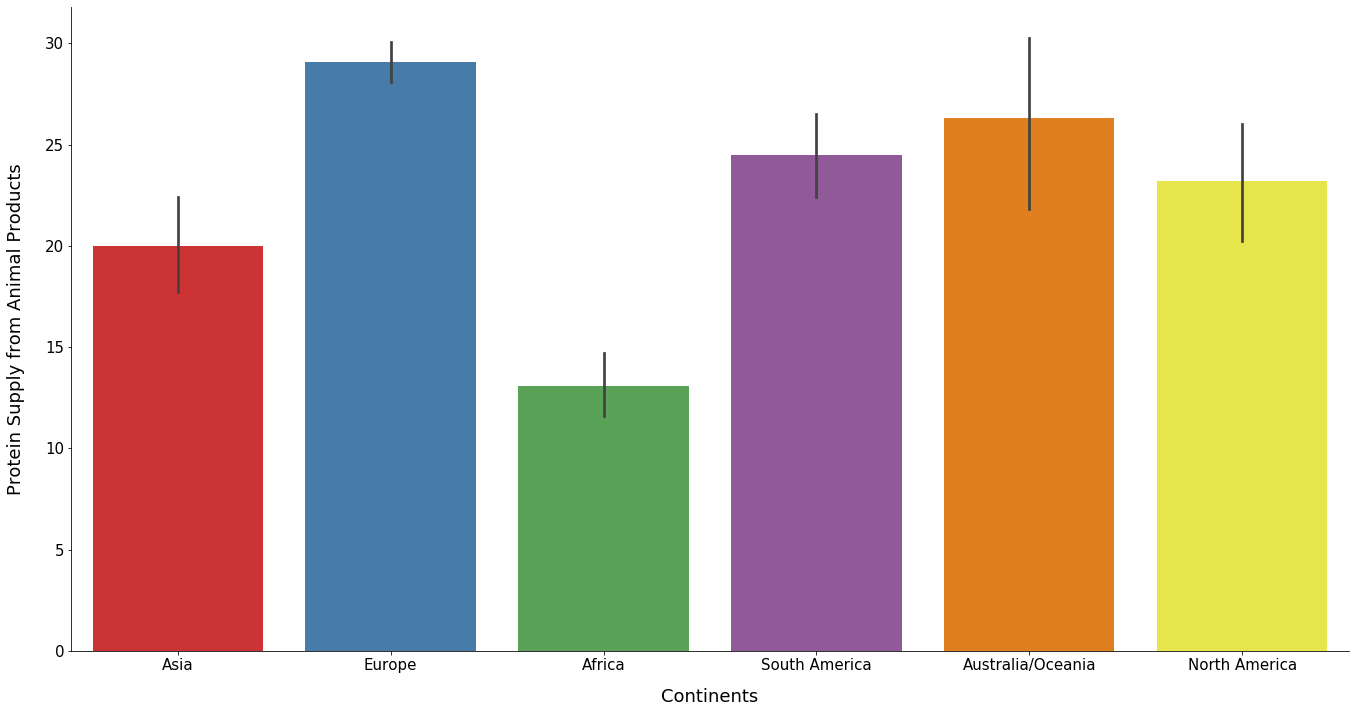

In [13]:
# Protein Supply Dataset

sns.catplot(x = "Continent", y = "Animal Products", data = country_protein_supply, height=10,kind = "bar",palette="Set1");
plt.xlabel("Continents",labelpad = 15)
plt.ylabel("Protein Supply from Animal Products",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(20,10)

plt.rc("font", size = 15)
plt.rc("axes", labelsize = 18)


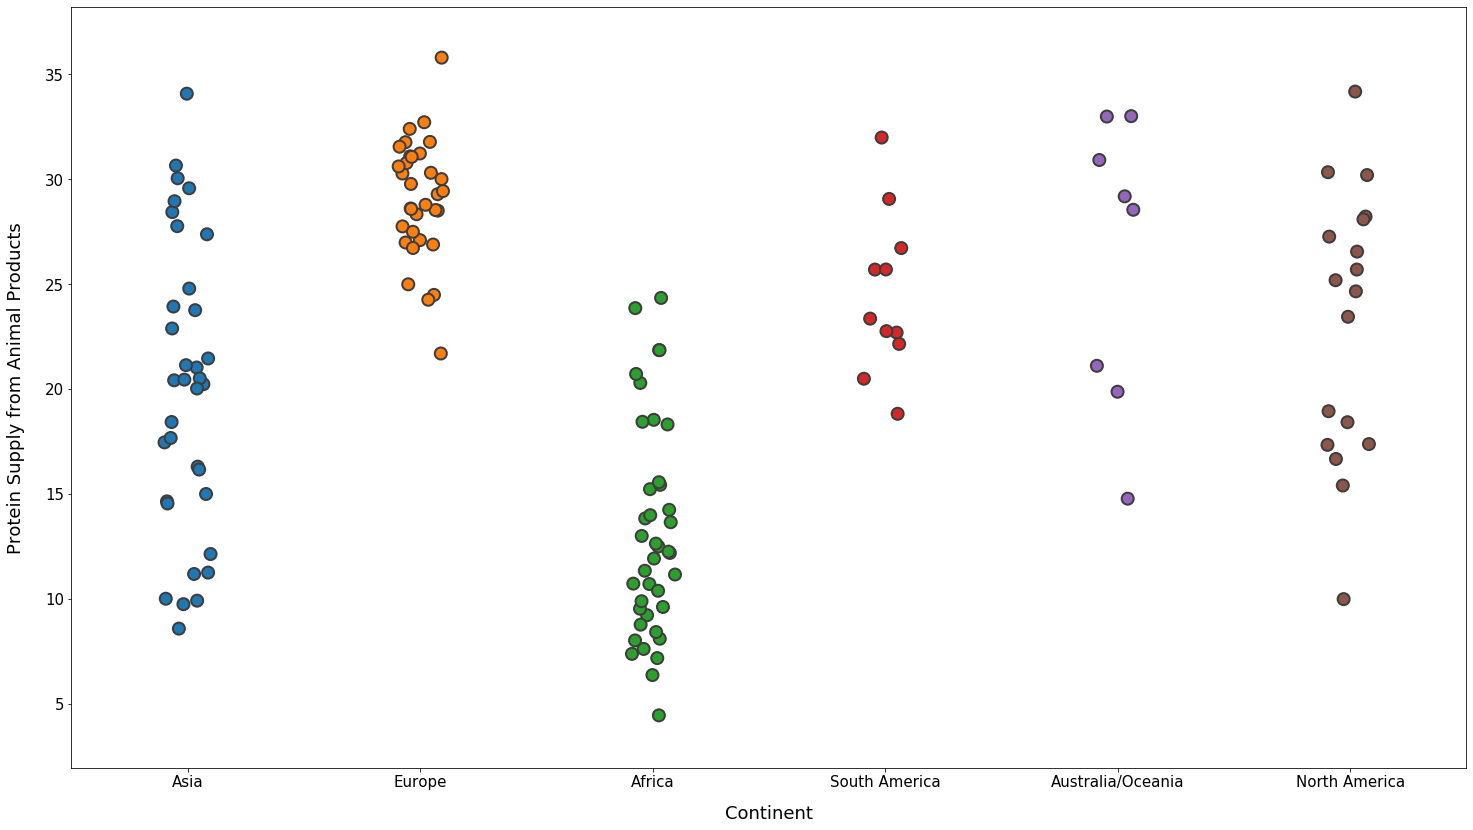

In [15]:
# Protein Supply Dataset

sns.stripplot(x = "Continent", y = "Animal Products", data = country_protein_supply,s = 12,linewidth=2);
plt.xlabel("Continent",labelpad = 15)
plt.ylabel("Protein Supply from Animal Products",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(25,14)

plt.rc("font", size = 15)
plt.rc("axes", labelsize = 20)



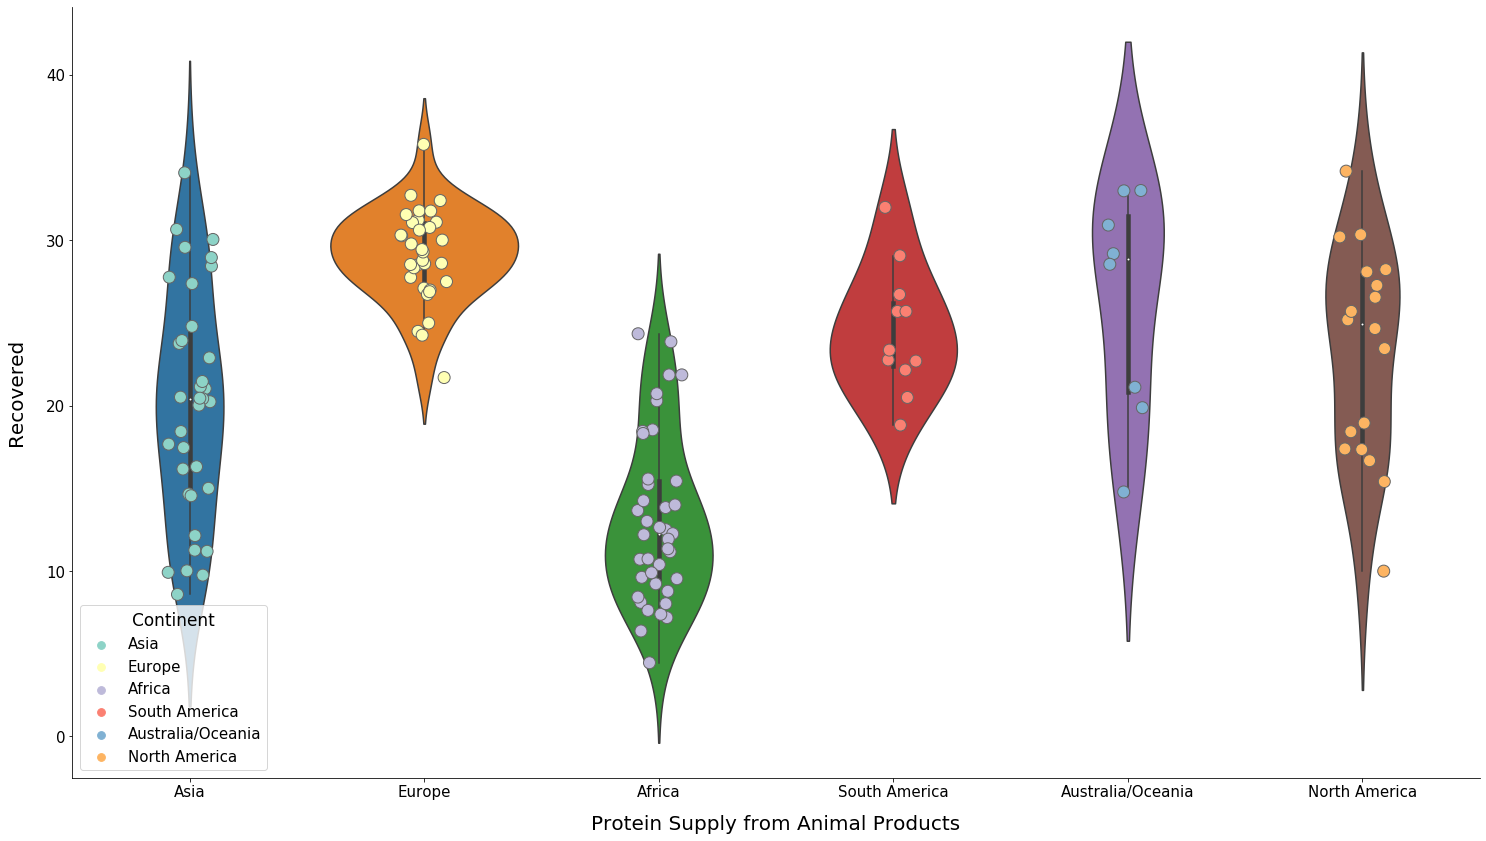

In [16]:
# Protein Supply Dataset

sns.catplot(x = "Continent", y = "Animal Products", data = country_protein_supply,aspect=5,height=10,kind="violin");
sns.stripplot(x = "Continent", y = "Animal Products", data = country_protein_supply,hue = "Continent",s = 12,linewidth=1,palette="Set3");
plt.xlabel("Protein Supply from Animal Products",labelpad = 15)
plt.ylabel("Recovered",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(20,12)
;
plt.rc("font", size = 15)
plt.rc("axes", labelsize = 20)


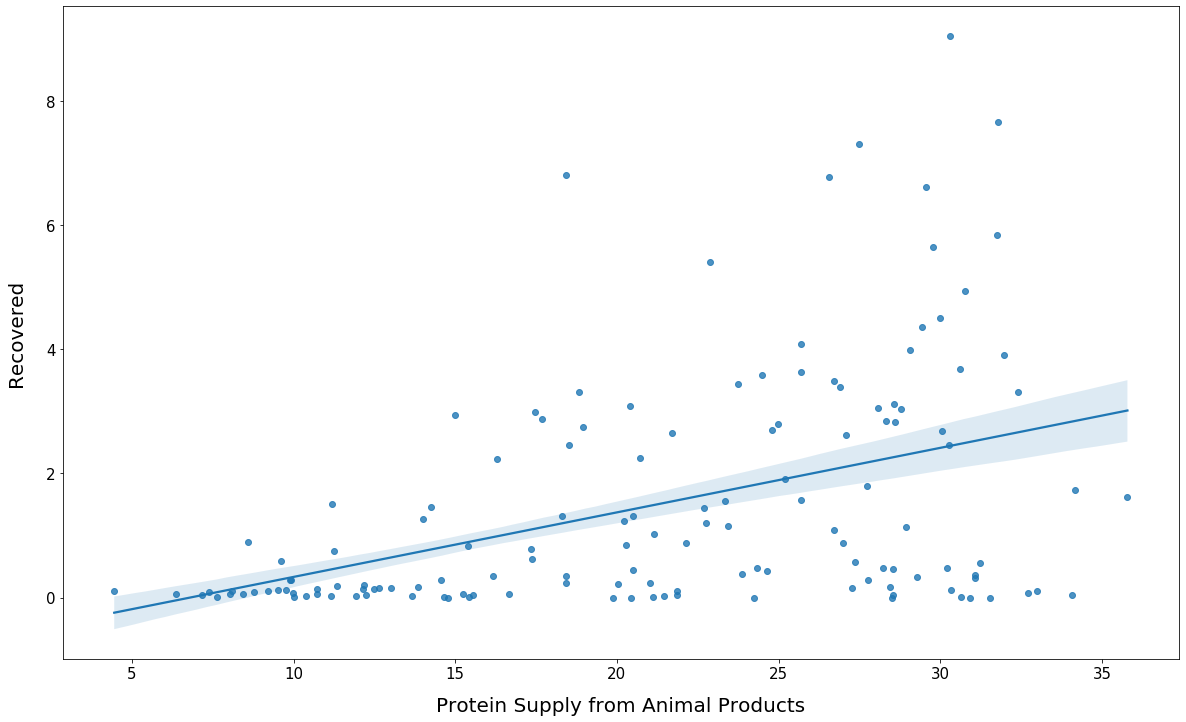

In [23]:
# Protein Supply Dataset

sns.regplot(x = "Animal Products", y = "Recovered", data = country_protein_supply,truncate=True,ci=80);
plt.xlabel("Protein Supply from Animal Products",labelpad = 15)
plt.ylabel("Recovered",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(20,12)

plt.rc("font", size = 14)
plt.rc("axes", labelsize = 18)

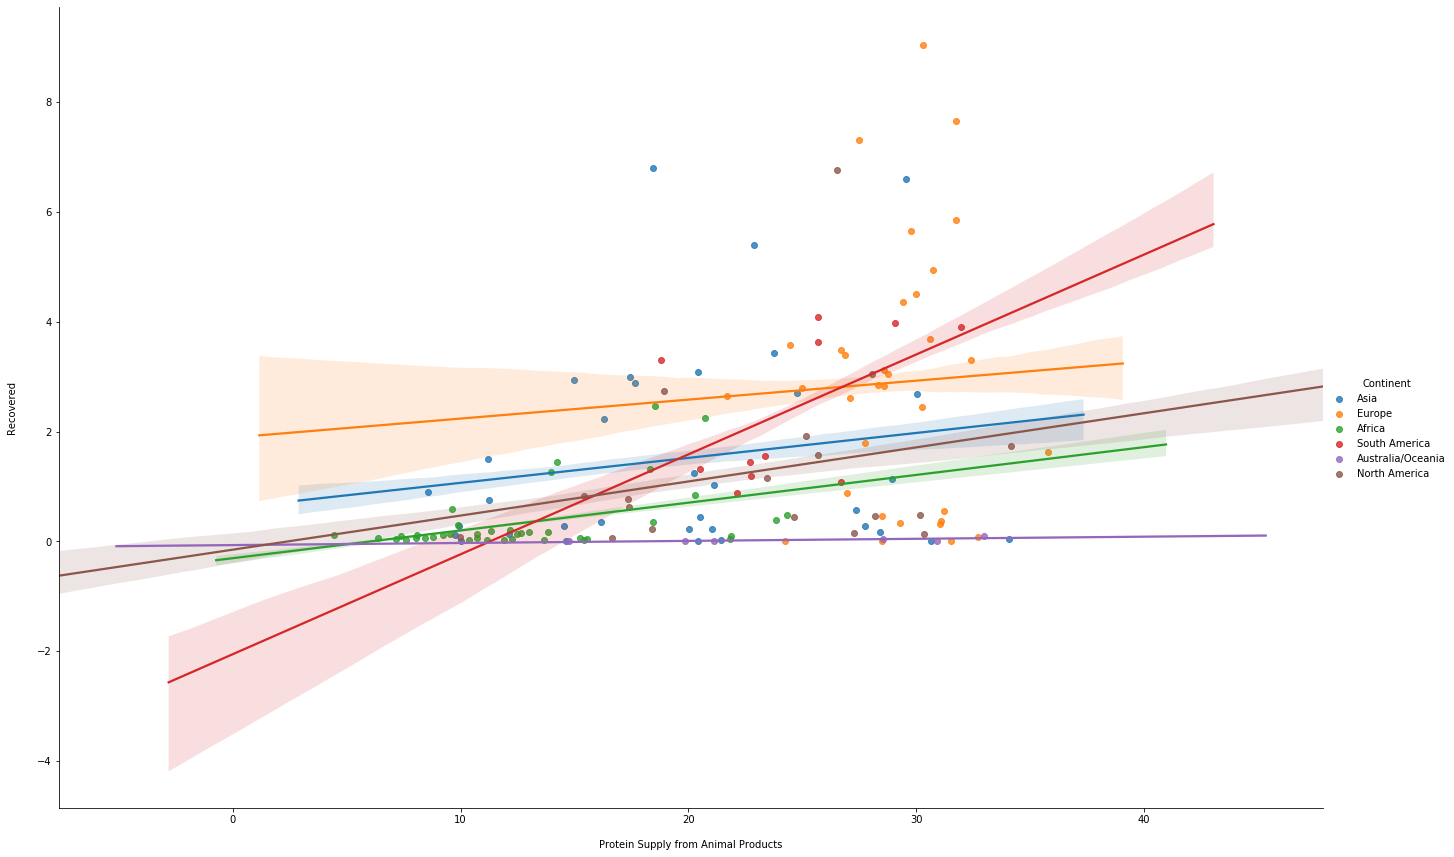

In [18]:
# Protein Supply Dataset

sns.lmplot(x = "Animal Products", y = "Recovered", data = country_protein_supply,hue = "Continent",aspect=2,height=10,ci = 30,fit_reg=True);
plt.xlabel("Protein Supply from Animal Products",labelpad = 15)
plt.ylabel("Recovered",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(20,12)

plt.rc("font", size = 14)
plt.rc("axes", labelsize = 18)


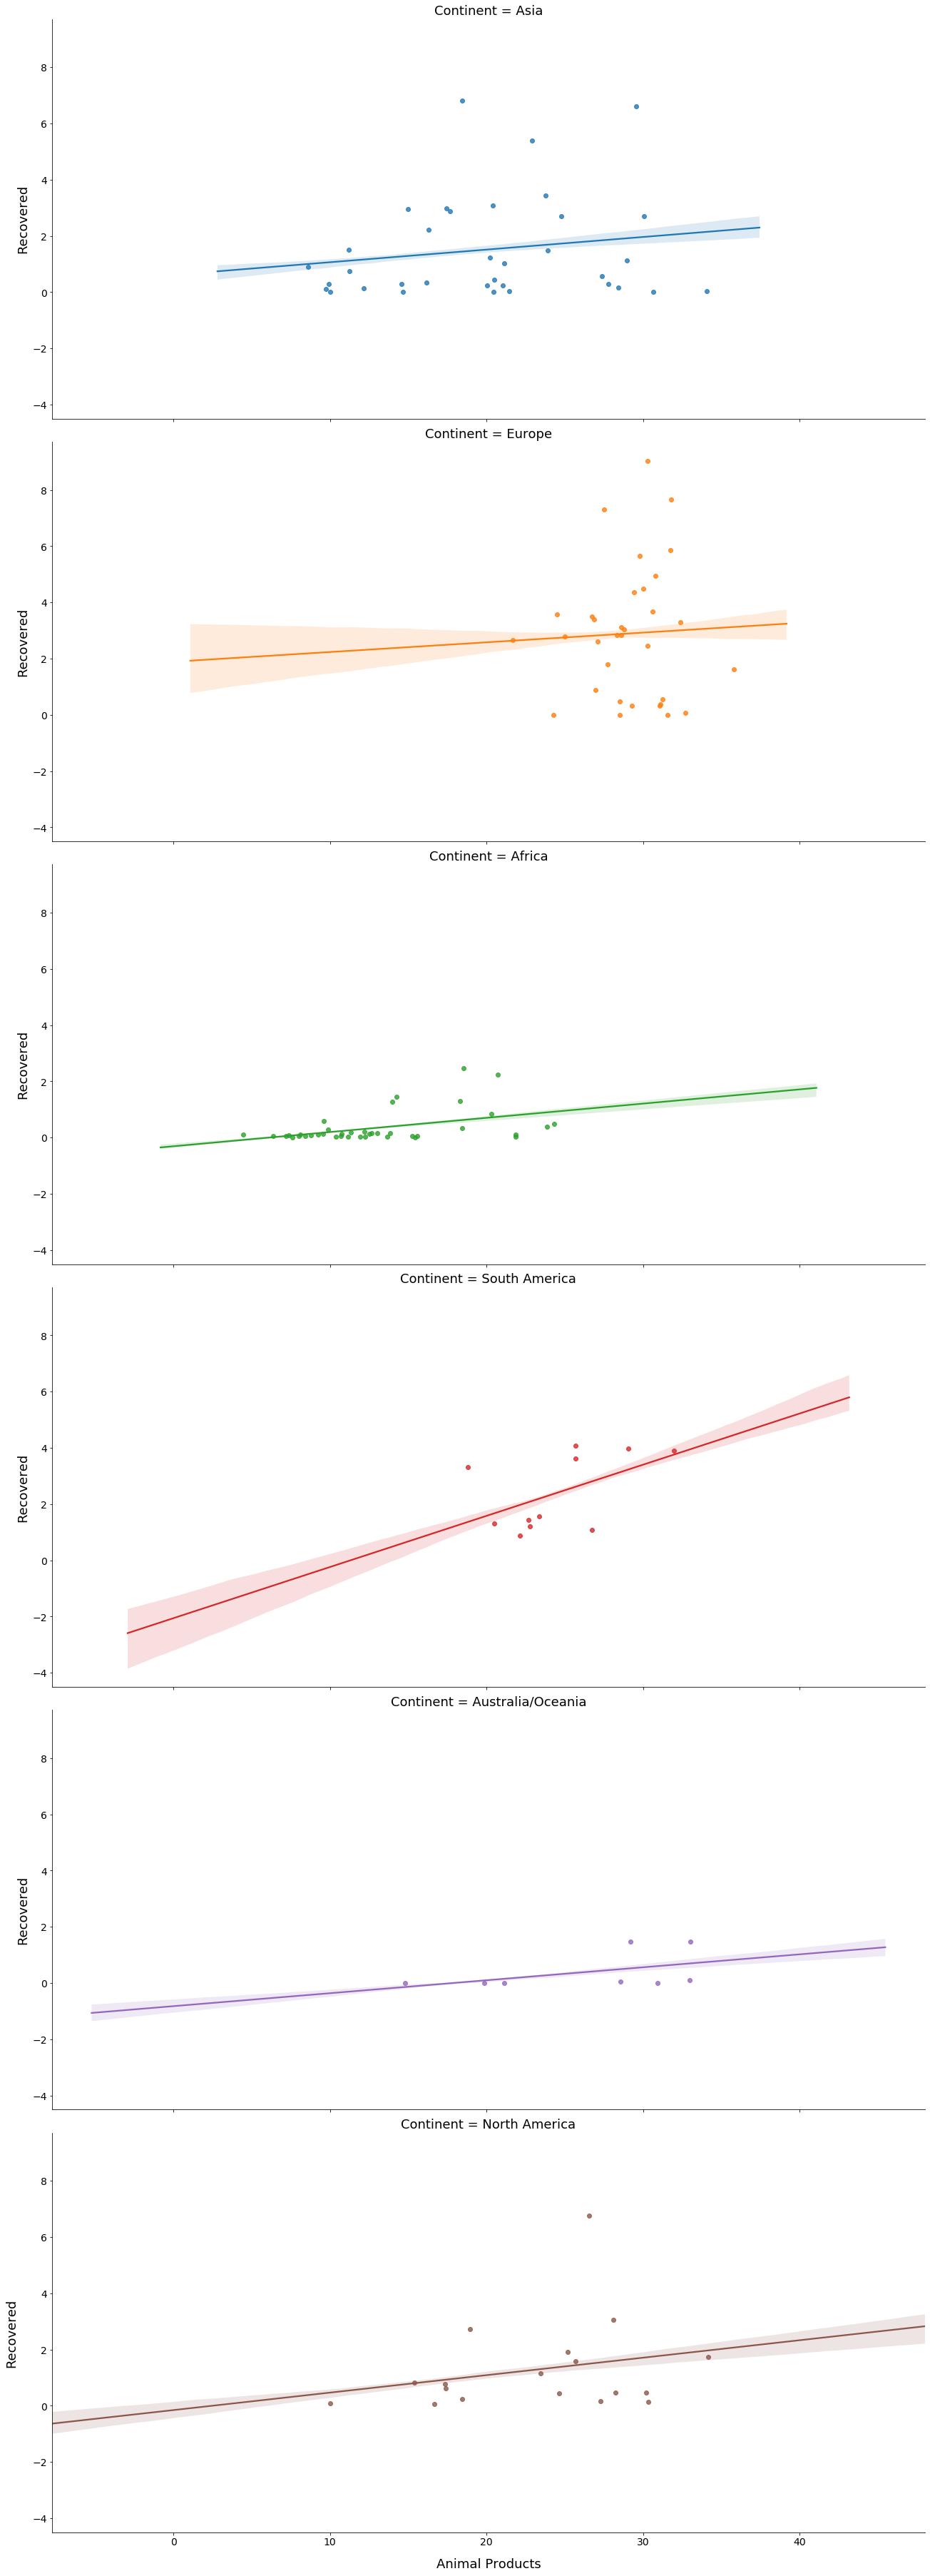

In [125]:
# Protein Supply Dataset

sns.lmplot(x = "Animal Products", y = "Recovered", data = country_protein_supply,hue = "Continent",aspect=2,height=10,ci = 30,fit_reg=True,row="Continent");
plt.xlabel("Animal Products",labelpad = 15)
plt.ylabel("Recovered",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(18,50)

plt.rc("font", size = 14)
plt.rc("axes", labelsize = 18)

##    

## ------------------------------------   Vegetables   ------------------------------------

##   

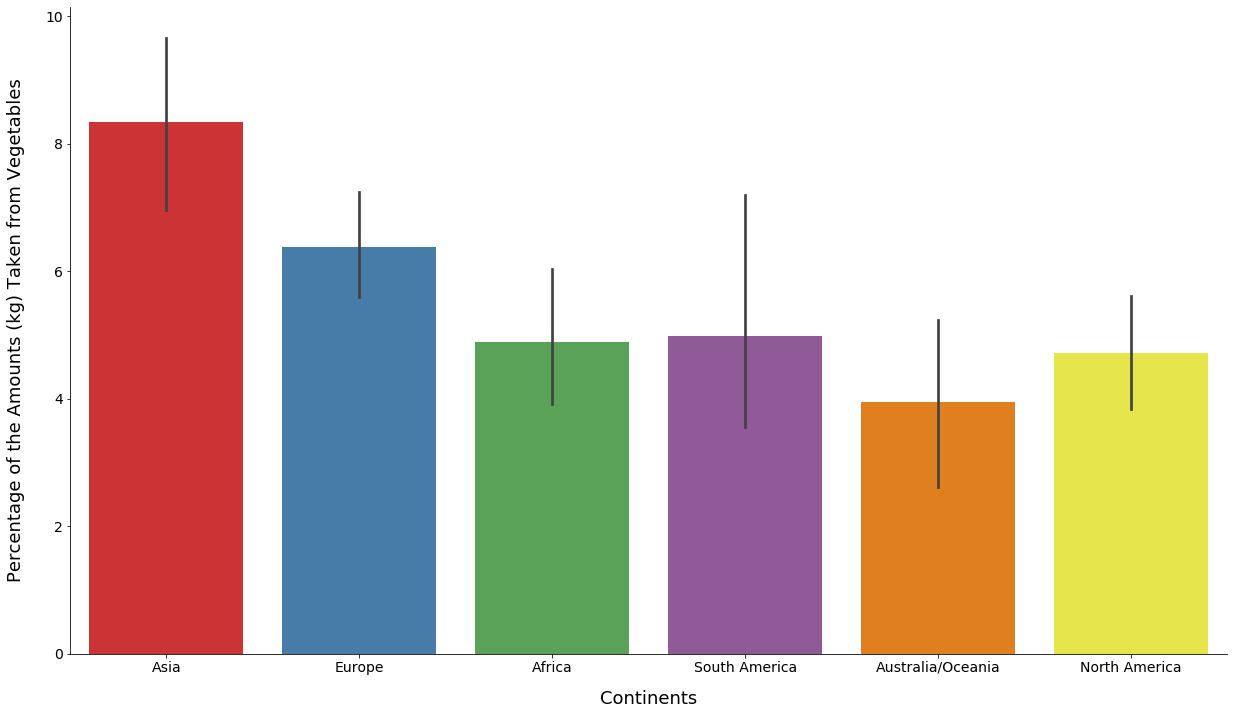

In [85]:

sns.catplot(x = "Continent", y = "Vegetables", data = country_food_supply, height=10,kind = "bar",palette="Set1");
plt.xlabel("Continents",labelpad = 15)
plt.ylabel("Percentage of the Amounts (kg) Taken from Vegetables",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(18,10)

plt.rc("font", size = 14)
plt.rc("axes", labelsize = 18)


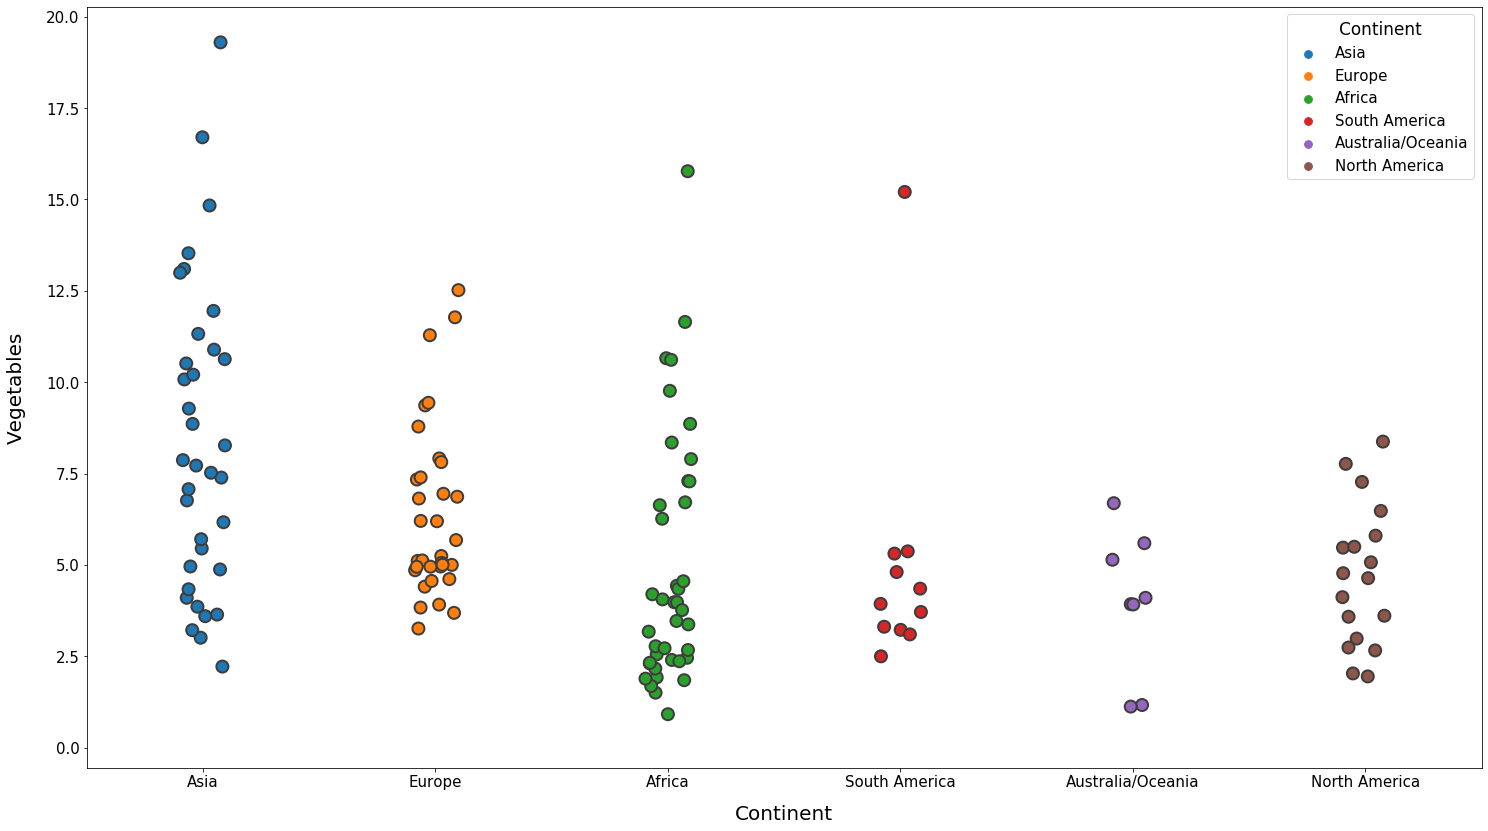

In [119]:
sns.stripplot(x = "Continent", y = "Vegetables", data = country_food_supply,hue = "Continent",s = 12,linewidth=2);
plt.xlabel("Continent",labelpad = 15)
plt.ylabel("Vegetables",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(25,14)

plt.rc("font", size = 15)
plt.rc("axes", labelsize = 20)


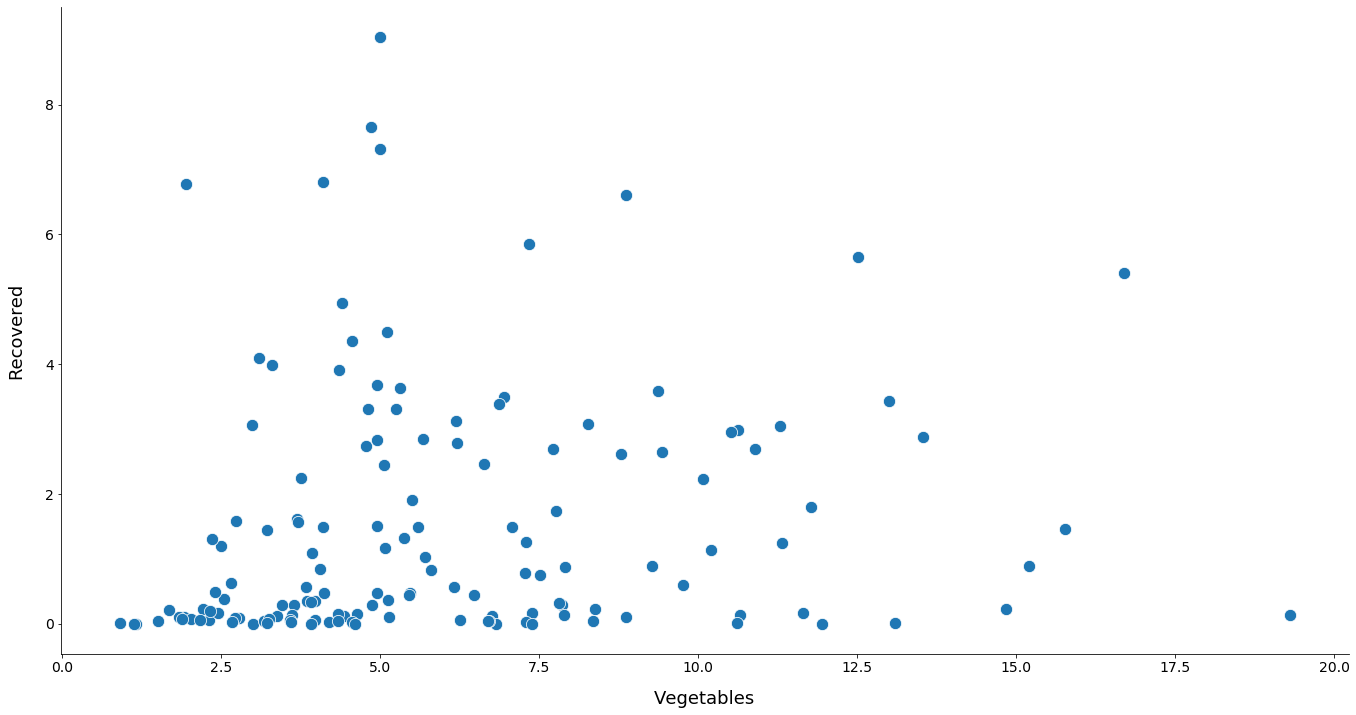

In [180]:
sns.relplot(x = "Vegetables", y = "Recovered", data = country_food_supply, height=10,kind = "scatter",s = 150);
plt.xlabel("Vegetables",labelpad = 15)
plt.ylabel("Recovered",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(20,10)

plt.rc("font", size = 14)
plt.rc("axes", labelsize = 18)

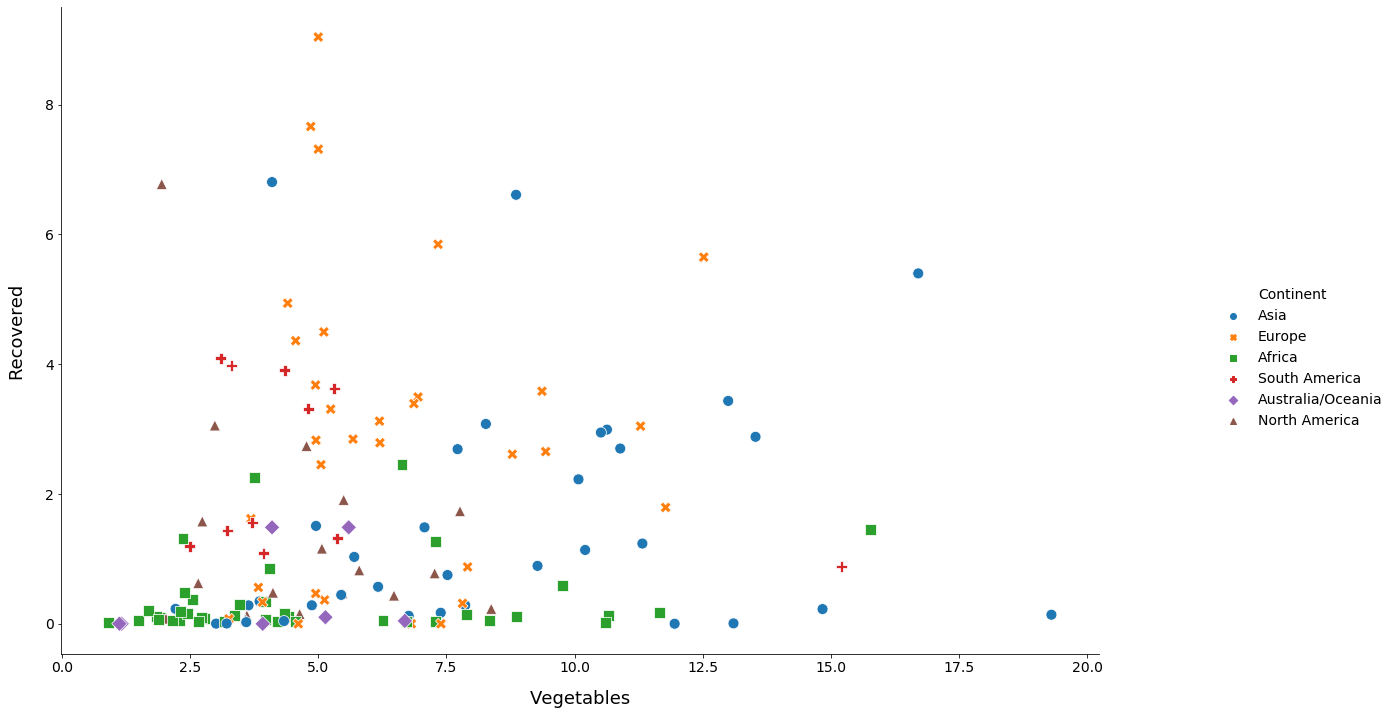

In [178]:
sns.relplot(x = "Vegetables", y = "Recovered", data = country_food_supply, height=10,kind = "scatter",hue="Continent", s = 120,style="Continent");
plt.xlabel("Vegetables",labelpad = 15)
plt.ylabel("Recovered",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(20,10)

plt.rc("font", size = 15)
plt.rc("axes", labelsize = 18)

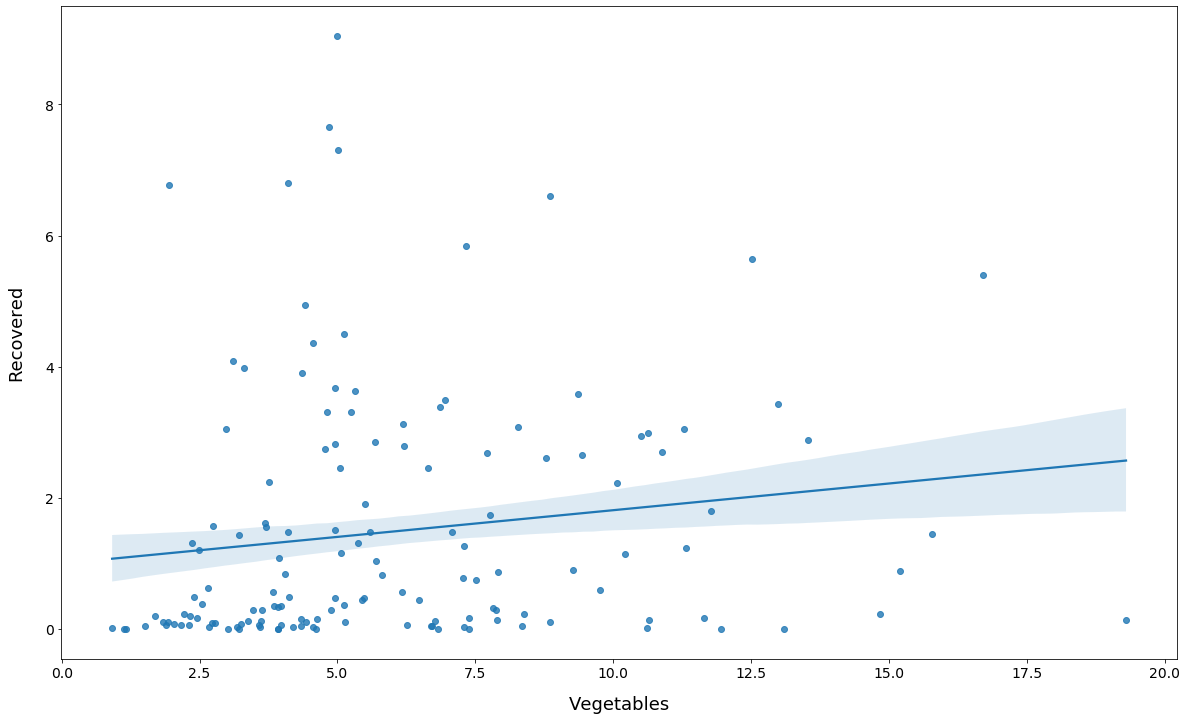

In [185]:
sns.regplot(x = "Vegetables", y = "Recovered", data = country_food_supply,truncate=True,ci=80);
plt.xlabel("Vegetables",labelpad = 15)
plt.ylabel("Recovered",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(20,12)

plt.rc("font", size = 14)
plt.rc("axes", labelsize = 18)

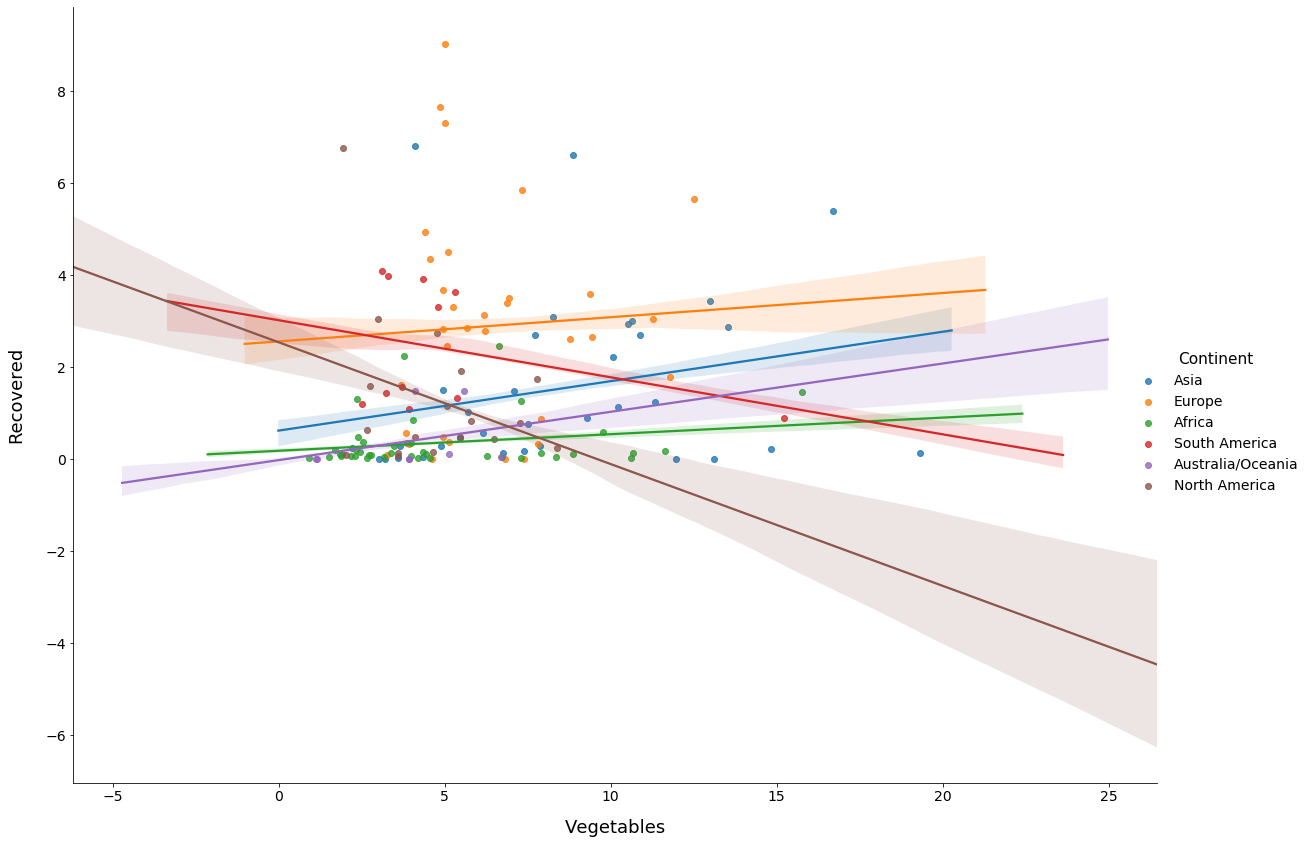

In [112]:
sns.lmplot(x = "Vegetables", y = "Recovered", data = country_food_supply,hue = "Continent",aspect=2,height=10,ci = 30,fit_reg=True);
plt.xlabel("Vegetables",labelpad = 15)
plt.ylabel("Recovered",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(18,12)

plt.rc("font", size = 14)
plt.rc("axes", labelsize = 18)


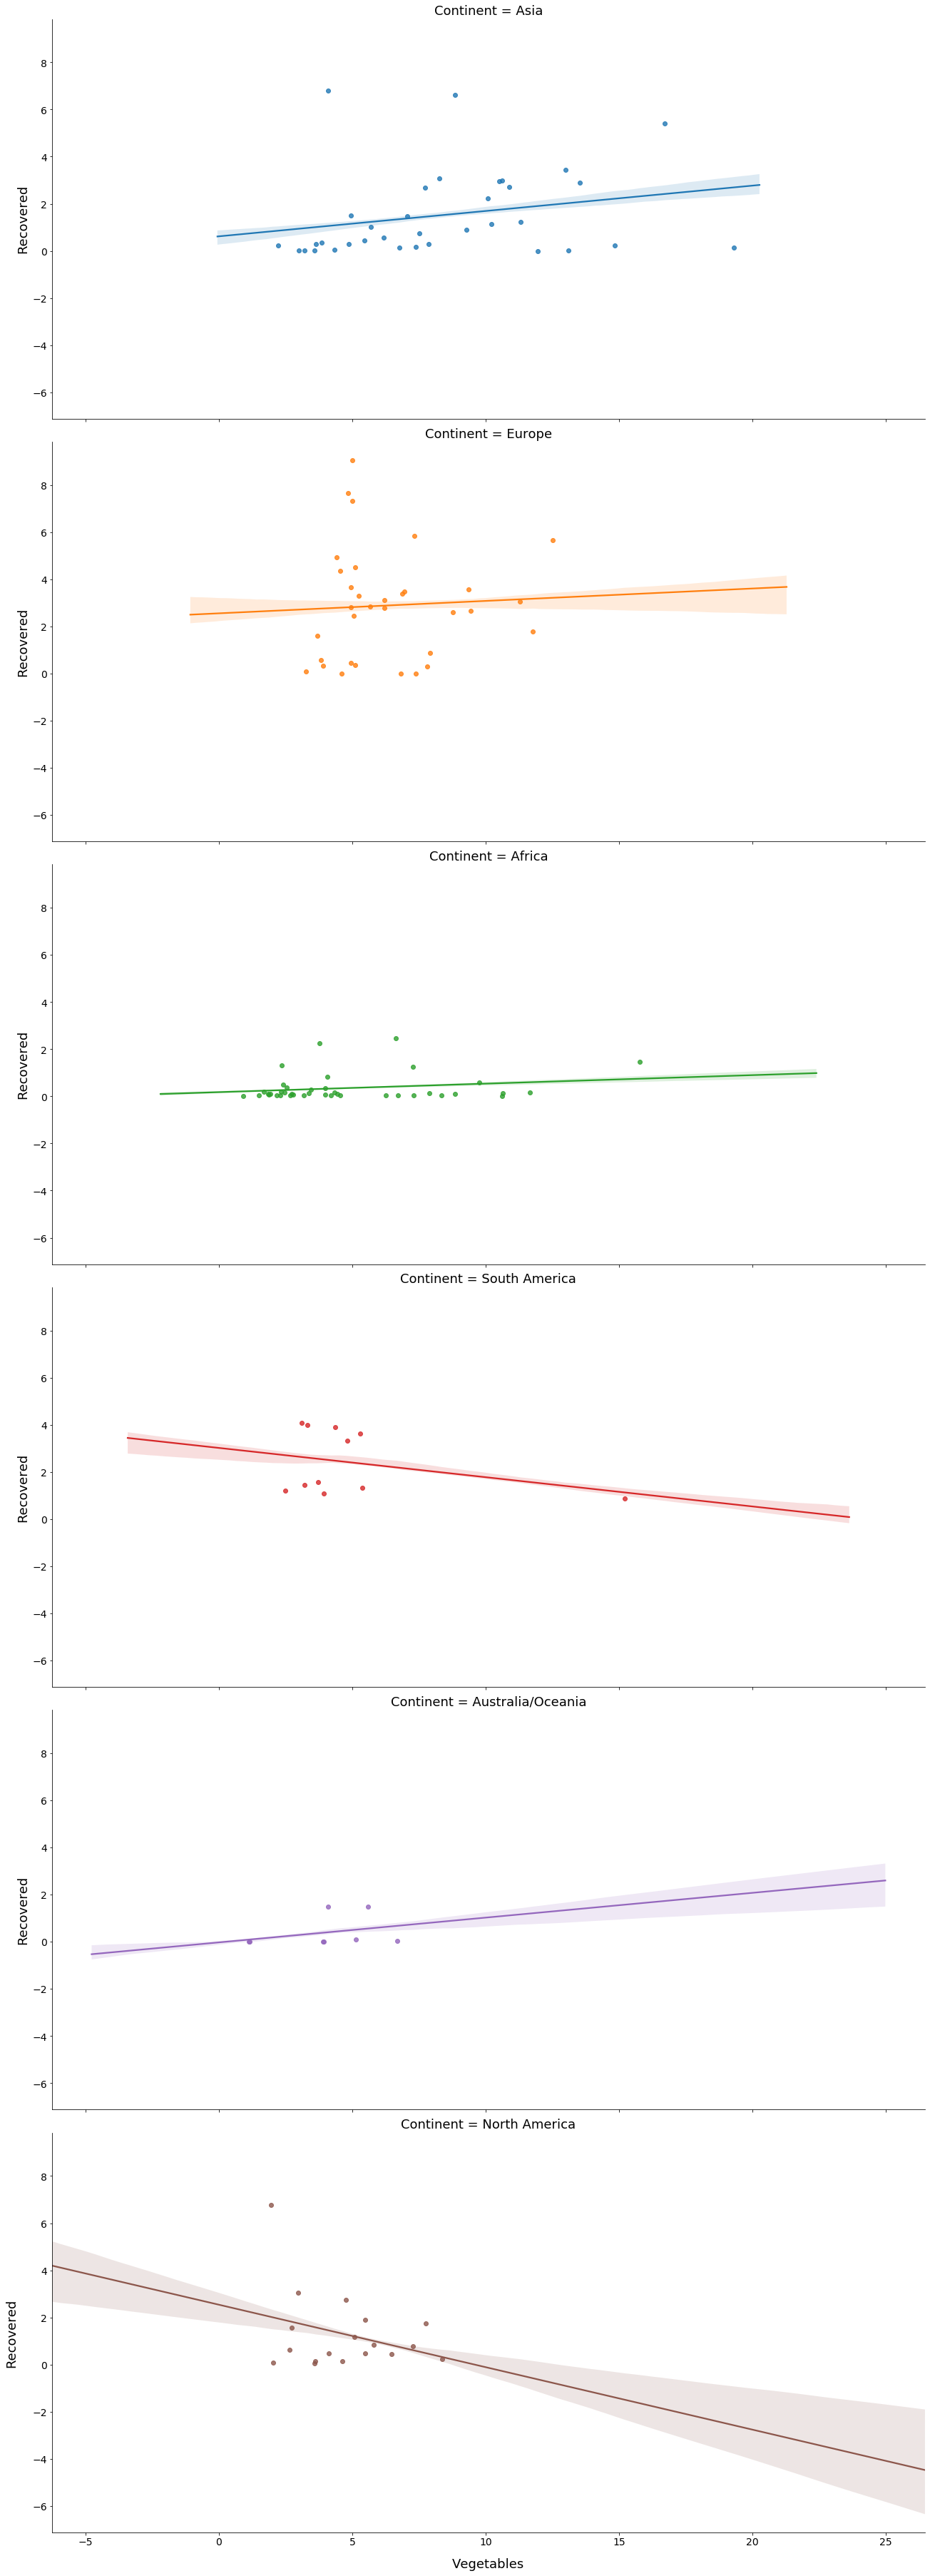

In [113]:
sns.lmplot(x = "Vegetables", y = "Recovered", data = country_food_supply,hue = "Continent",aspect=2,height=10,ci = 30,fit_reg=True,row="Continent");
plt.xlabel("Vegetables",labelpad = 15)
plt.ylabel("Recovered",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(18,50)

plt.rc("font", size = 14)
plt.rc("axes", labelsize = 18)

##         

## Percentage of Protein Supply from Vegetables

##                     

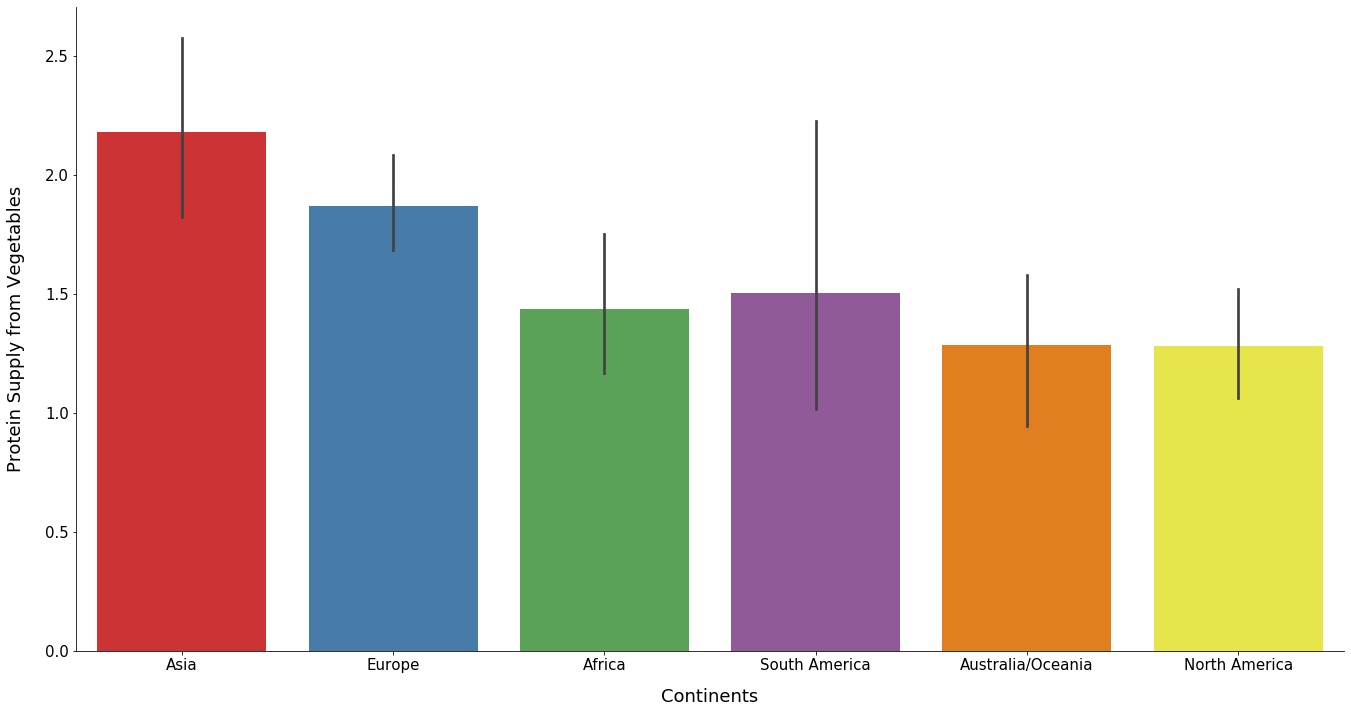

In [44]:
# Protein Supply Dataset

sns.catplot(x = "Continent", y = "Vegetables", data = country_protein_supply, height=10,kind = "bar",palette="Set1");
plt.xlabel("Continents",labelpad = 15)
plt.ylabel("Protein Supply from Vegetables",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(20,10)

plt.rc("font", size = 15)
plt.rc("axes", labelsize = 18)


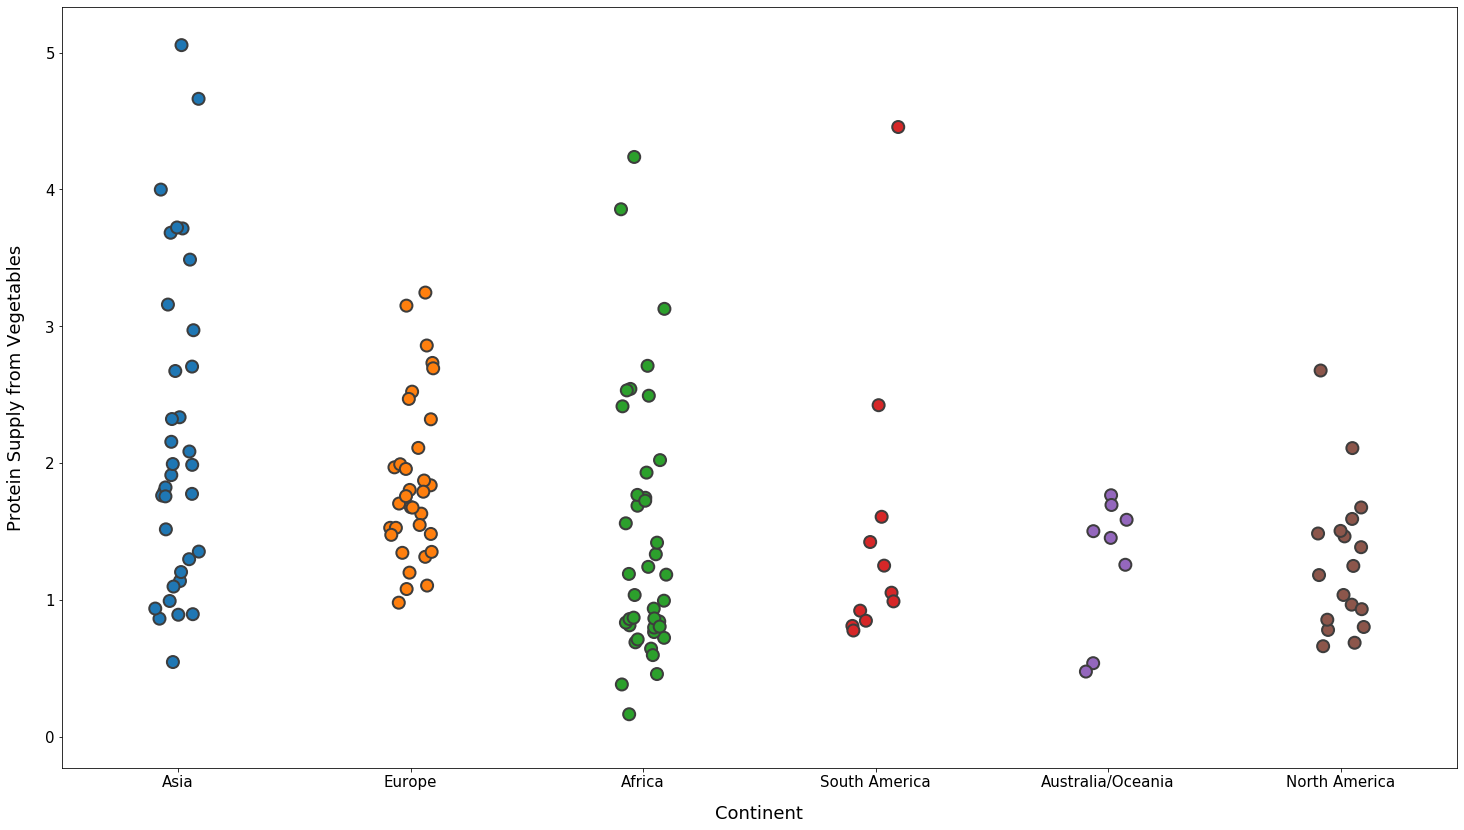

In [45]:
# Protein Supply Dataset

sns.stripplot(x = "Continent", y = "Vegetables", data = country_protein_supply,s = 12,linewidth=2);
plt.xlabel("Continent",labelpad = 15)
plt.ylabel("Protein Supply from Vegetables",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(25,14)

plt.rc("font", size = 15)
plt.rc("axes", labelsize = 20)



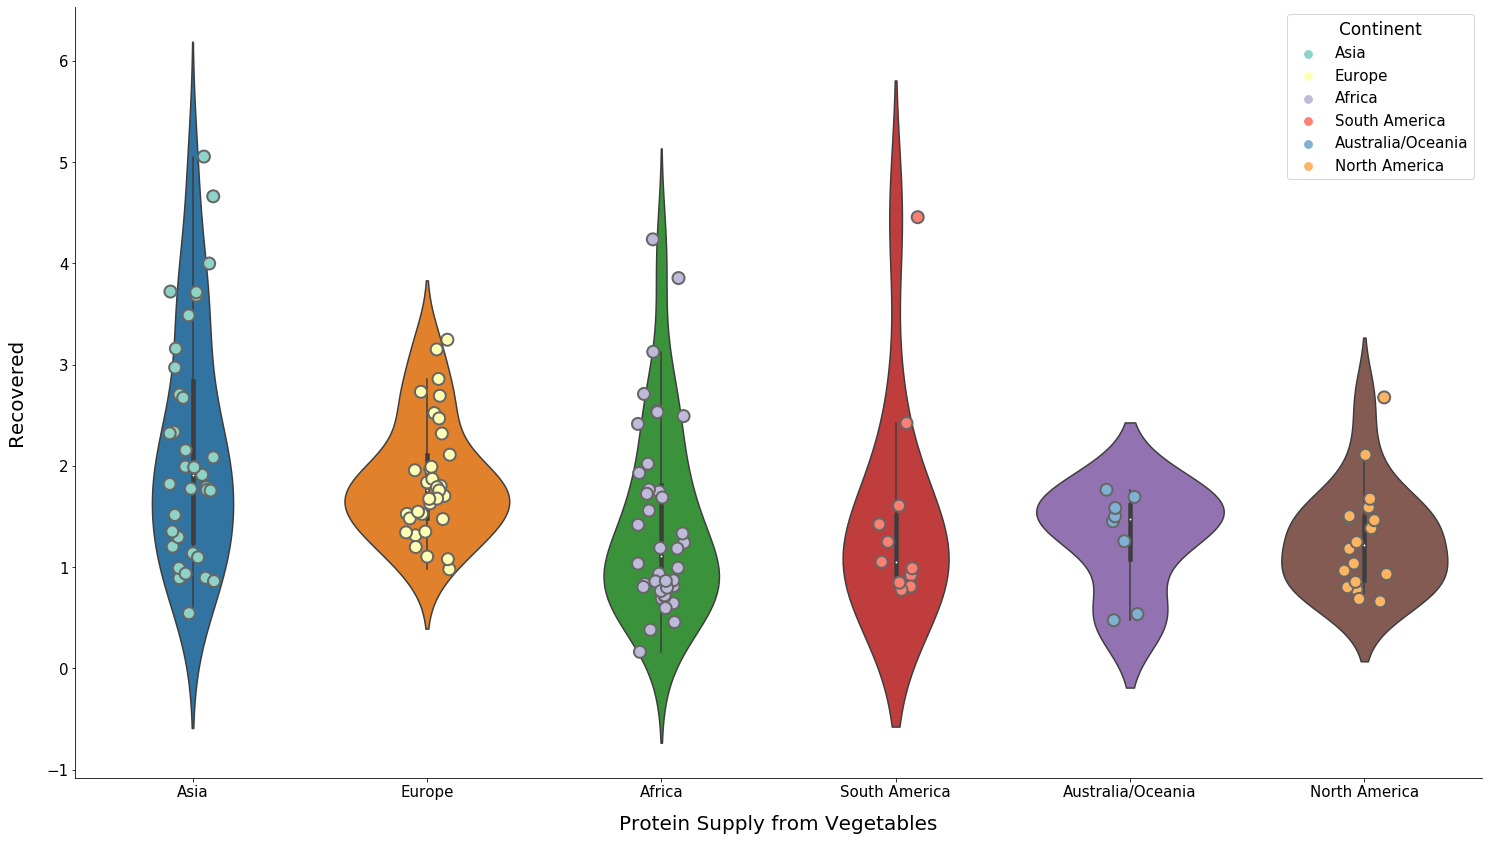

In [46]:
# Protein Supply Dataset

sns.catplot(x = "Continent", y = "Vegetables", data = country_protein_supply,aspect=5,height=10,kind="violin");
sns.stripplot(x = "Continent", y = "Vegetables", data = country_protein_supply,hue = "Continent",s = 12,linewidth=2,palette="Set3");
plt.xlabel("Protein Supply from Vegetables",labelpad = 15)
plt.ylabel("Recovered",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(20,12)
;
plt.rc("font", size = 15)
plt.rc("axes", labelsize = 20)


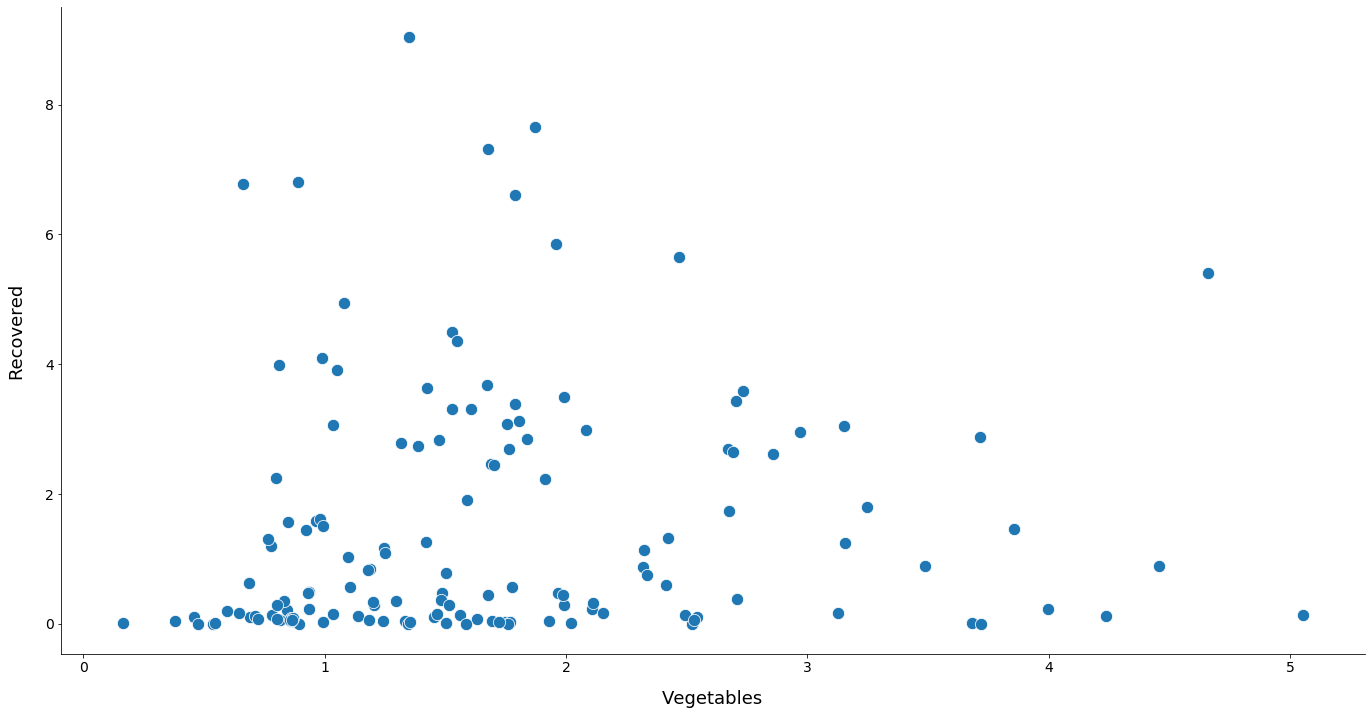

In [19]:
# Protein Supply Dataset

sns.relplot(x = "Vegetables", y = "Recovered", data = country_protein_supply, height=10,kind = "scatter",s = 150);
plt.xlabel("Vegetables",labelpad = 15)
plt.ylabel("Recovered",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(20,10)

plt.rc("font", size = 14)
plt.rc("axes", labelsize = 18)

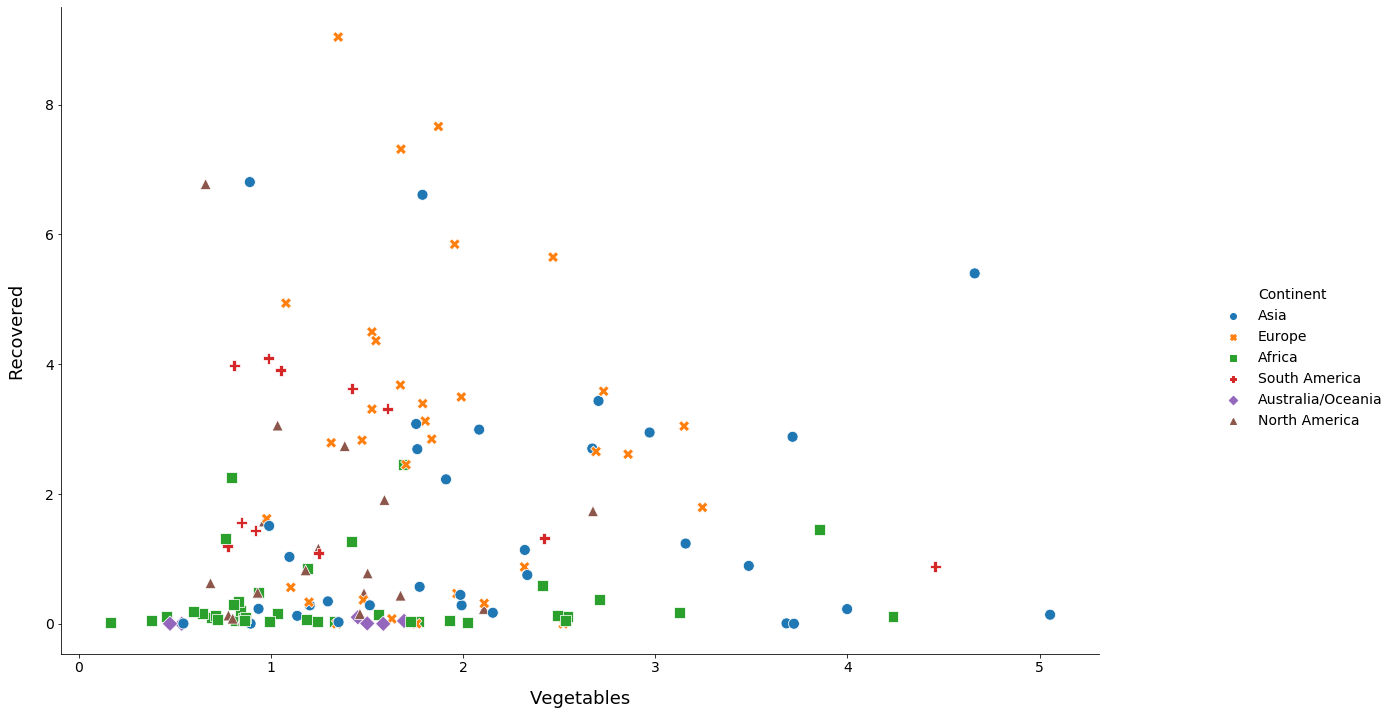

In [20]:
# Protein Supply Dataset

sns.relplot(x = "Vegetables", y = "Recovered", data = country_protein_supply, height=10,kind = "scatter",hue="Continent", s = 120,style="Continent");
plt.xlabel("Vegetables",labelpad = 15)
plt.ylabel("Recovered",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(20,10)

plt.rc("font", size = 15)
plt.rc("axes", labelsize = 18)

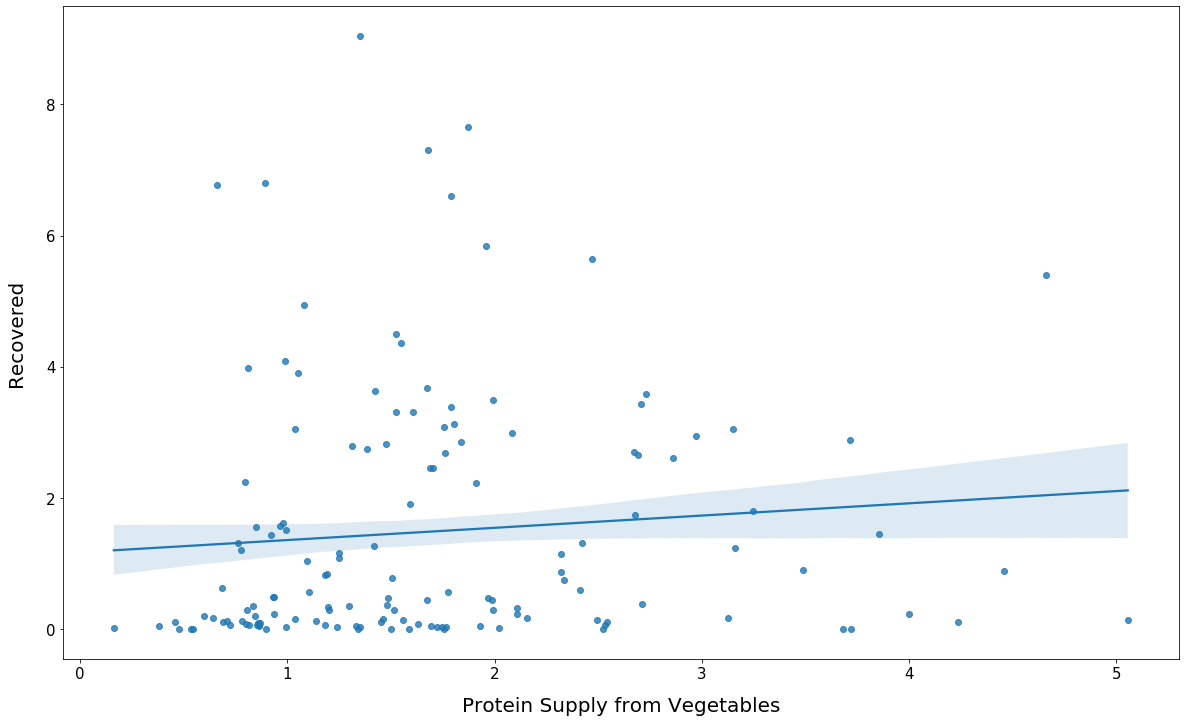

In [47]:
# Protein Supply Dataset

sns.regplot(x = "Vegetables", y = "Recovered", data = country_protein_supply,truncate=True,ci=80);
plt.xlabel("Protein Supply from Vegetables",labelpad = 15)
plt.ylabel("Recovered",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(20,12)

plt.rc("font", size = 14)
plt.rc("axes", labelsize = 18)

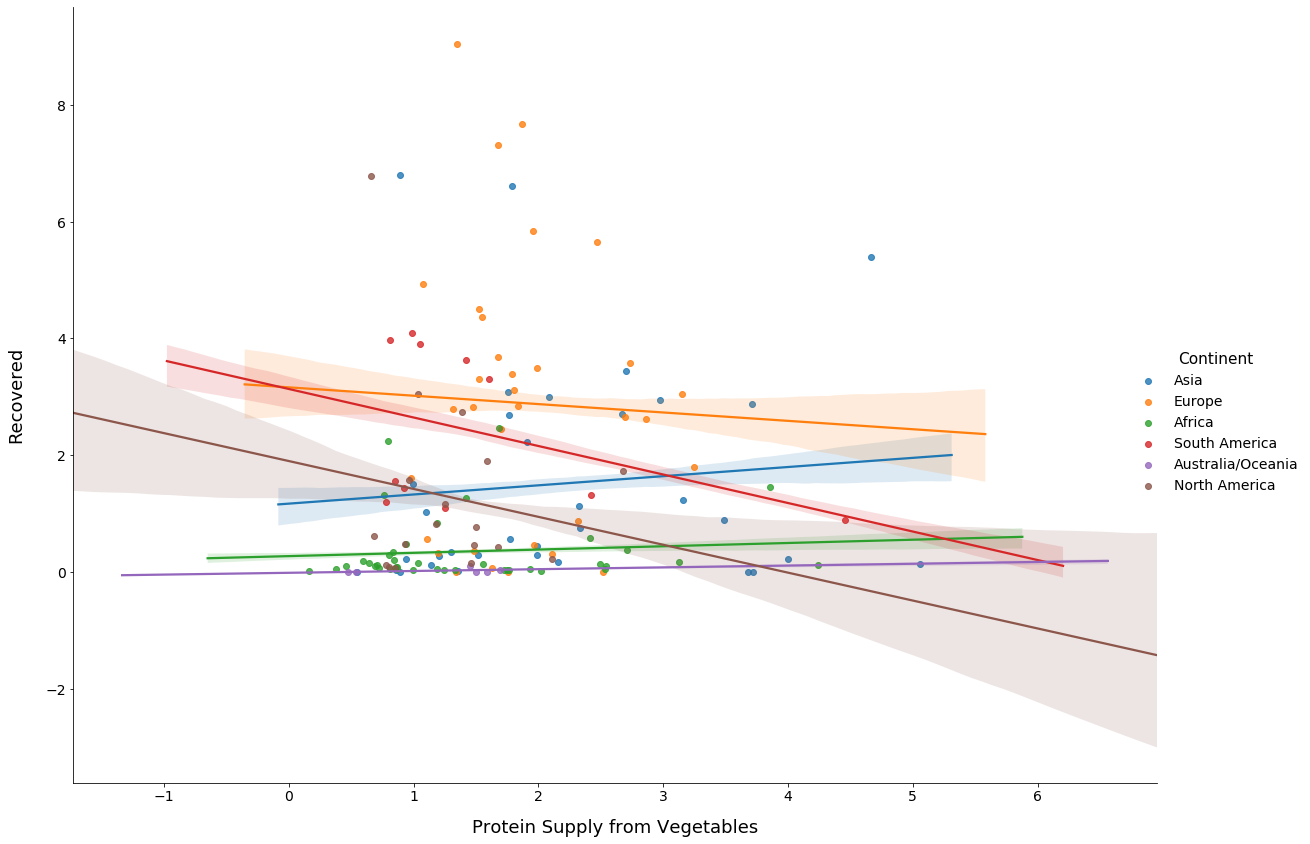

In [48]:
# Protein Supply Dataset

sns.lmplot(x = "Vegetables", y = "Recovered", data = country_protein_supply,hue = "Continent",aspect=2,height=10,ci = 30,fit_reg=True);
plt.xlabel("Protein Supply from Vegetables",labelpad = 15)
plt.ylabel("Recovered",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(18,12)

plt.rc("font", size = 14)
plt.rc("axes", labelsize = 18)


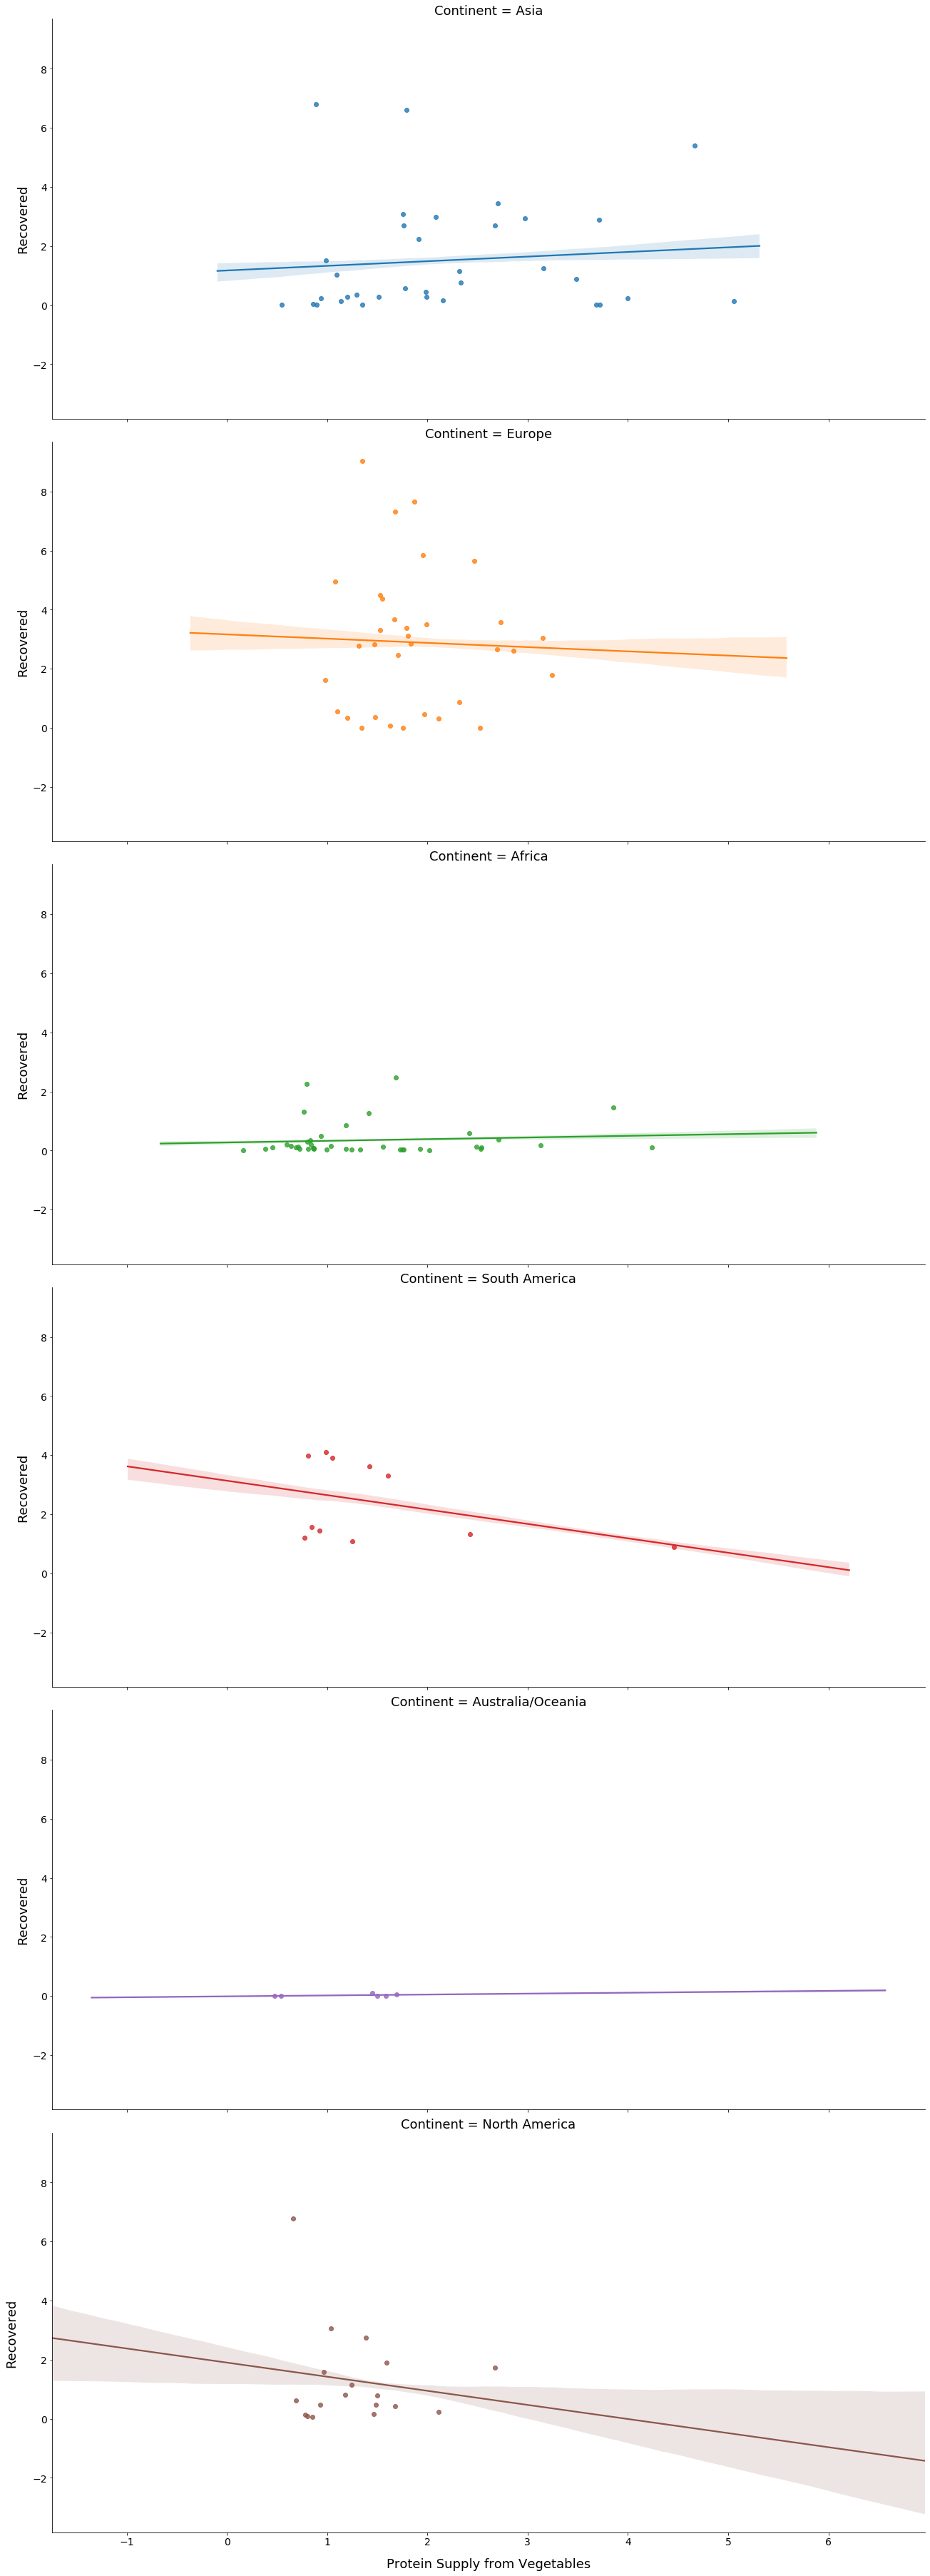

In [49]:
# Protein Supply Dataset

sns.lmplot(x = "Vegetables", y = "Recovered", data = country_protein_supply,hue = "Continent",aspect=2,height=10,ci = 30,fit_reg=True,row="Continent");
plt.xlabel("Protein Supply from Vegetables",labelpad = 15)
plt.ylabel("Recovered",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(18,50)

plt.rc("font", size = 14)
plt.rc("axes", labelsize = 18)

##                                          

## --------------------------------------------------------- Alcoholic Beverages ---------------------------------------------------------

##                      

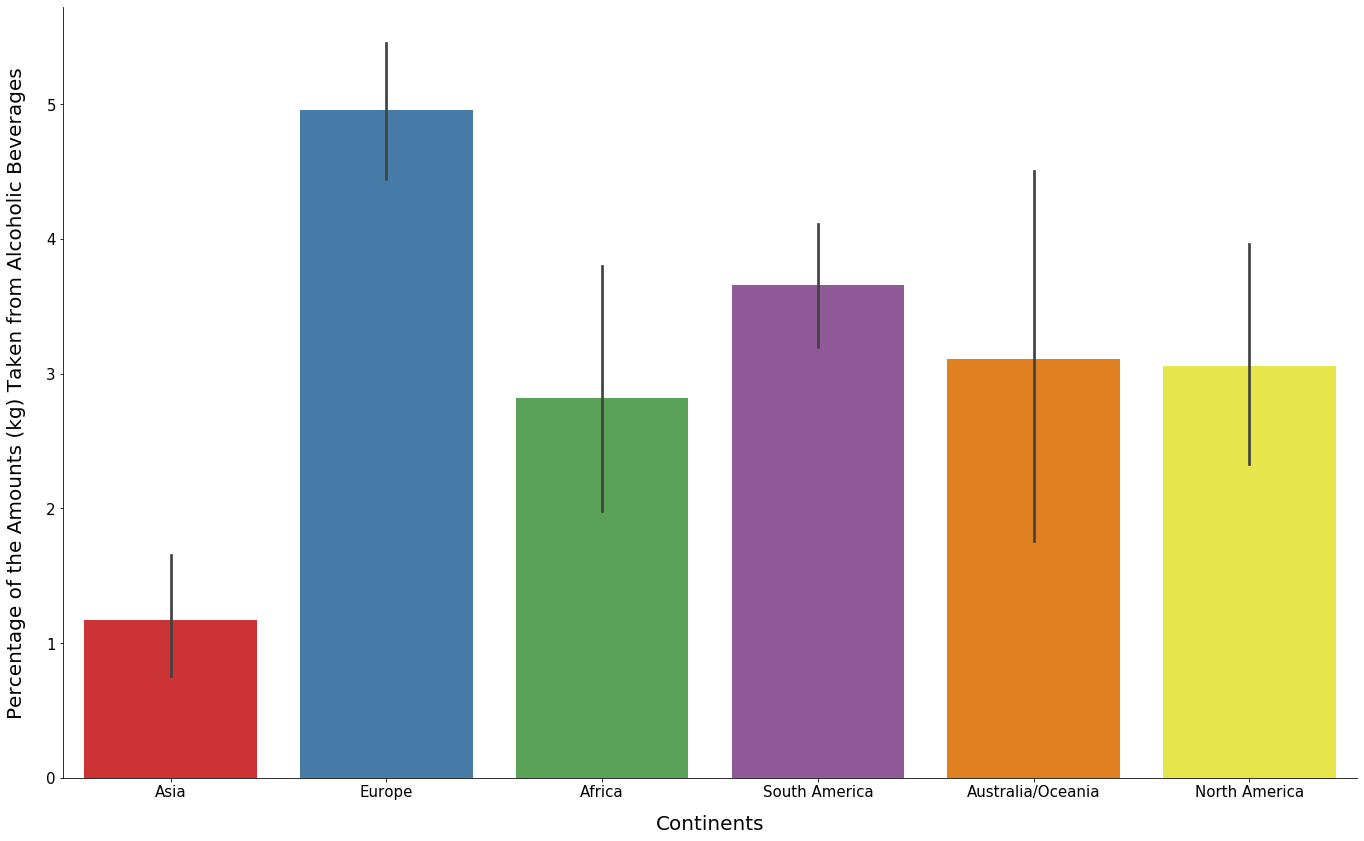

In [145]:

sns.catplot(x = "Continent", y = "Alcoholic Beverages", data = country_food_supply, height=10,kind = "bar",palette="Set1");
plt.xlabel("Continents",labelpad = 15)
plt.ylabel("Percentage of the Amounts (kg) Taken from Alcoholic Beverages",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(20,12)

plt.rc("font", size = 15)
plt.rc("axes", labelsize = 20)


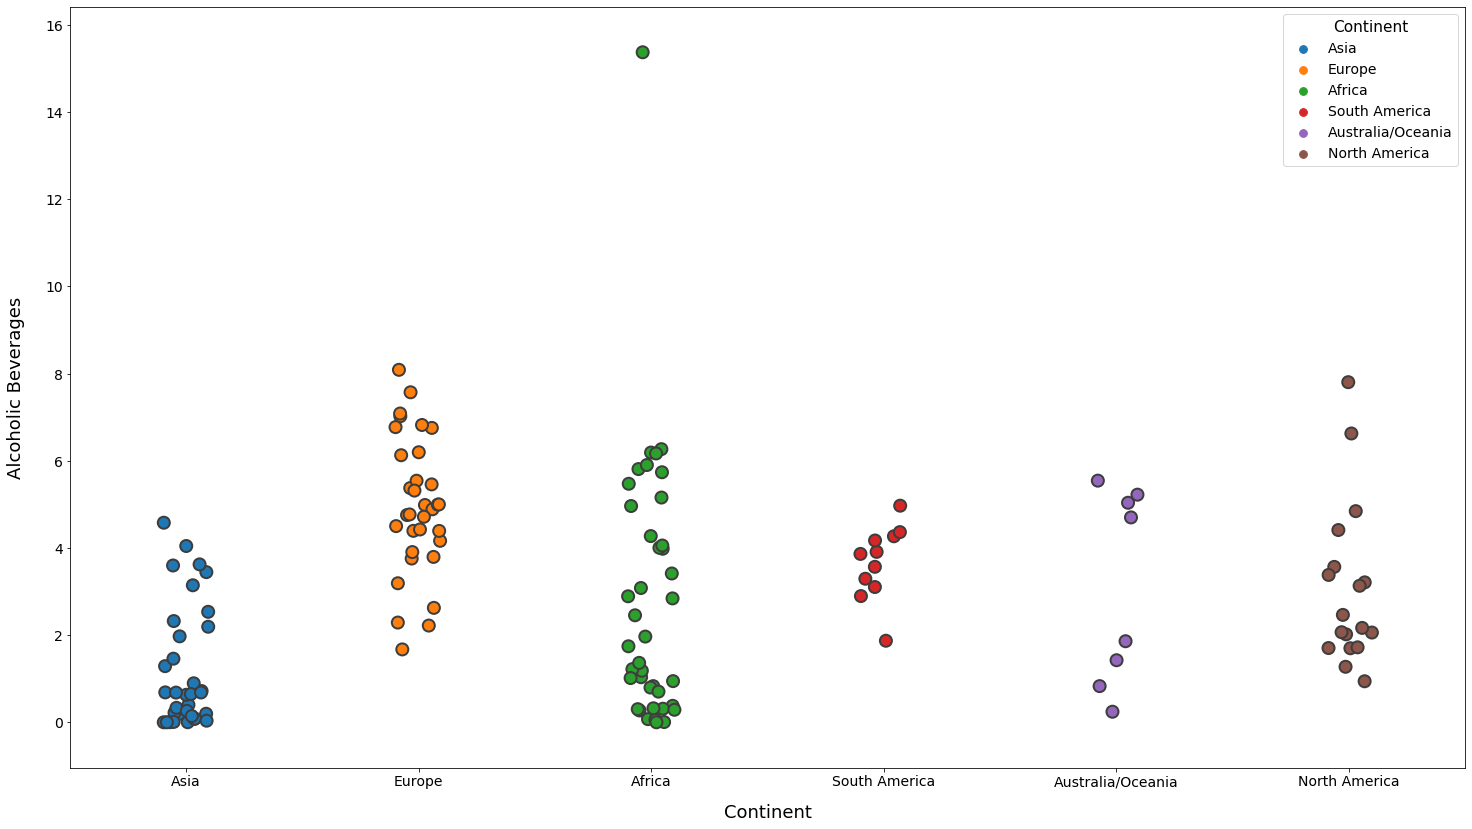

In [127]:
sns.stripplot(x = "Continent", y = "Alcoholic Beverages", data = country_food_supply,hue = "Continent",s = 12,linewidth=2);
plt.xlabel("Continent",labelpad = 15)
plt.ylabel("Alcoholic Beverages",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(25,14)

plt.rc("font", size = 15)
plt.rc("axes", labelsize = 20)


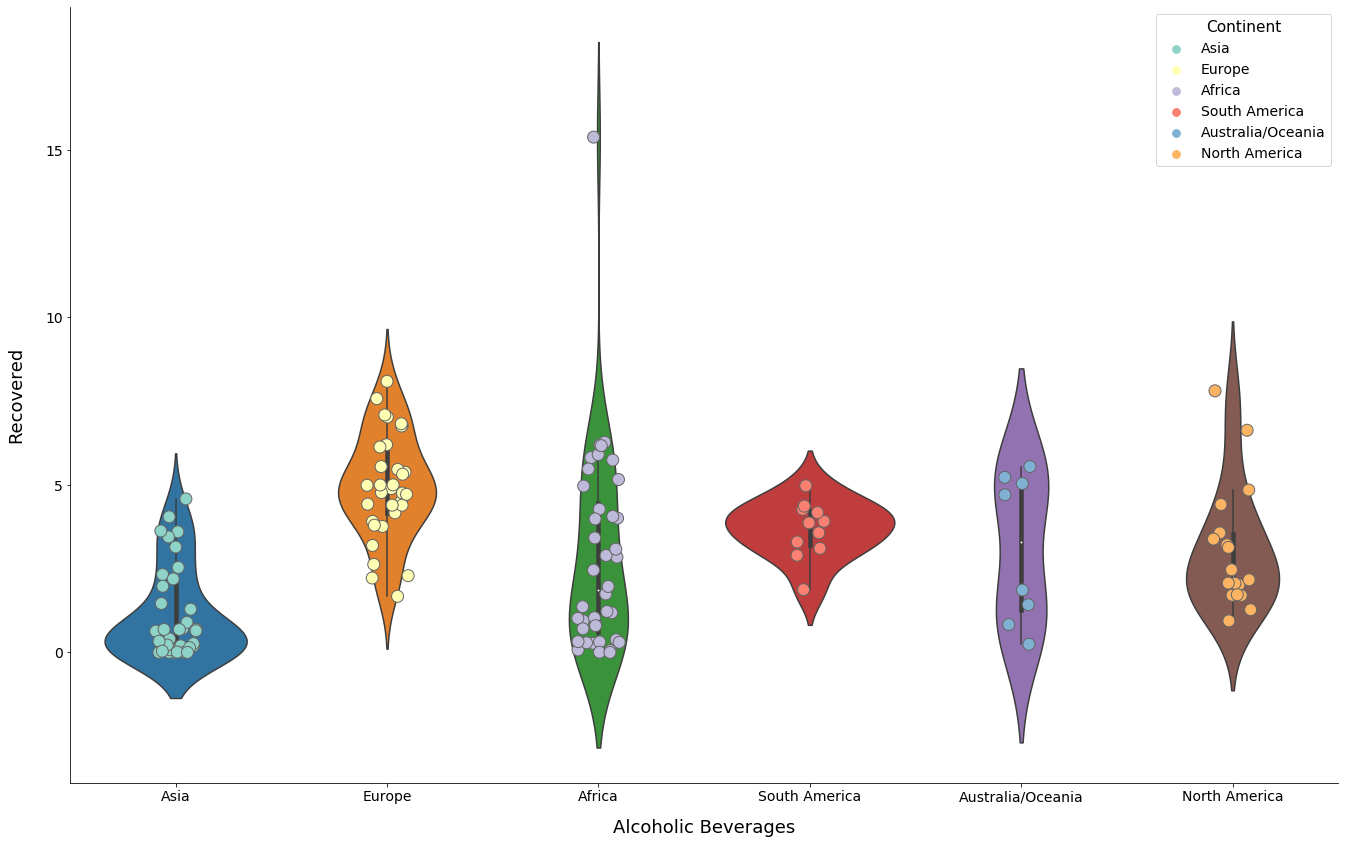

In [68]:
sns.catplot(x = "Continent", y = "Alcoholic Beverages", data = country_food_supply,aspect=5,height=10,kind="violin");
sns.stripplot(x = "Continent", y = "Alcoholic Beverages", data = country_food_supply,hue = "Continent",s = 12,linewidth=1,palette="Set3");
plt.xlabel("Alcoholic Beverages",labelpad = 15)
plt.ylabel("Recovered",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(18,12)

plt.rc("font", size = 14)
plt.rc("axes", labelsize = 18)


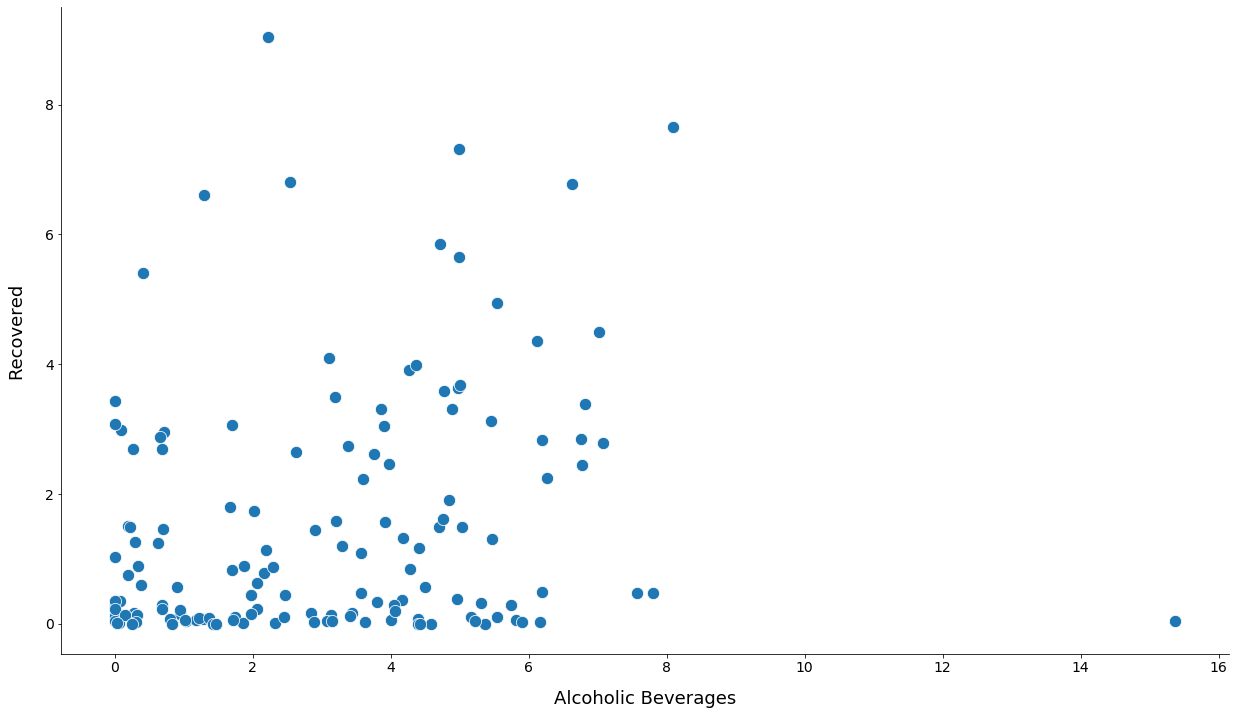

In [193]:
sns.relplot(x = "Alcoholic Beverages", y = "Recovered", data = country_food_supply, height=10,kind = "scatter",s = 150);
plt.xlabel("Alcoholic Beverages",labelpad = 15)
plt.ylabel("Recovered",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(18,10)

plt.rc("font", size = 14)
plt.rc("axes", labelsize = 18)

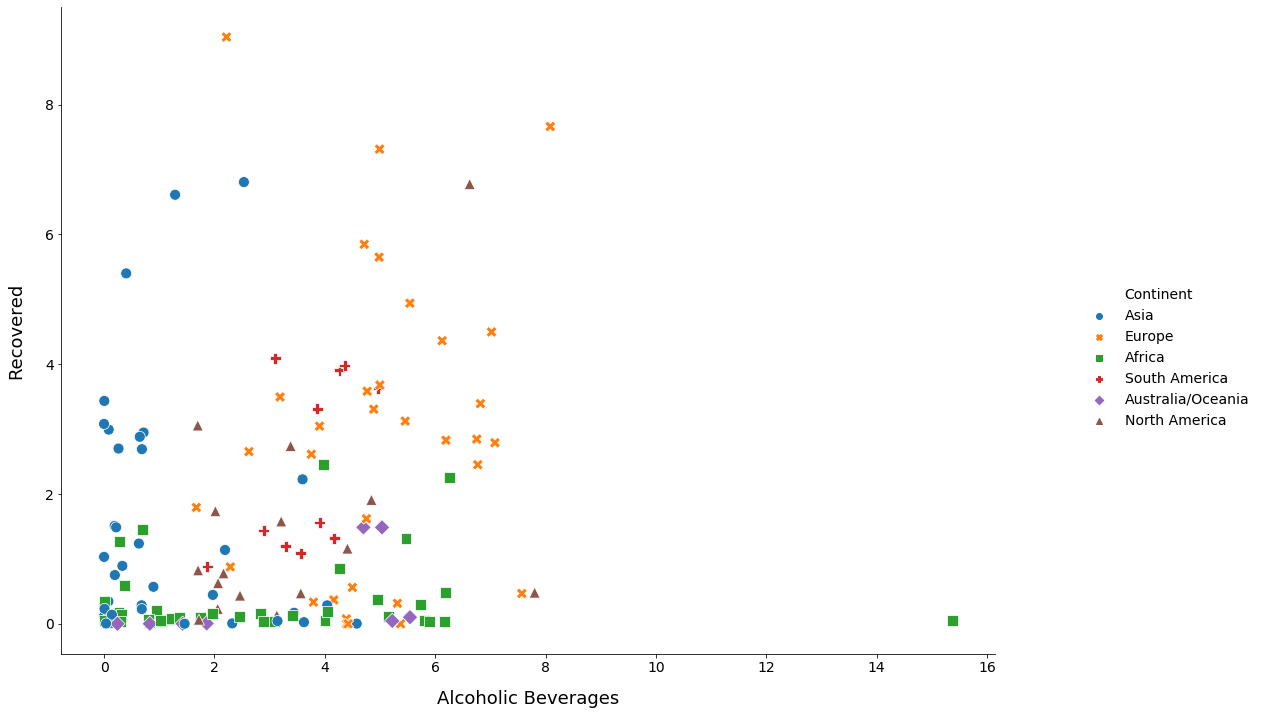

In [194]:
sns.relplot(x = "Alcoholic Beverages", y = "Recovered", data = country_food_supply, height=10,kind = "scatter",hue="Continent", s = 120,style="Continent");
plt.xlabel("Alcoholic Beverages",labelpad = 15)
plt.ylabel("Recovered",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(18,10)

plt.rc("font", size = 14)
plt.rc("axes", labelsize = 18)

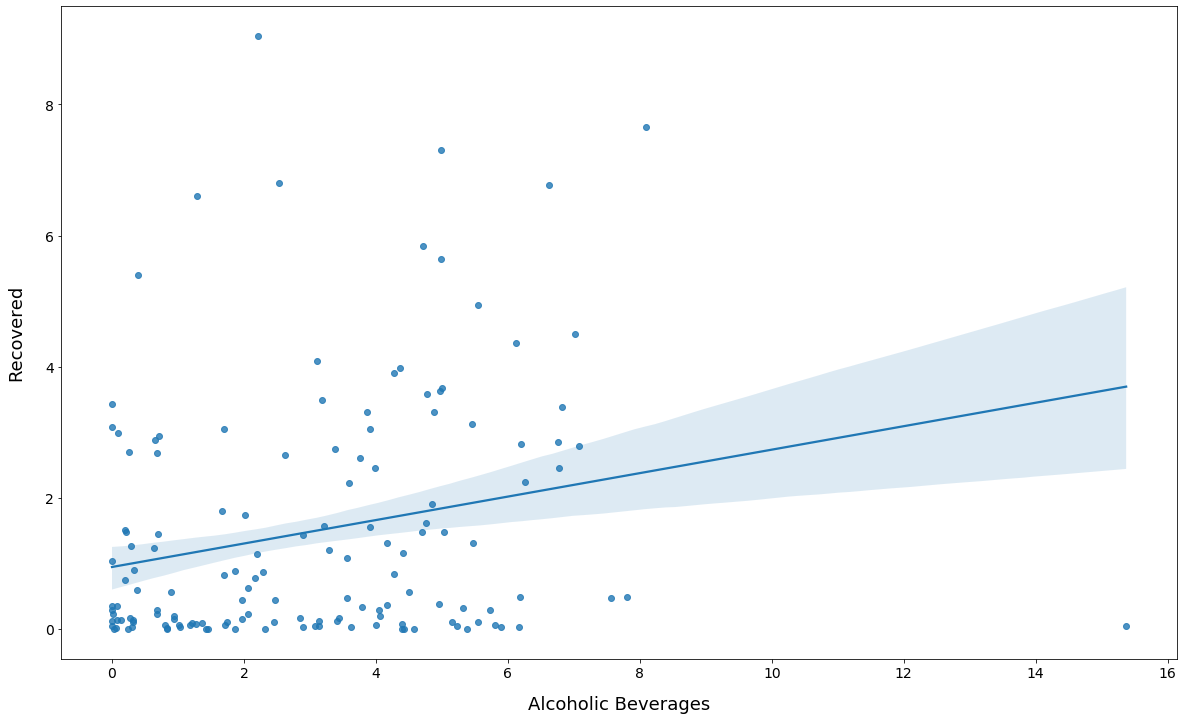

In [190]:
sns.regplot(x = "Alcoholic Beverages", y = "Recovered", data = country_food_supply,truncate=True,ci=80);
plt.xlabel("Alcoholic Beverages",labelpad = 15)
plt.ylabel("Recovered",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(20,12)

plt.rc("font", size = 14)
plt.rc("axes", labelsize = 18)

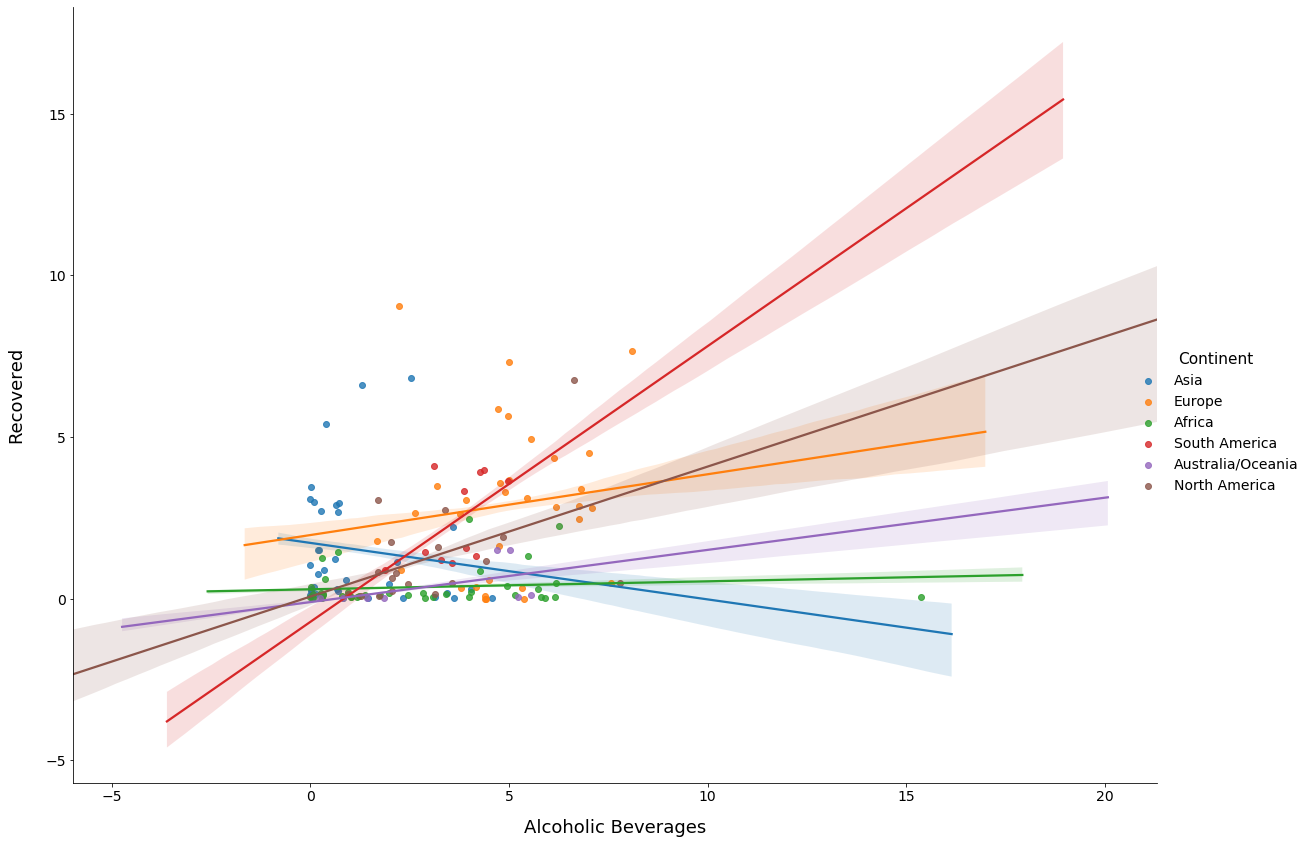

In [128]:
sns.lmplot(x = "Alcoholic Beverages", y = "Recovered", data = country_food_supply,hue = "Continent",aspect=2,height=10,ci = 30,fit_reg=True);
plt.xlabel("Alcoholic Beverages",labelpad = 15)
plt.ylabel("Recovered",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(18,12)

plt.rc("font", size = 14)
plt.rc("axes", labelsize = 18)


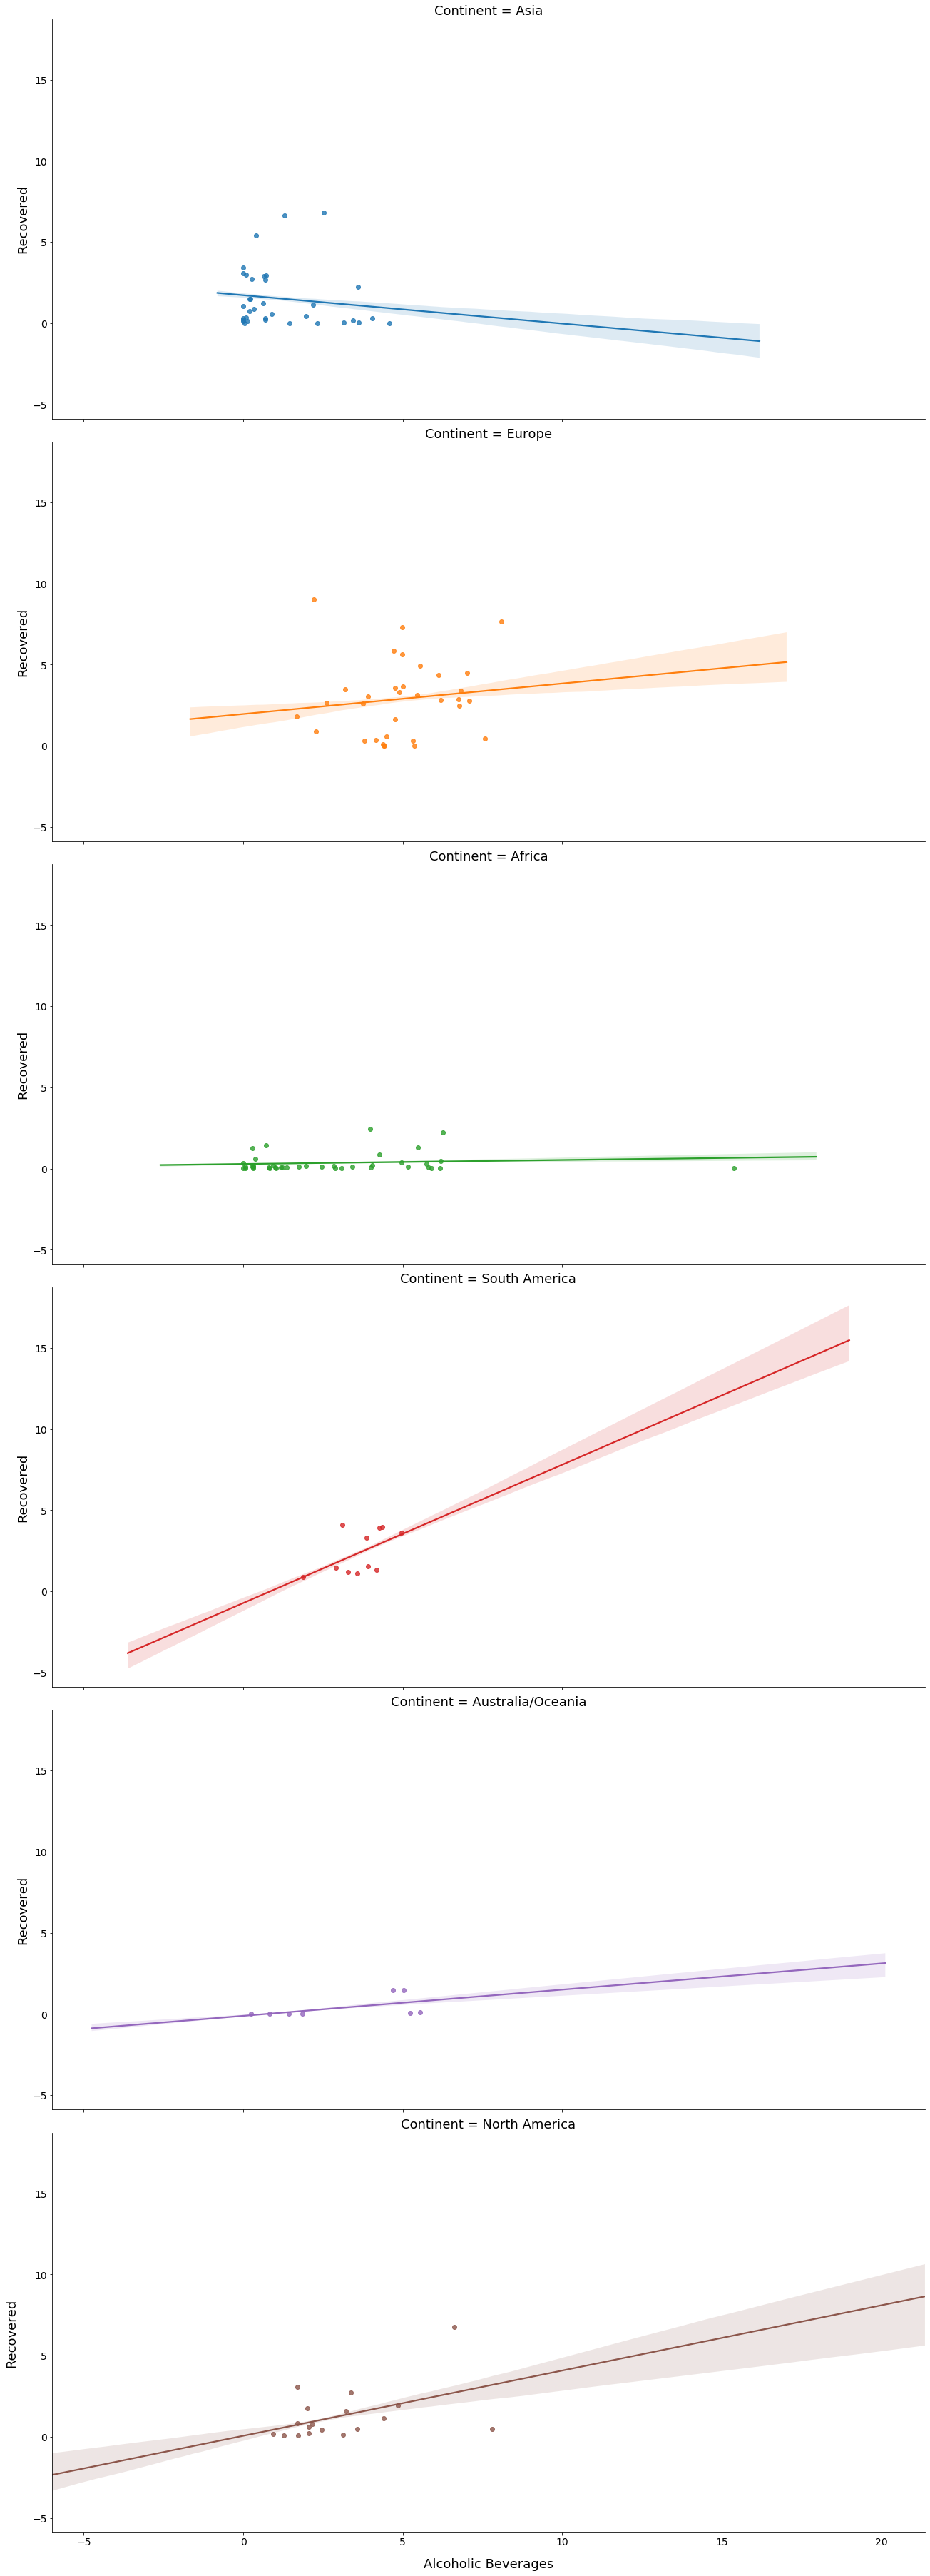

In [129]:
sns.lmplot(x = "Alcoholic Beverages", y = "Recovered", data = country_food_supply,hue = "Continent",aspect=2,height=10,ci = 30,fit_reg=True,row="Continent");
plt.xlabel("Alcoholic Beverages",labelpad = 15)
plt.ylabel("Recovered",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(18,50)

plt.rc("font", size = 14)
plt.rc("axes", labelsize = 18)

##         

## Percentage of Energy Intake (kcal) from Alcoholic Beverages

##                     

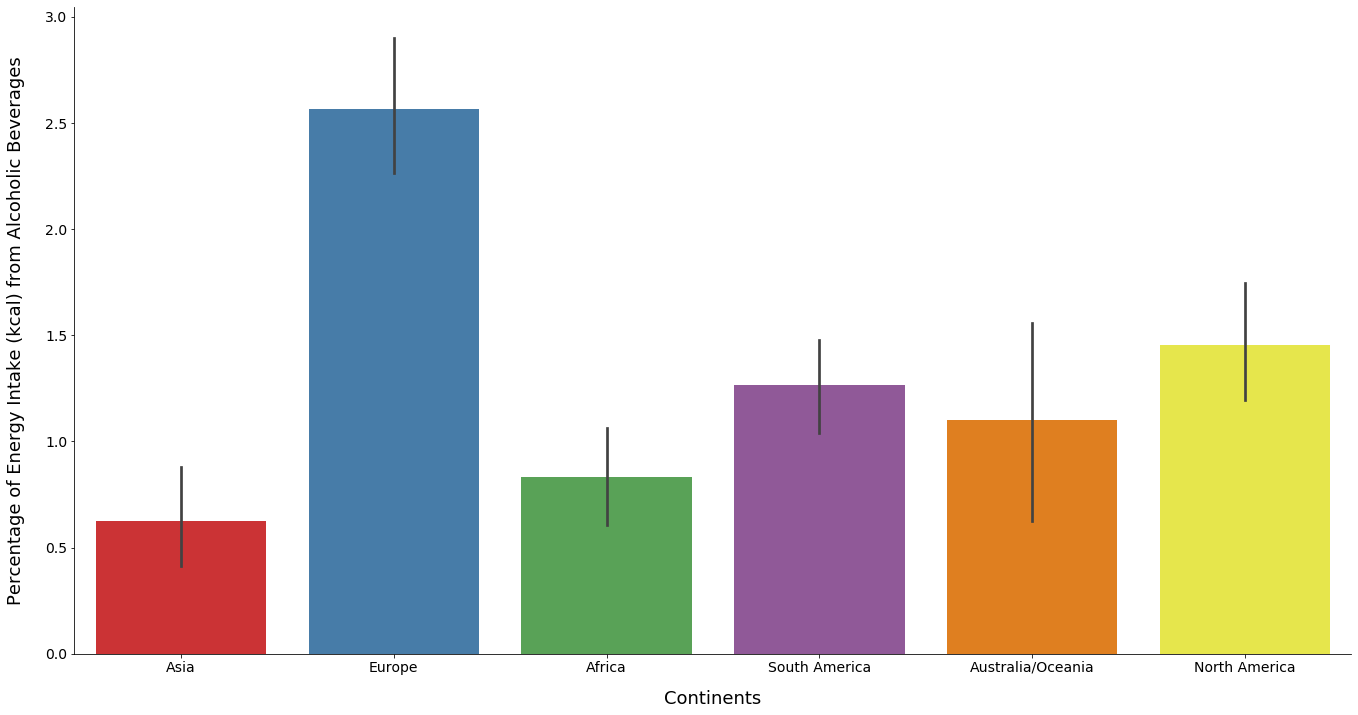

In [17]:
# Energy Intake Dataset

sns.catplot(x = "Continent", y = "Alcoholic Beverages", data = country_kcal_supply, height=10,kind = "bar",palette="Set1");
plt.xlabel("Continents",labelpad = 15)
plt.ylabel("Percentage of Energy Intake (kcal) from Alcoholic Beverages",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(20,10)

plt.rc("font", size = 15)
plt.rc("axes", labelsize = 18)


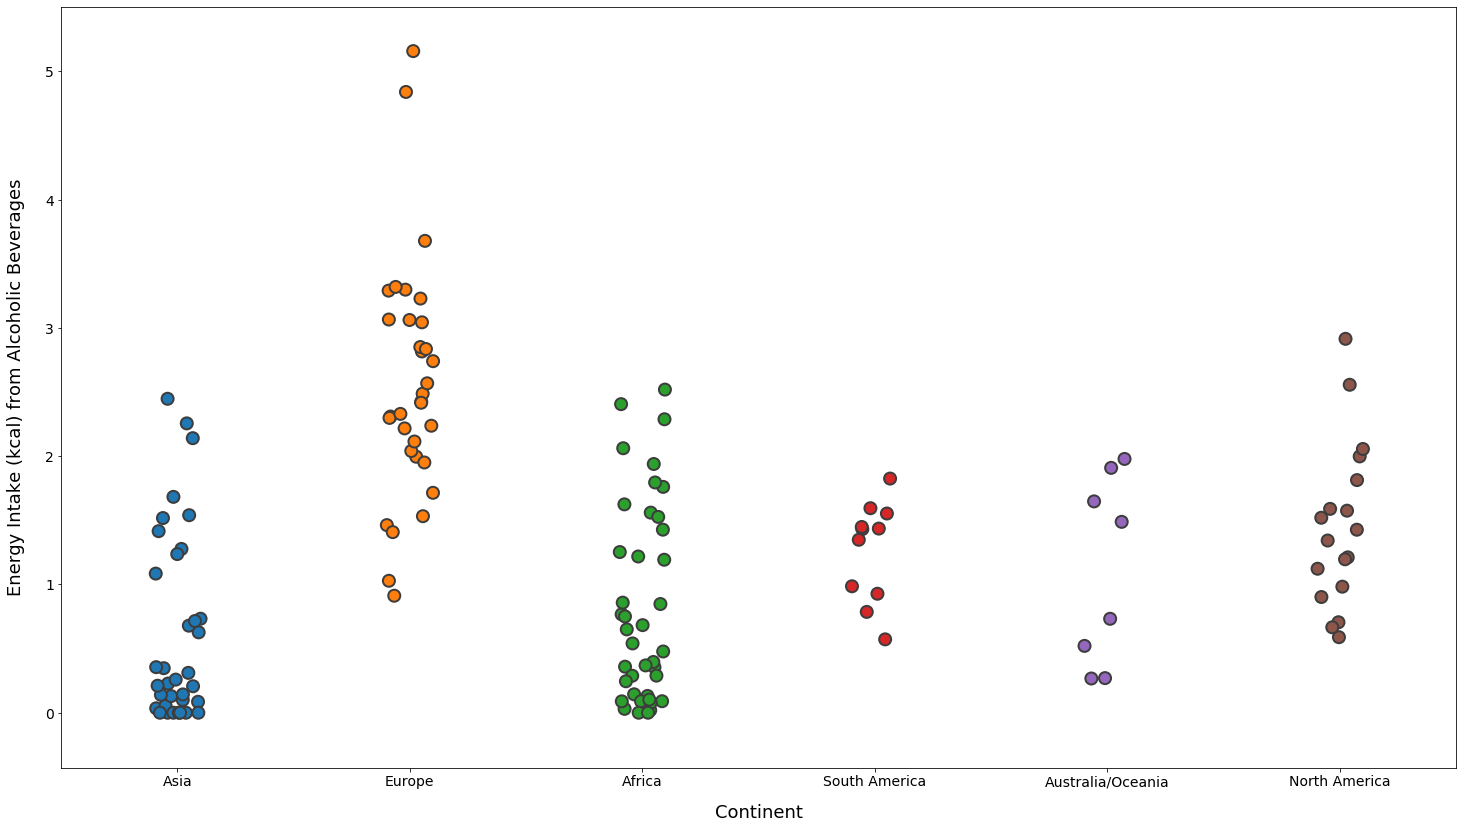

In [23]:
# Energy Intake Dataset

sns.stripplot(x = "Continent", y = "Alcoholic Beverages", data = country_kcal_supply,s = 12,linewidth=2);
plt.xlabel("Continent",labelpad = 15)
plt.ylabel("Energy Intake (kcal) from Alcoholic Beverages",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(25,14)

plt.rc("font", size = 15)
plt.rc("axes", labelsize = 20)



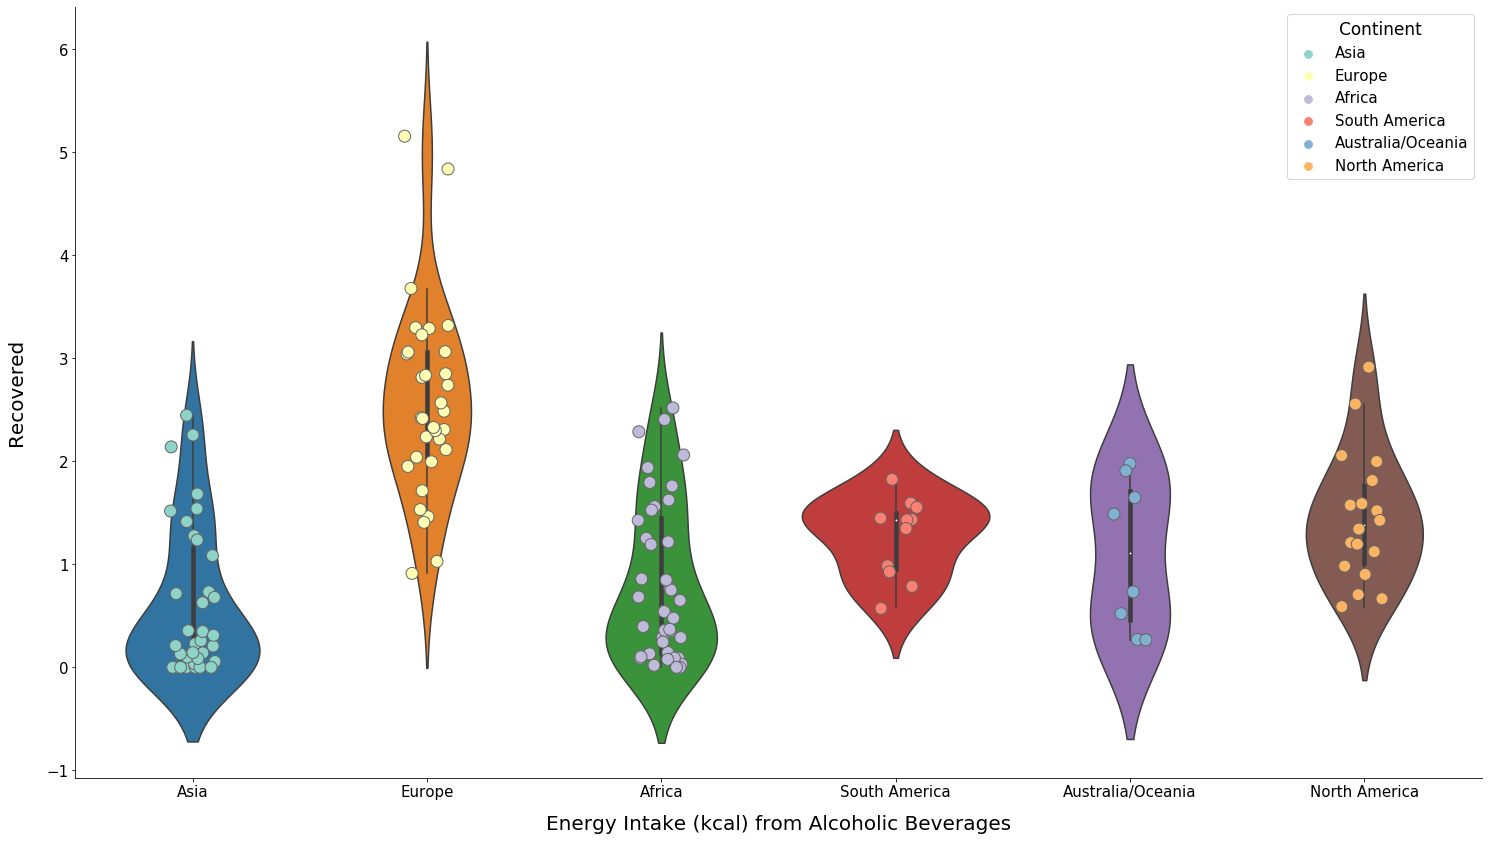

In [24]:
# Energy Intake Dataset

sns.catplot(x = "Continent", y = "Alcoholic Beverages", data = country_kcal_supply,aspect=5,height=10,kind="violin");
sns.stripplot(x = "Continent", y = "Alcoholic Beverages", data = country_kcal_supply,hue = "Continent",s = 12,linewidth=1,palette="Set3");
plt.xlabel("Energy Intake (kcal) from Alcoholic Beverages",labelpad = 15)
plt.ylabel("Recovered",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(20,12)
;
plt.rc("font", size = 15)
plt.rc("axes", labelsize = 20)


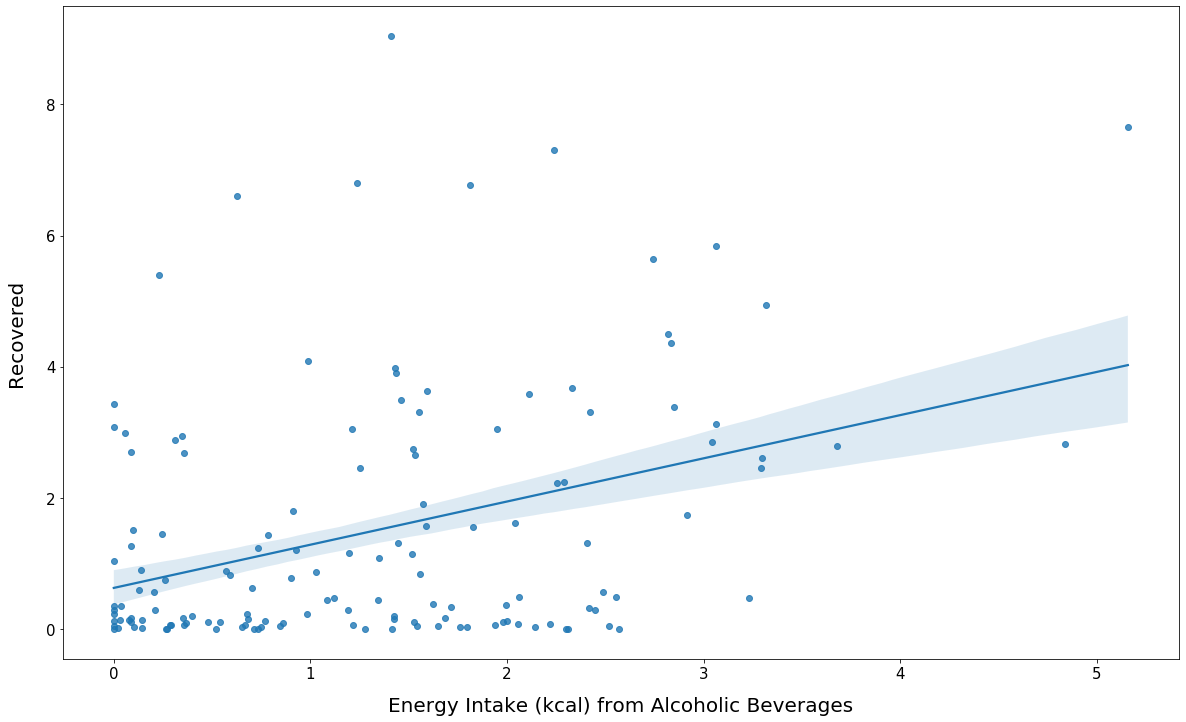

In [25]:
# Energy Intake Dataset

sns.regplot(x = "Alcoholic Beverages", y = "Recovered", data = country_kcal_supply,truncate=True,ci=80);
plt.xlabel("Energy Intake (kcal) from Alcoholic Beverages",labelpad = 15)
plt.ylabel("Recovered",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(20,12)

plt.rc("font", size = 14)
plt.rc("axes", labelsize = 18)

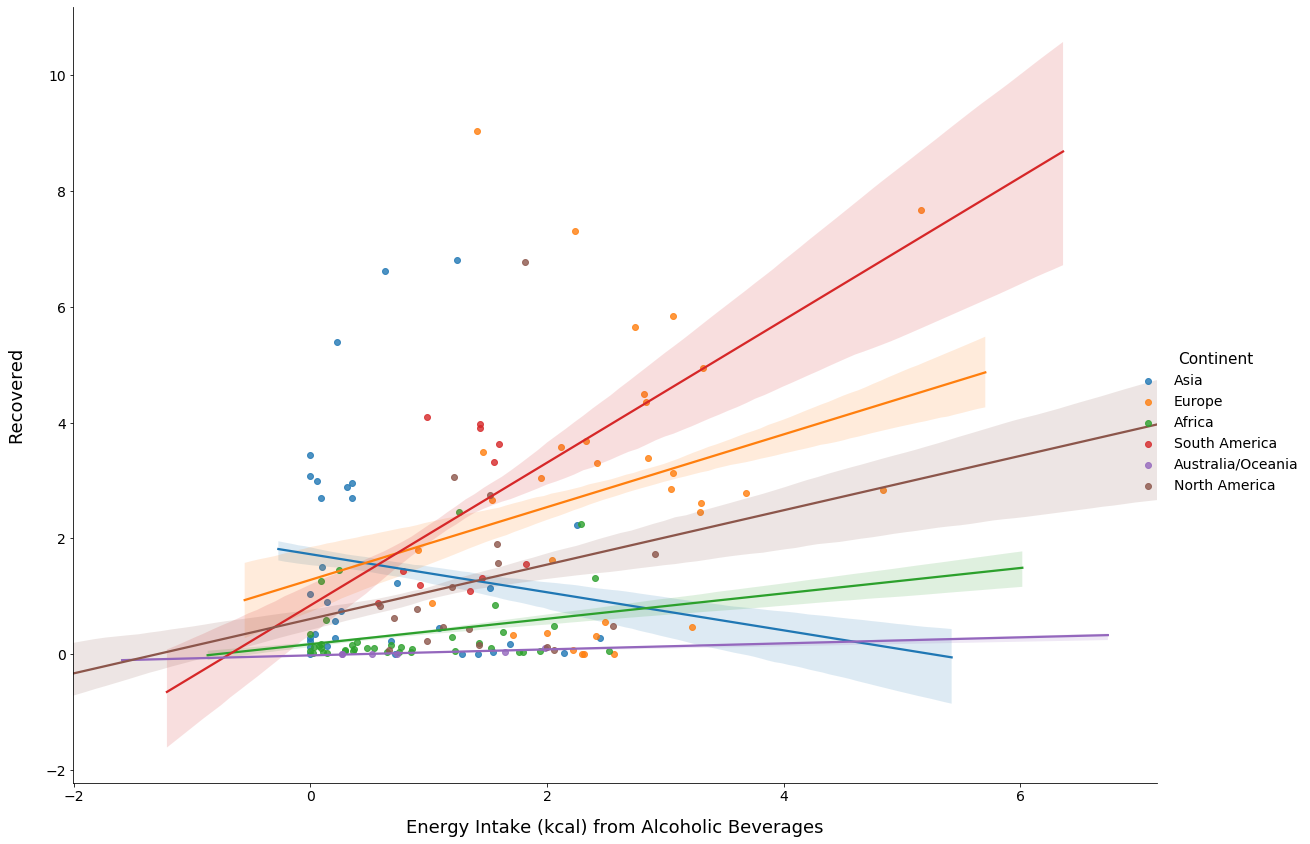

In [27]:
# Energy Intake Dataset

sns.lmplot(x = "Alcoholic Beverages", y = "Recovered", data = country_kcal_supply,hue = "Continent",aspect=2,height=10,ci = 30,fit_reg=True);
plt.xlabel("Energy Intake (kcal) from Alcoholic Beverages",labelpad = 15)
plt.ylabel("Recovered",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(18,12)

plt.rc("font", size = 14)
plt.rc("axes", labelsize = 18)


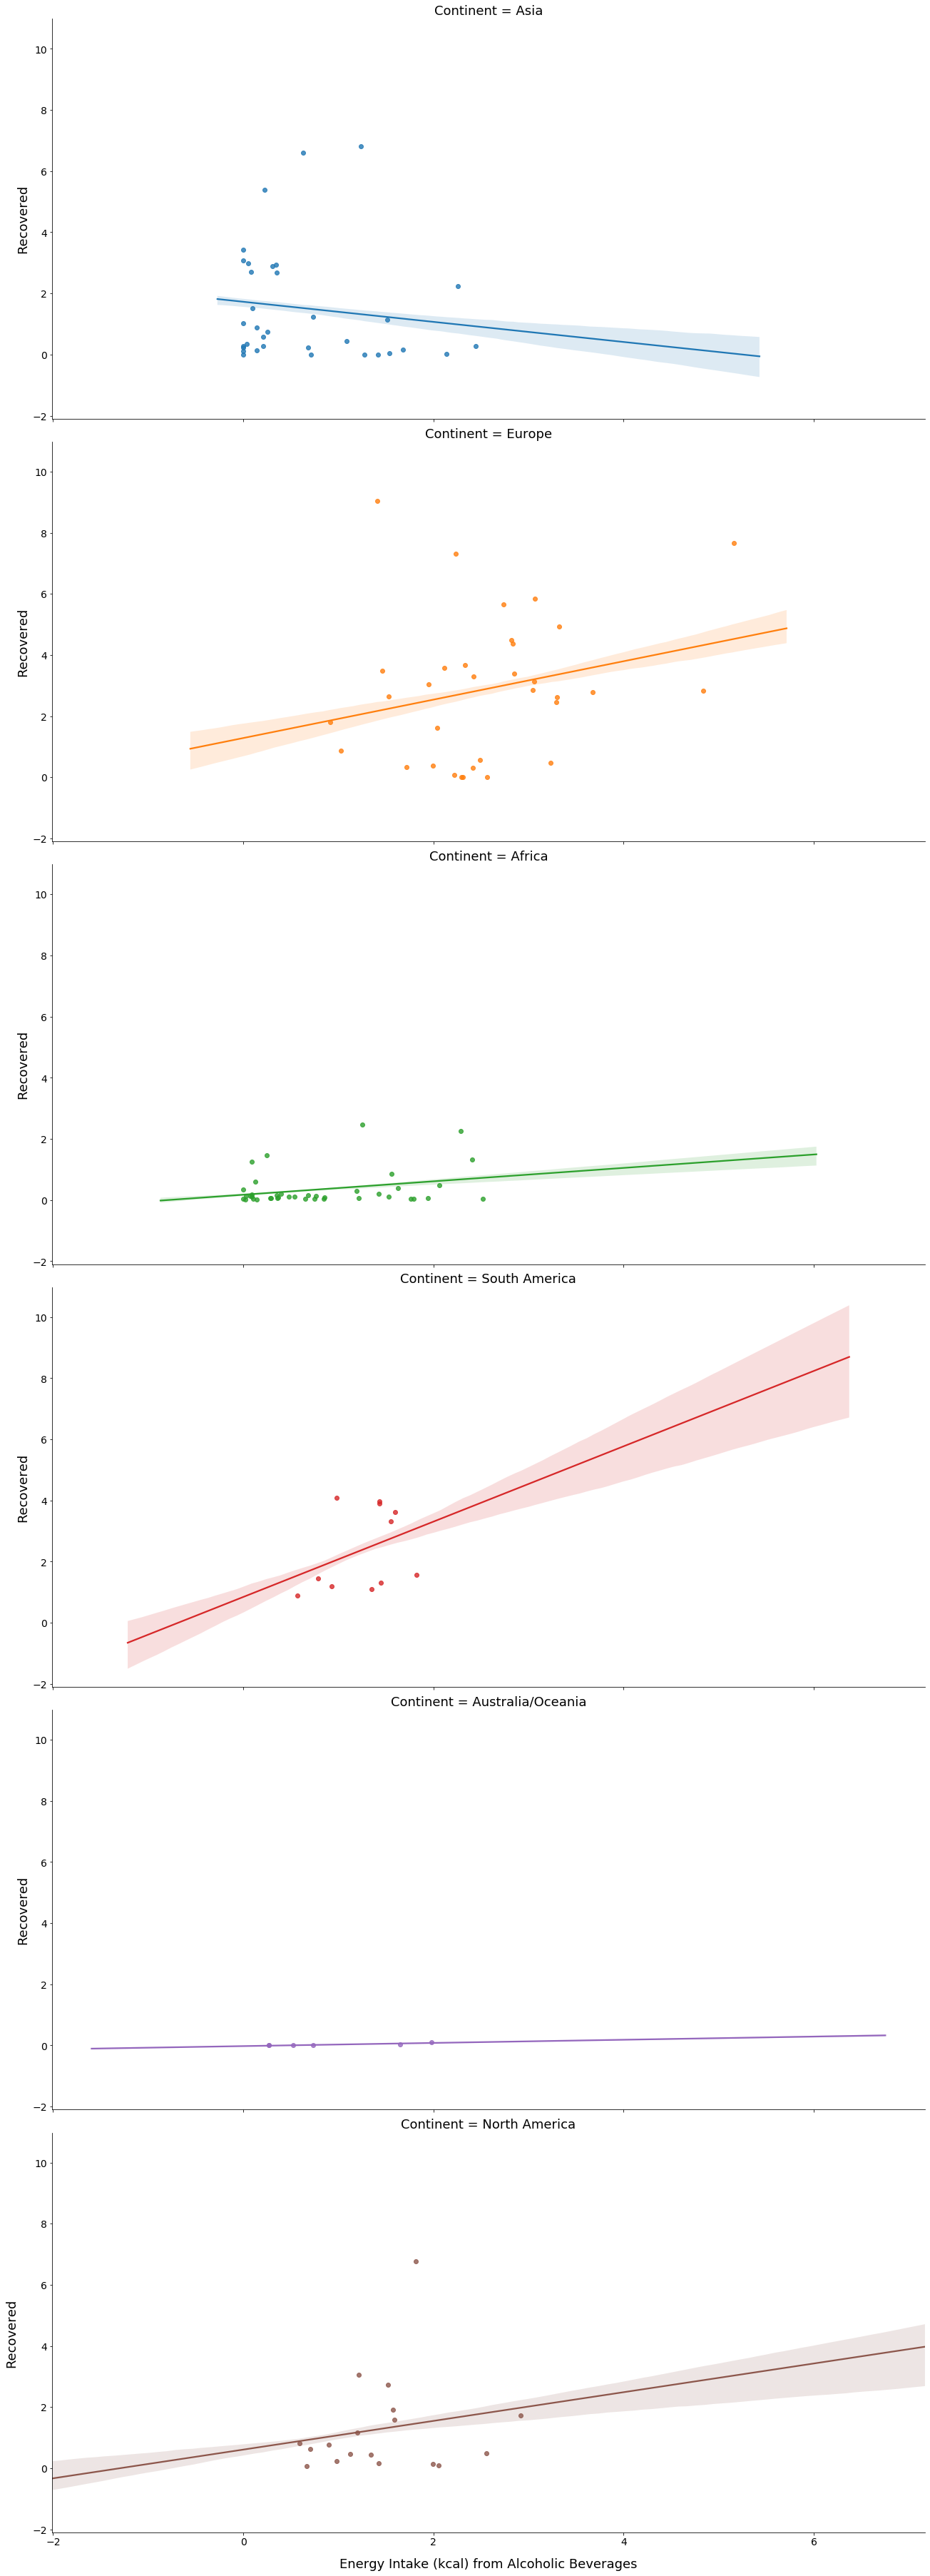

In [28]:
# Energy Intake Dataset

sns.lmplot(x = "Alcoholic Beverages", y = "Recovered", data = country_kcal_supply,hue = "Continent",aspect=2,height=10,ci = 30,fit_reg=True,row="Continent");
plt.xlabel("Energy Intake (kcal) from Alcoholic Beverages",labelpad = 15)
plt.ylabel("Recovered",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(18,50)

plt.rc("font", size = 14)
plt.rc("axes", labelsize = 18)

#         
## ---------------------------- Sugar & Sweeteners ----------------------------
#          

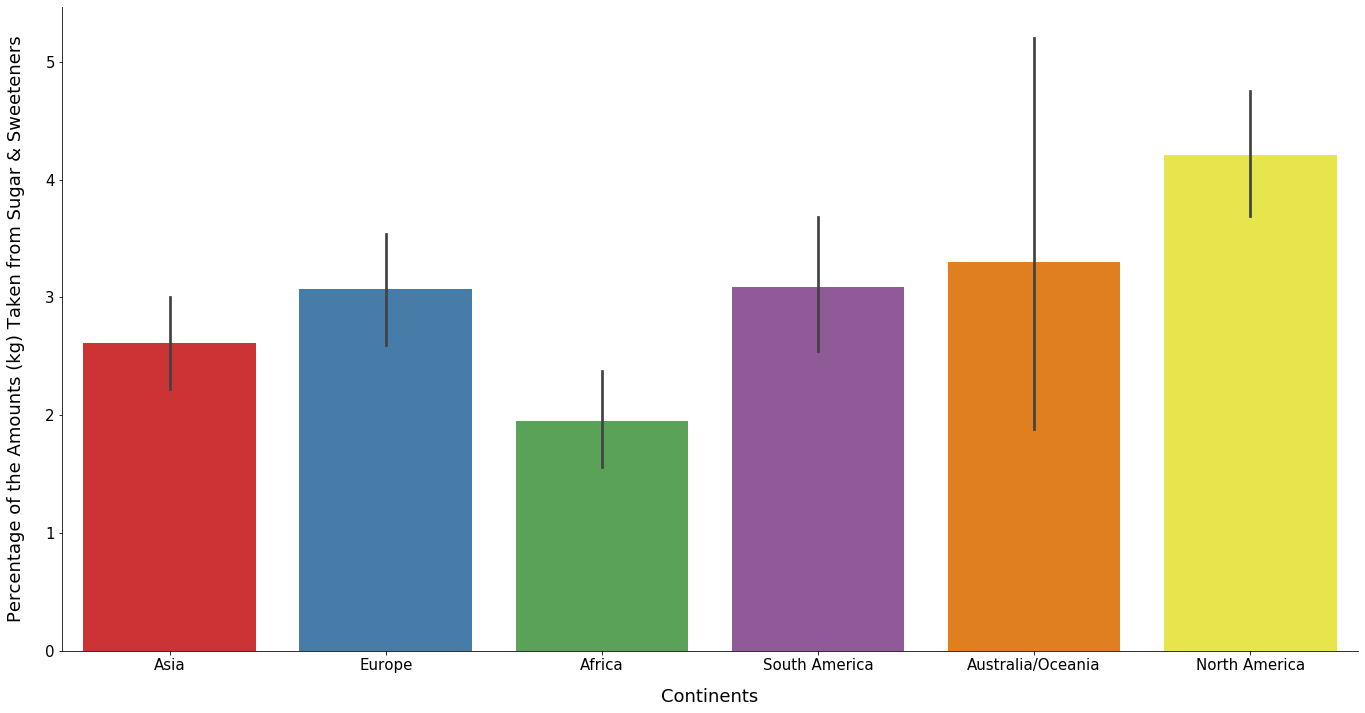

In [28]:

sns.catplot(x = "Continent", y = "Sugar & Sweeteners", data = country_food_supply, height=10,kind = "bar",palette="Set1");
plt.xlabel("Continents",labelpad = 15)
plt.ylabel("Percentage of the Amounts (kg) Taken from Sugar & Sweeteners",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(20,10)

plt.rc("font", size = 14)
plt.rc("axes", labelsize = 18)


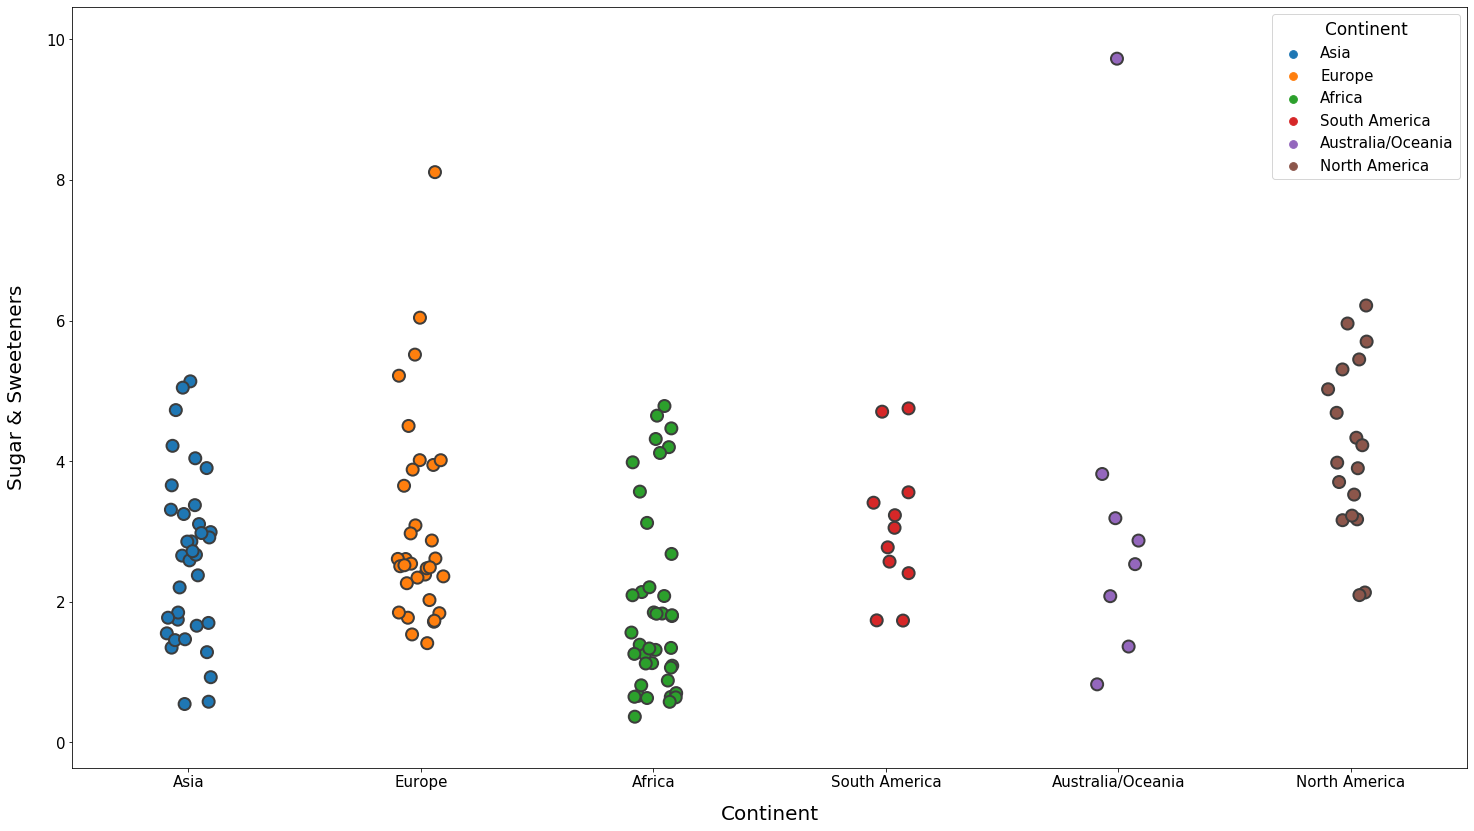

In [141]:
sns.stripplot(x = "Continent", y = "Sugar & Sweeteners", data = country_food_supply,hue = "Continent",s = 12,linewidth=2);
plt.xlabel("Continent",labelpad = 15)
plt.ylabel("Sugar & Sweeteners",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(25,14)

plt.rc("font", size = 15)
plt.rc("axes", labelsize = 20)


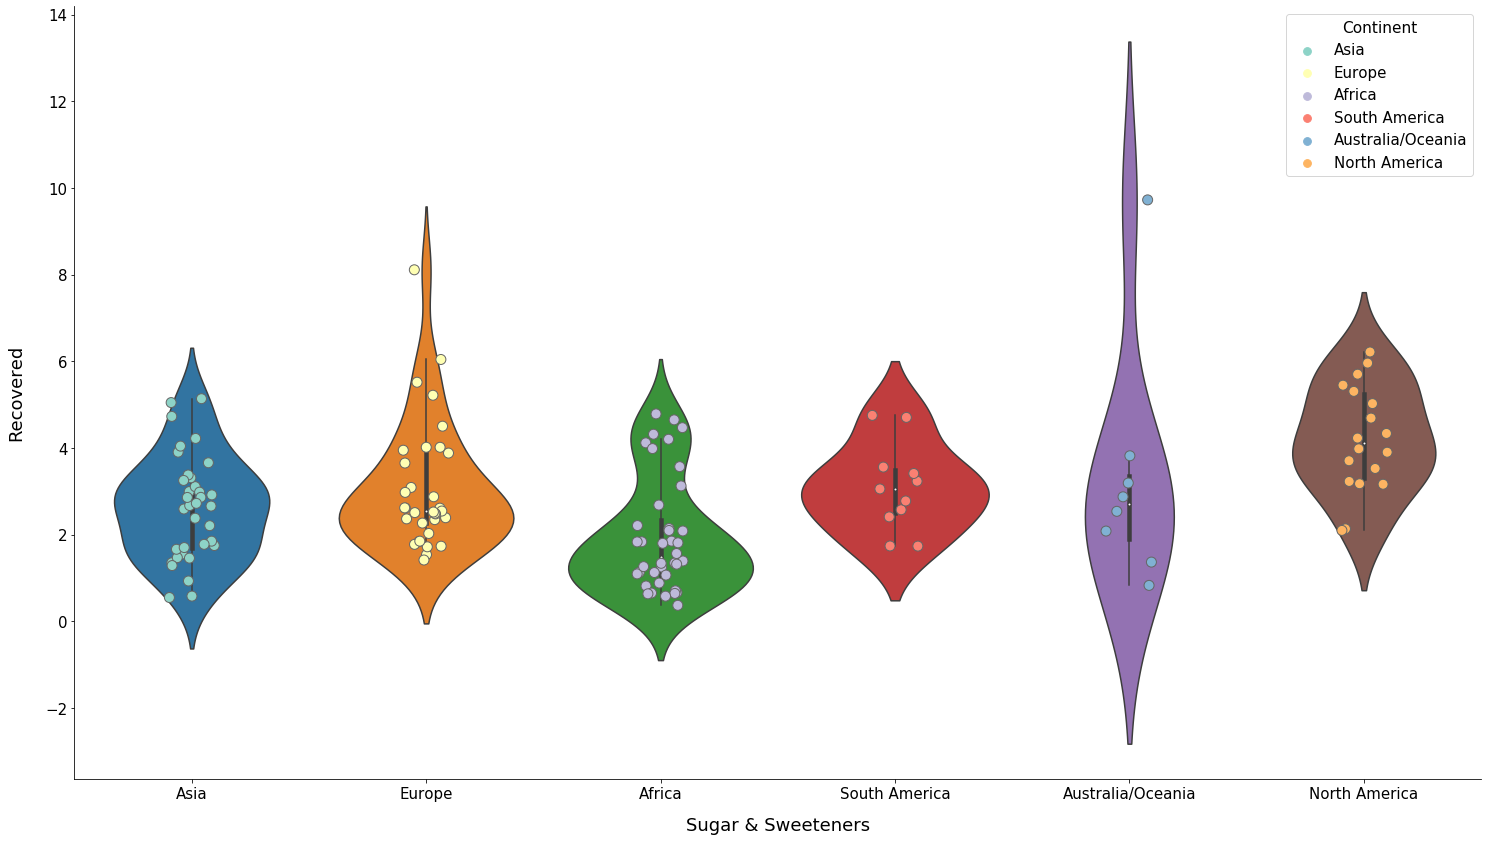

In [36]:
sns.catplot(x = "Continent", y = "Sugar & Sweeteners", data = country_food_supply,aspect=5,height=10,kind="violin");
sns.stripplot(x = "Continent", y = "Sugar & Sweeteners", data = country_food_supply,hue = "Continent",s = 10,palette="Set3",linewidth=1);

plt.xlabel("Sugar & Sweeteners",labelpad = 15)
plt.ylabel("Recovered",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(20,12)

plt.rc("font", size = 15)
plt.rc("axes", labelsize = 18)


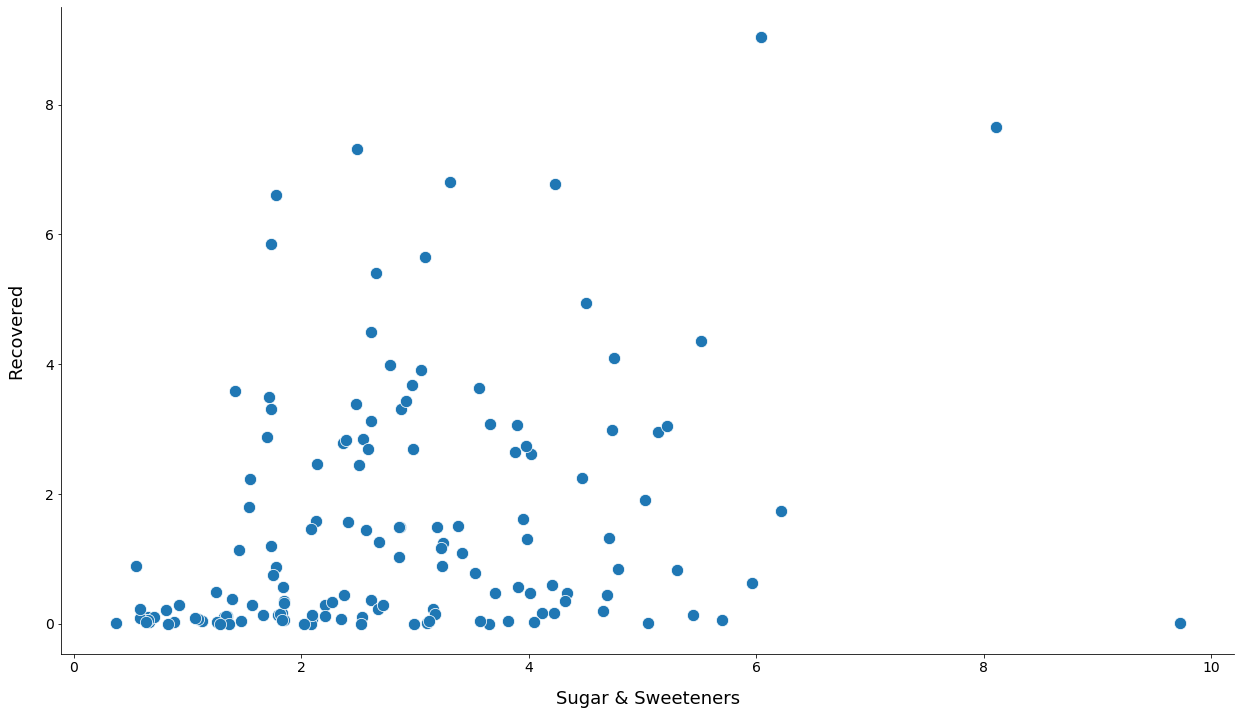

In [249]:
sns.relplot(x = "Sugar & Sweeteners", y = "Recovered", data = country_food_supply, height=10,kind = "scatter",s = 150);
plt.xlabel("Sugar & Sweeteners",labelpad = 15)
plt.ylabel("Recovered",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(18,10)

plt.rc("font", size = 14)
plt.rc("axes", labelsize = 18)

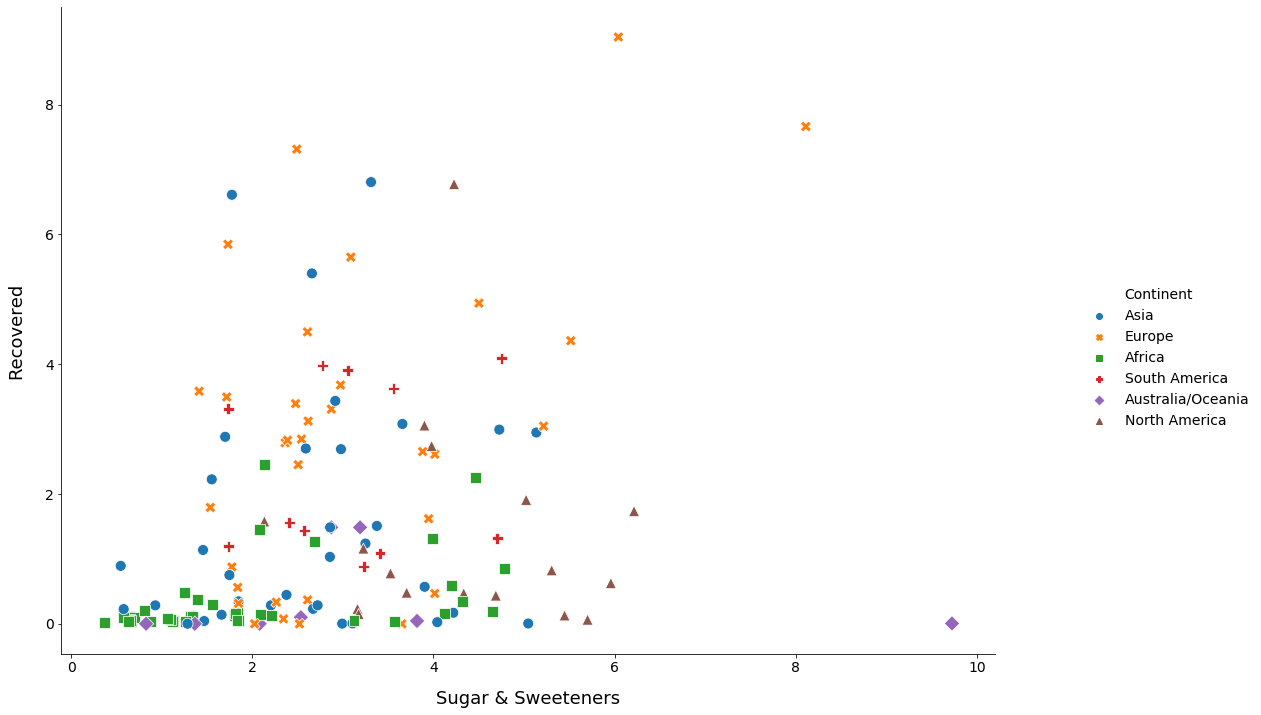

In [250]:
sns.relplot(x = "Sugar & Sweeteners", y = "Recovered", data = country_food_supply, height=10,kind = "scatter",hue="Continent", s = 120,style="Continent");
plt.xlabel("Sugar & Sweeteners",labelpad = 15)
plt.ylabel("Recovered",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(18,10)

plt.rc("font", size = 14)
plt.rc("axes", labelsize = 18)

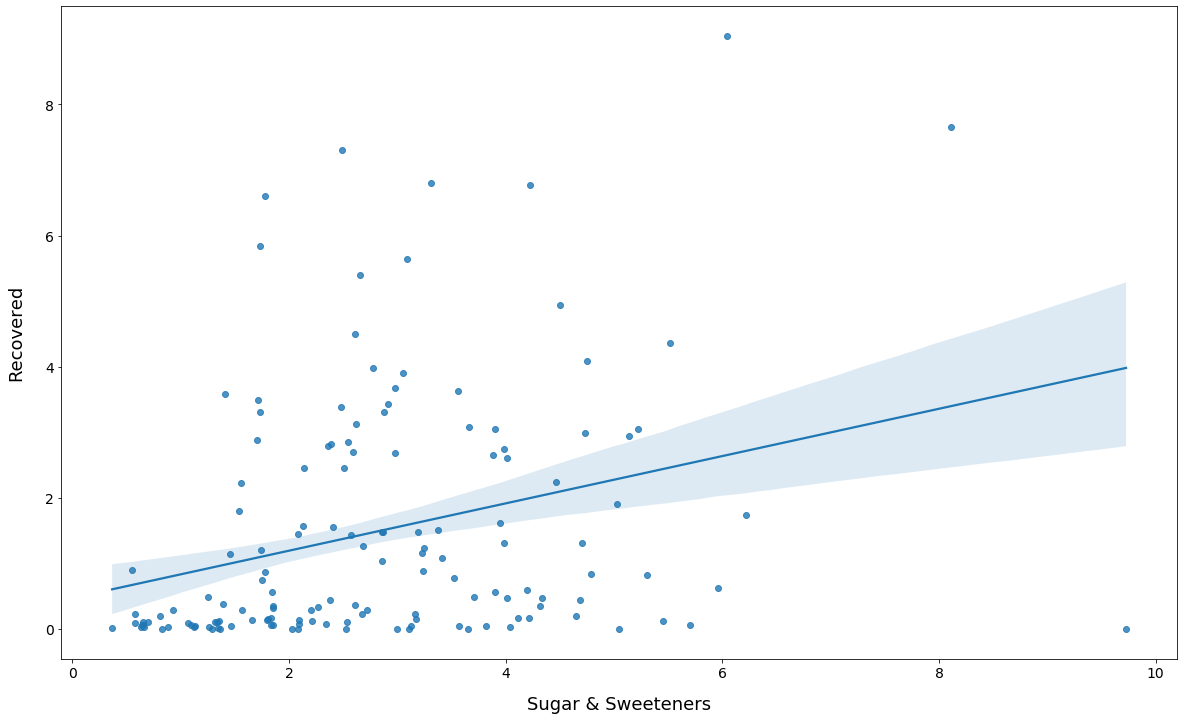

In [251]:
sns.regplot(x = "Sugar & Sweeteners", y = "Recovered", data = country_food_supply,truncate=True,ci=80);
plt.xlabel("Sugar & Sweeteners",labelpad = 15)
plt.ylabel("Recovered",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(20,12)

plt.rc("font", size = 14)
plt.rc("axes", labelsize = 18)

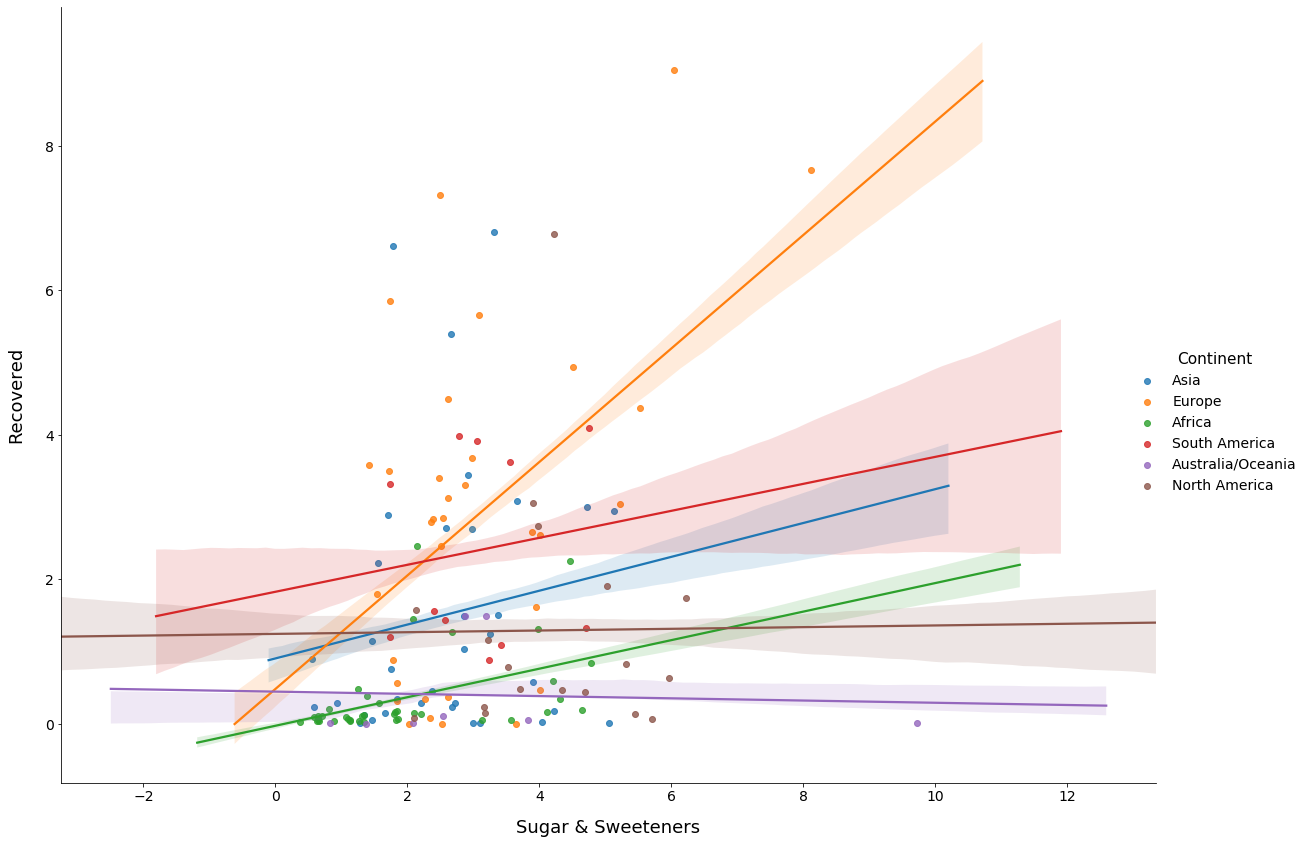

In [252]:
sns.lmplot(x = "Sugar & Sweeteners", y = "Recovered", data = country_food_supply,hue = "Continent",aspect=2,height=10,ci = 30,fit_reg=True);
plt.xlabel("Sugar & Sweeteners",labelpad = 15)
plt.ylabel("Recovered",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(18,12)

plt.rc("font", size = 14)
plt.rc("axes", labelsize = 18)


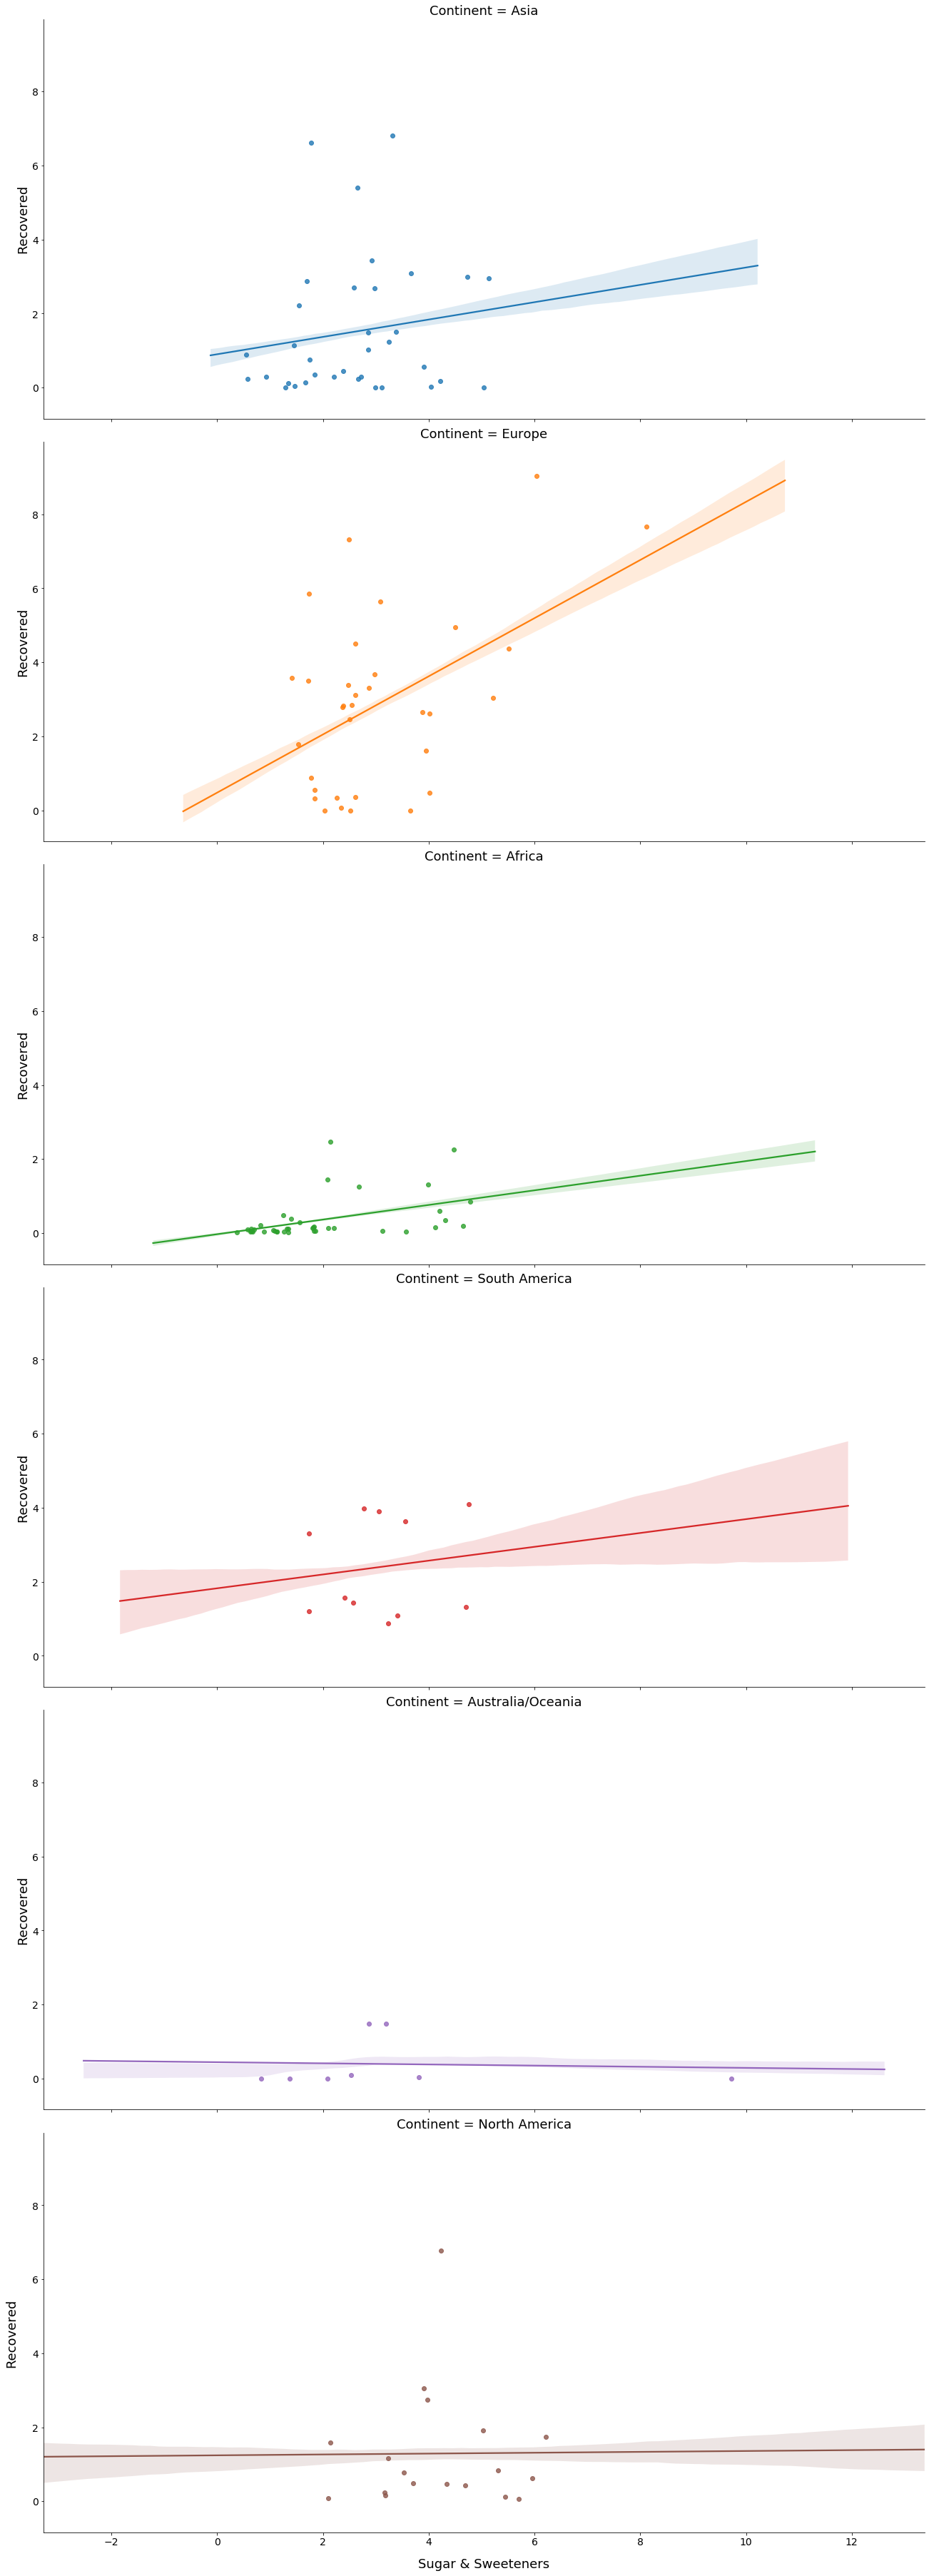

In [253]:
sns.lmplot(x = "Sugar & Sweeteners", y = "Recovered", data = country_food_supply,hue = "Continent",aspect=2,height=10,ci = 30,fit_reg=True,row="Continent");
plt.xlabel("Sugar & Sweeteners",labelpad = 15)
plt.ylabel("Recovered",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(18,50)

plt.rc("font", size = 14)
plt.rc("axes", labelsize = 18)

##          

## Percentage of Energy Intake (kcal) from Sugar & Sweeteners

##    

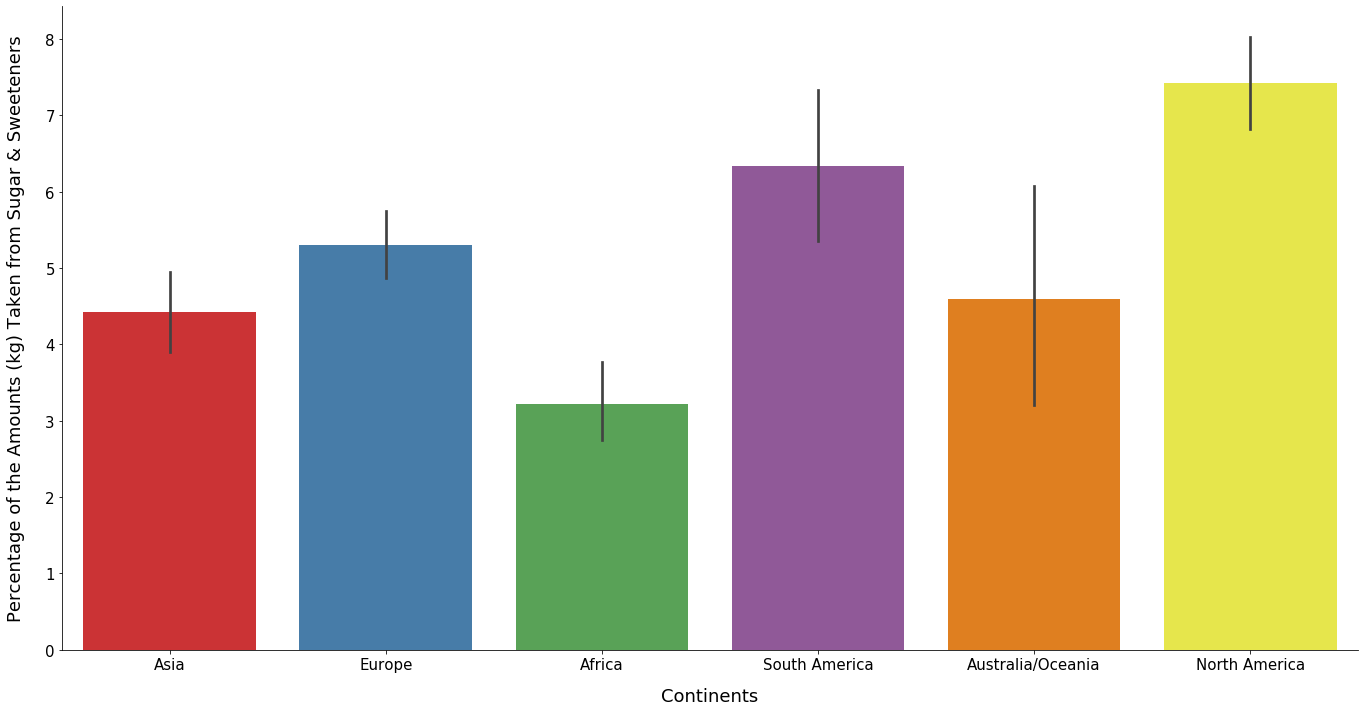

In [33]:
# Energy Intake Dataset

sns.catplot(x = "Continent", y = "Sugar & Sweeteners", data = country_kcal_supply, height=10,kind = "bar",palette="Set1");
plt.xlabel("Continents",labelpad = 15)
plt.ylabel("Percentage of the Amounts (kg) Taken from Sugar & Sweeteners",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(20,10)

plt.rc("font", size = 15)
plt.rc("axes", labelsize = 18)


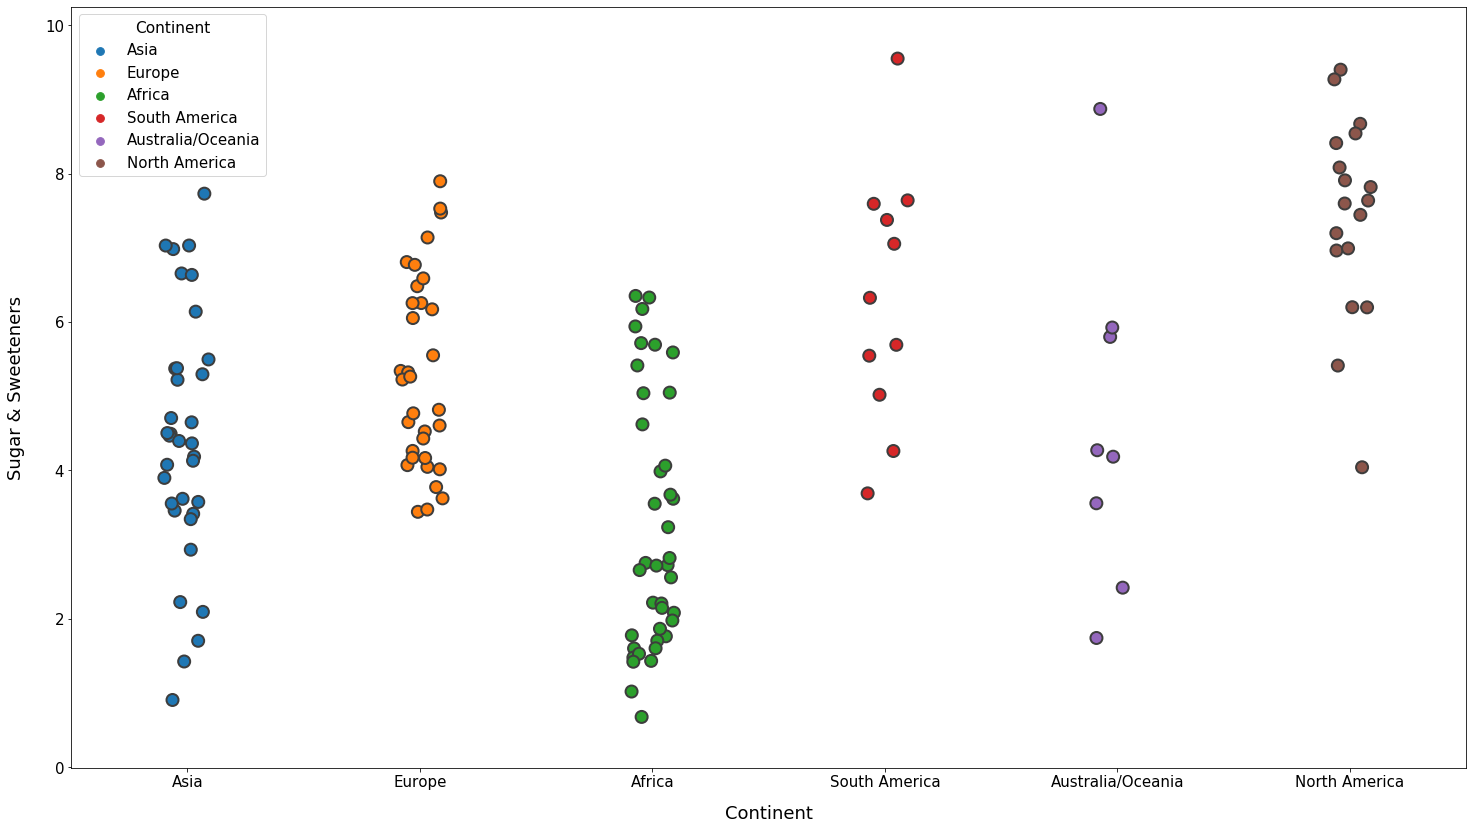

In [34]:
# Energy Intake Dataset

sns.stripplot(x = "Continent", y = "Sugar & Sweeteners", data = country_kcal_supply,hue = "Continent",s = 12,linewidth=2);
plt.xlabel("Continent",labelpad = 15)
plt.ylabel("Sugar & Sweeteners",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(25,14)

plt.rc("font", size = 15)
plt.rc("axes", labelsize = 20)


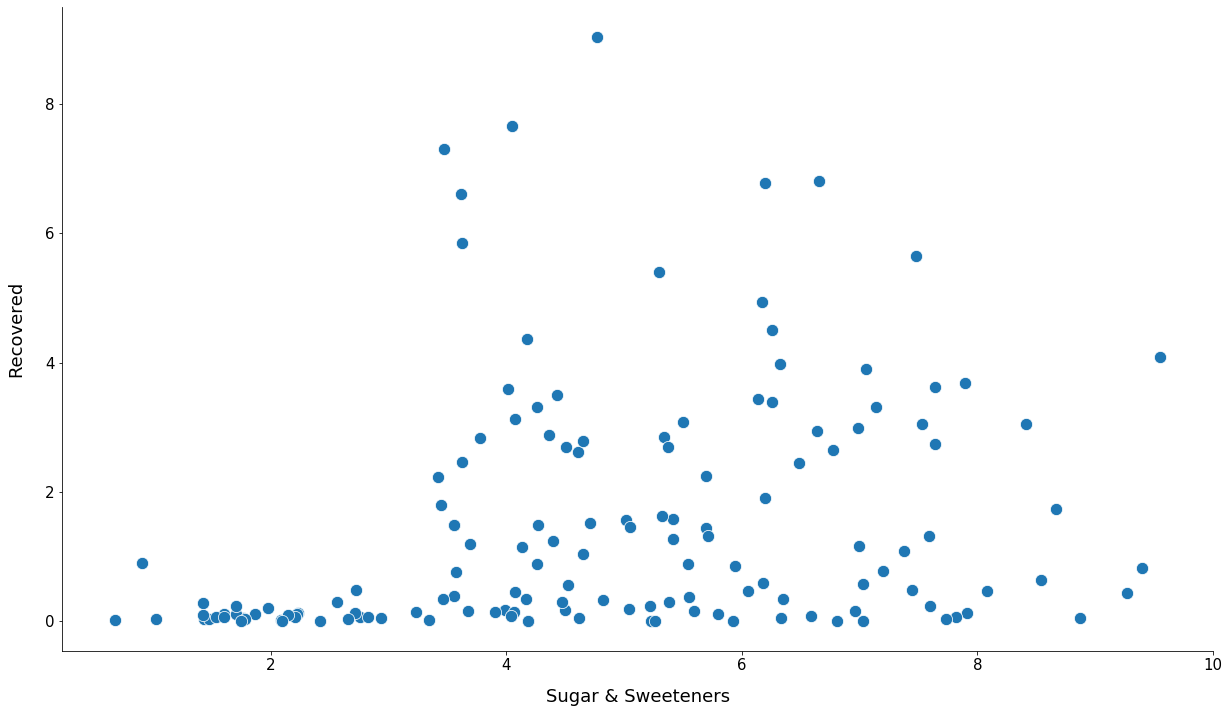

In [36]:
# Energy Intake Dataset

sns.relplot(x = "Sugar & Sweeteners", y = "Recovered", data = country_kcal_supply, height=10,kind = "scatter",s = 150);
plt.xlabel("Sugar & Sweeteners",labelpad = 15)
plt.ylabel("Recovered",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(18,10)

plt.rc("font", size = 14)
plt.rc("axes", labelsize = 18)

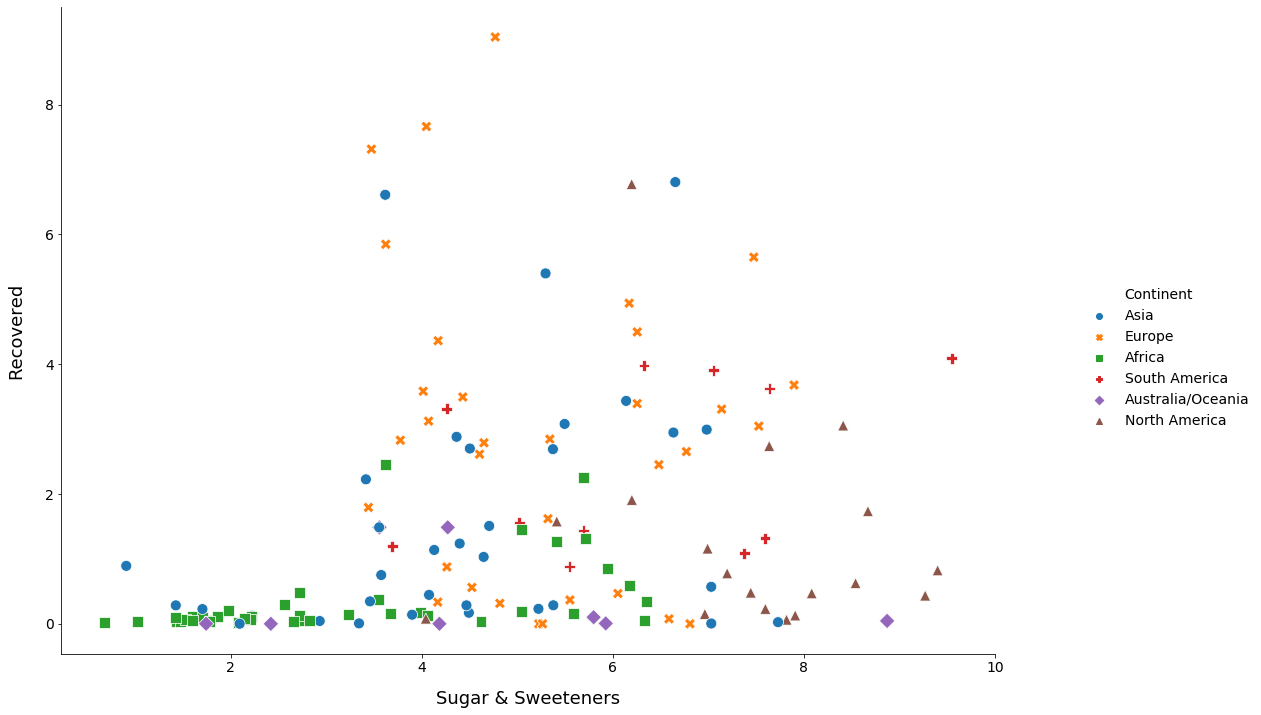

In [37]:
# Energy Intake Dataset

sns.relplot(x = "Sugar & Sweeteners", y = "Recovered", data = country_kcal_supply, height=10,kind = "scatter",hue="Continent", s = 120,style="Continent");
plt.xlabel("Sugar & Sweeteners",labelpad = 15)
plt.ylabel("Recovered",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(18,10)

plt.rc("font", size = 14)
plt.rc("axes", labelsize = 18)

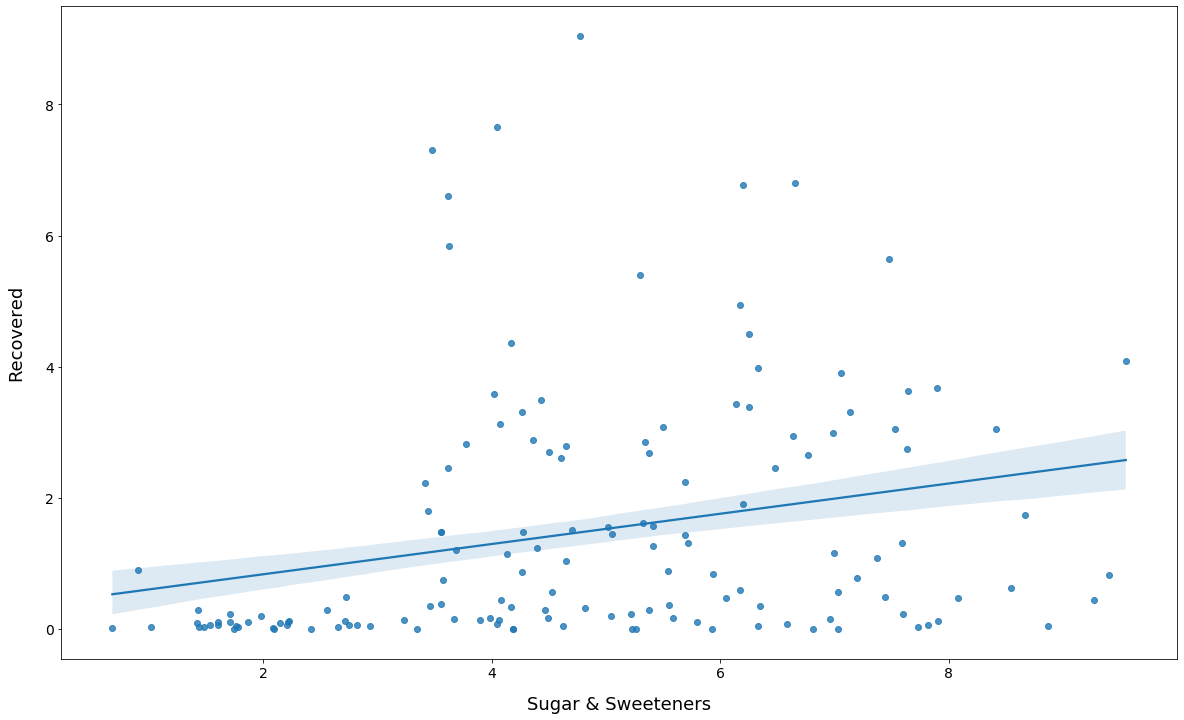

In [38]:
# Energy Intake Dataset

sns.regplot(x = "Sugar & Sweeteners", y = "Recovered", data = country_kcal_supply,truncate=True,ci=80);
plt.xlabel("Sugar & Sweeteners",labelpad = 15)
plt.ylabel("Recovered",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(20,12)

plt.rc("font", size = 14)
plt.rc("axes", labelsize = 18)

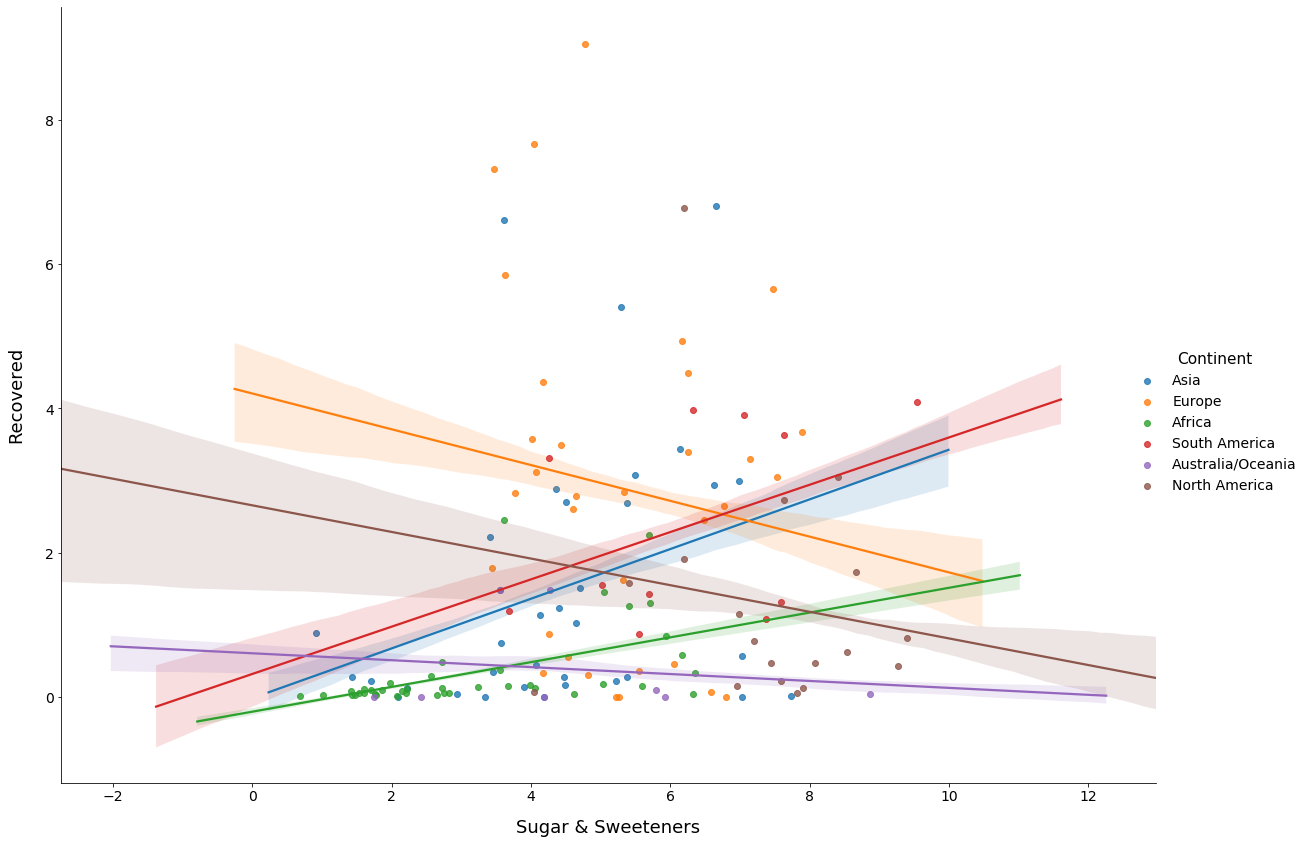

In [41]:
# Energy Intake Dataset

sns.lmplot(x = "Sugar & Sweeteners", y = "Recovered", data = country_kcal_supply,hue = "Continent",aspect=2,height=10,ci = 30,fit_reg=True);
plt.xlabel("Sugar & Sweeteners",labelpad = 15)
plt.ylabel("Recovered",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(18,12)

plt.rc("font", size = 14)
plt.rc("axes", labelsize = 18)


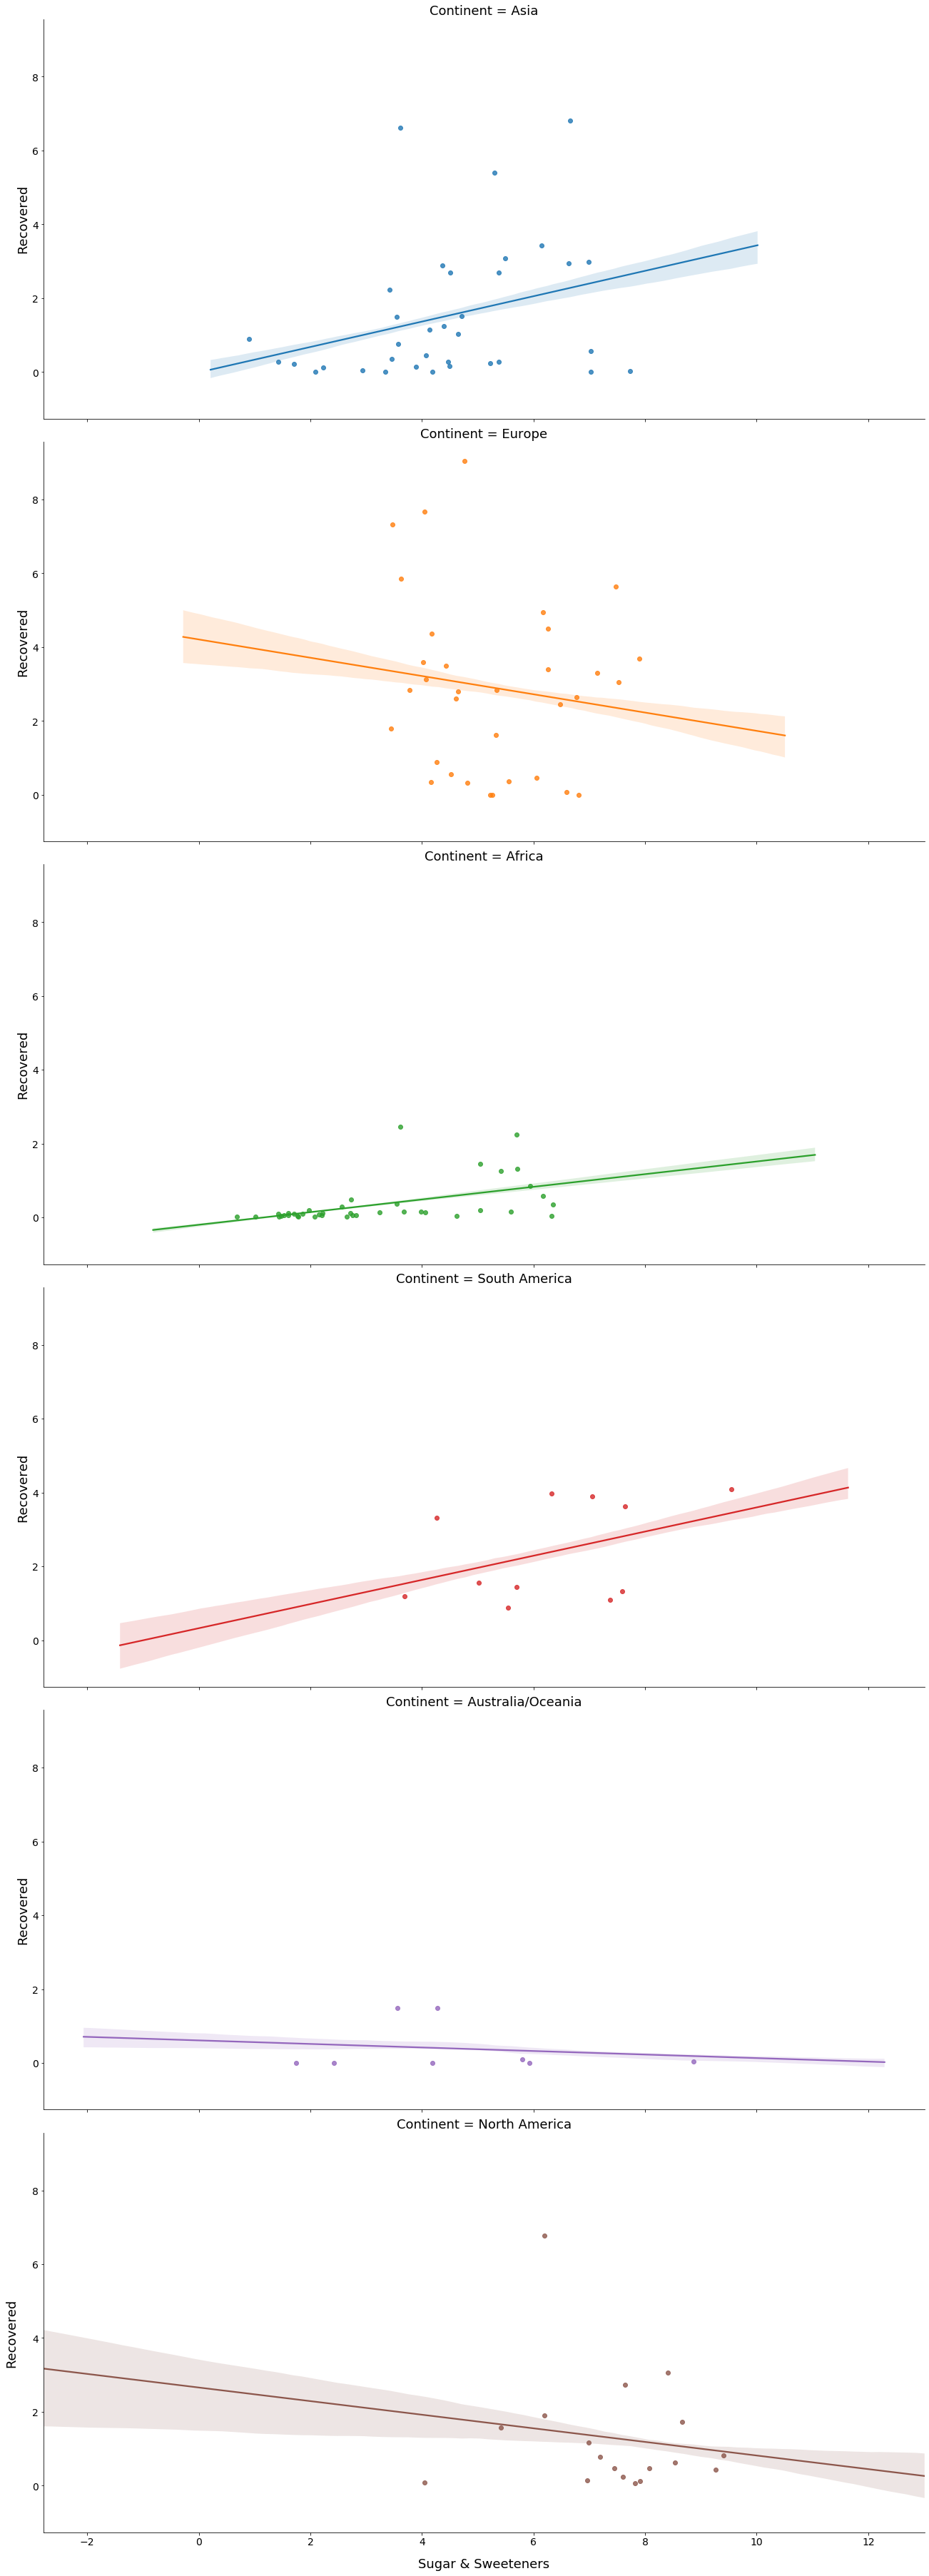

In [42]:
# Energy Intake Dataset

sns.lmplot(x = "Sugar & Sweeteners", y = "Recovered", data = country_kcal_supply,hue = "Continent",aspect=2,height=10,ci = 30,fit_reg=True,row="Continent");
plt.xlabel("Sugar & Sweeteners",labelpad = 15)
plt.ylabel("Recovered",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(18,50)

plt.rc("font", size = 14)
plt.rc("axes", labelsize = 18)

##             

## ----------------------------------------------- Cereals - Excluding Beer -----------------------------------------------

##           

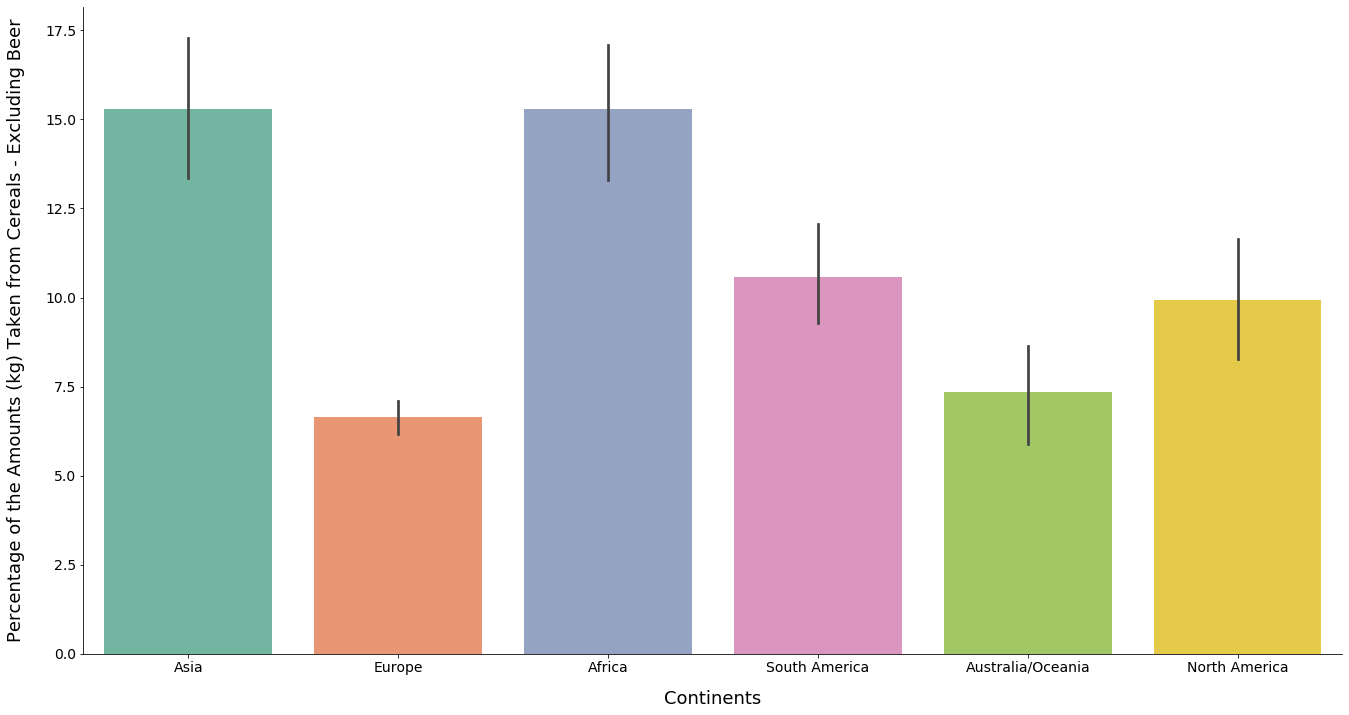

In [38]:

sns.catplot(x = "Continent", y = "Cereals - Excluding Beer", data = country_food_supply, height=10,kind = "bar",palette="Set2");
plt.xlabel("Continents",labelpad = 15)
plt.ylabel("Percentage of the Amounts (kg) Taken from Cereals - Excluding Beer",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(20,10)

plt.rc("font", size = 14)
plt.rc("axes", labelsize = 18)


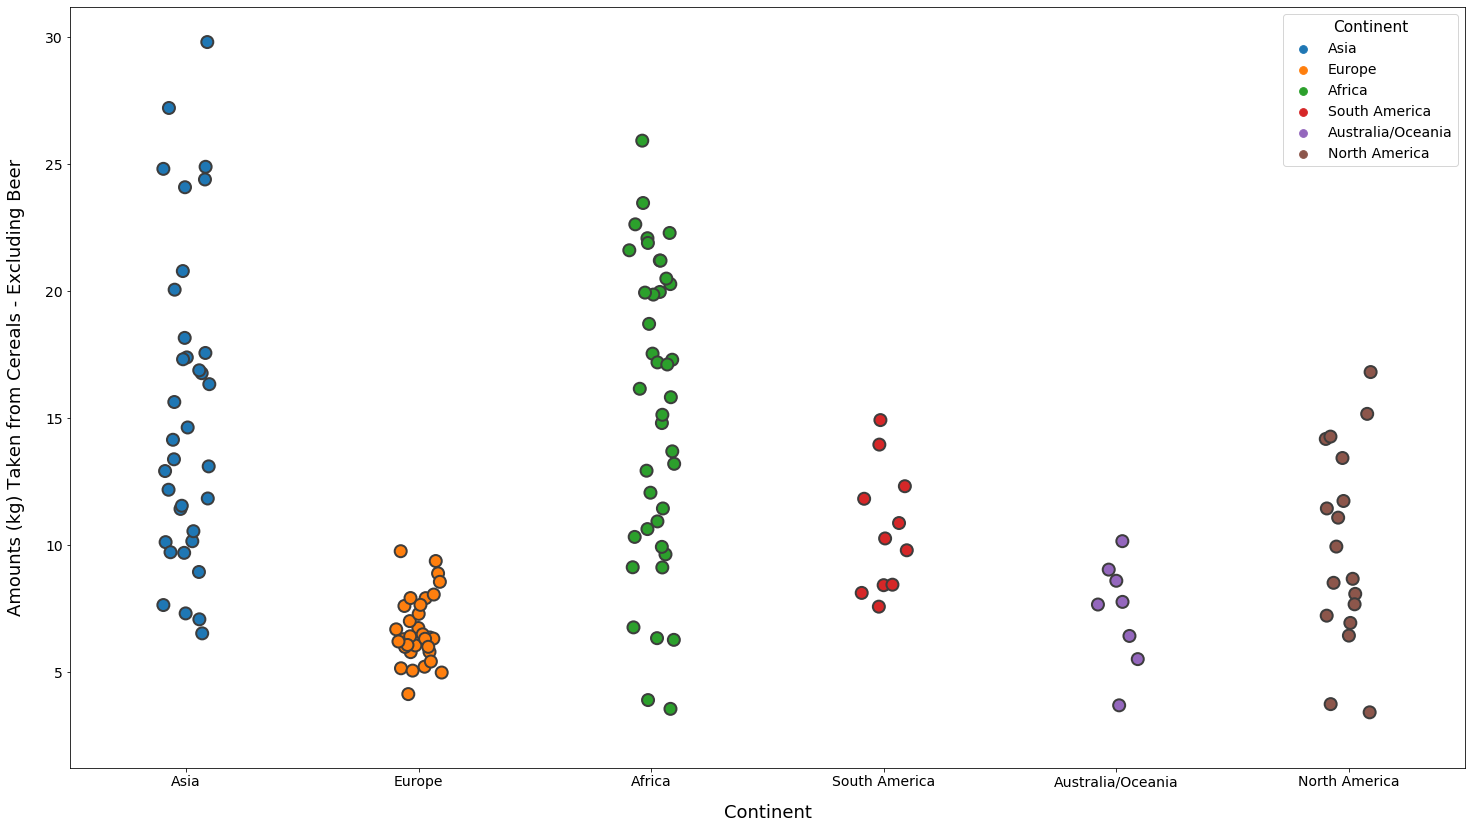

In [32]:
sns.stripplot(x = "Continent", y = "Cereals - Excluding Beer", data = country_food_supply,hue = "Continent",s = 12,linewidth=2);
plt.xlabel("Continent",labelpad = 15)
plt.ylabel("Amounts (kg) Taken from Cereals - Excluding Beer",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(25,14)

plt.rc("font", size = 15)
plt.rc("axes", labelsize = 20)


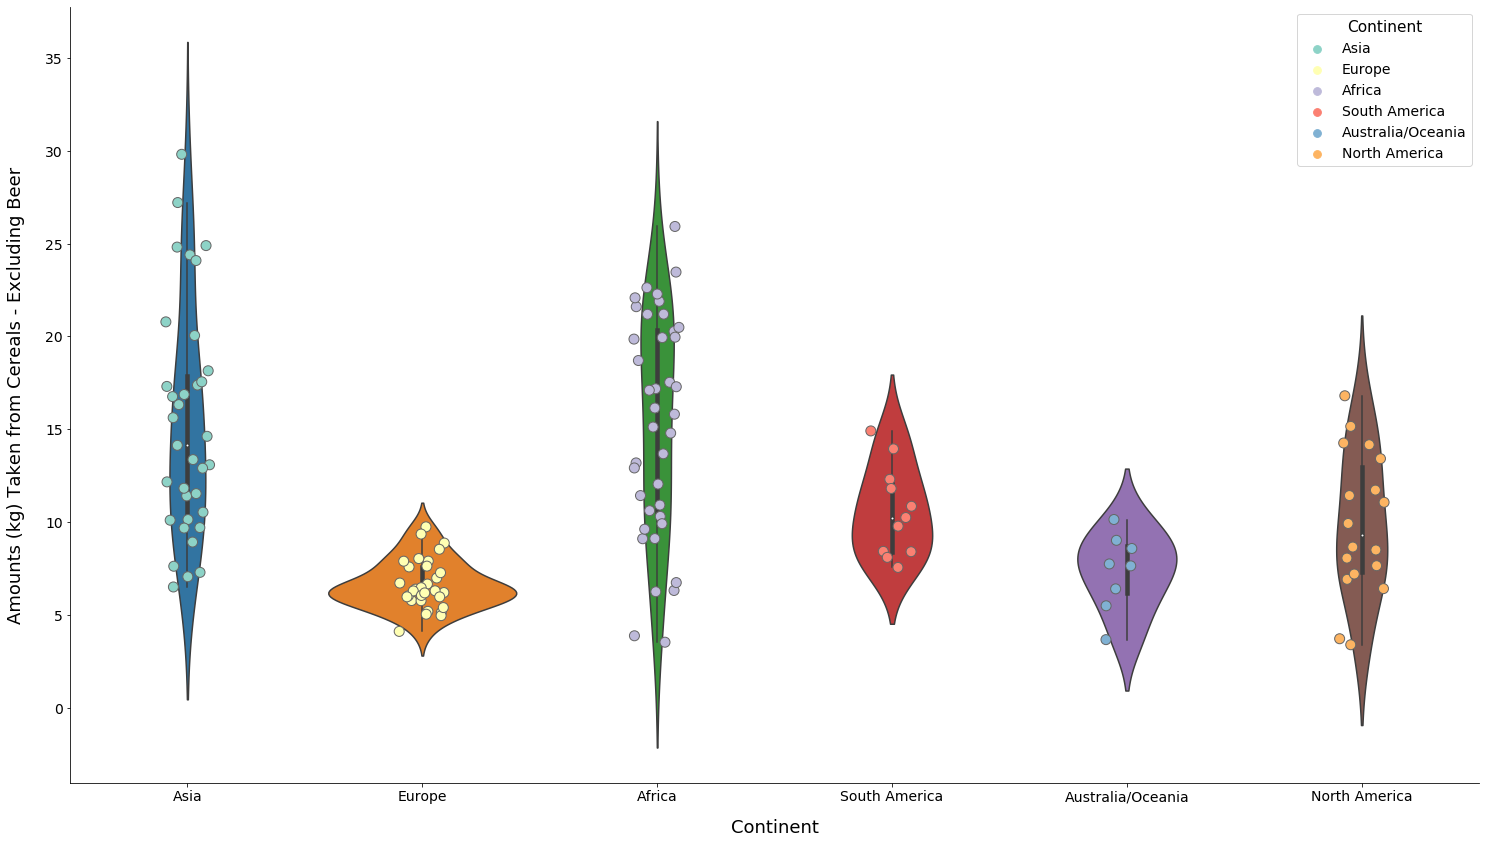

In [43]:
sns.catplot(x = "Continent", y = "Cereals - Excluding Beer", data = country_food_supply,aspect=5,height=10,kind="violin");
sns.stripplot(x = "Continent", y = "Cereals - Excluding Beer", data = country_food_supply,hue = "Continent",s = 10,palette="Set3",linewidth=1);

plt.xlabel("Continent",labelpad = 15)
plt.ylabel("Amounts (kg) Taken from Cereals - Excluding Beer",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(20,12)

plt.rc("font", size = 15)
plt.rc("axes", labelsize = 20)


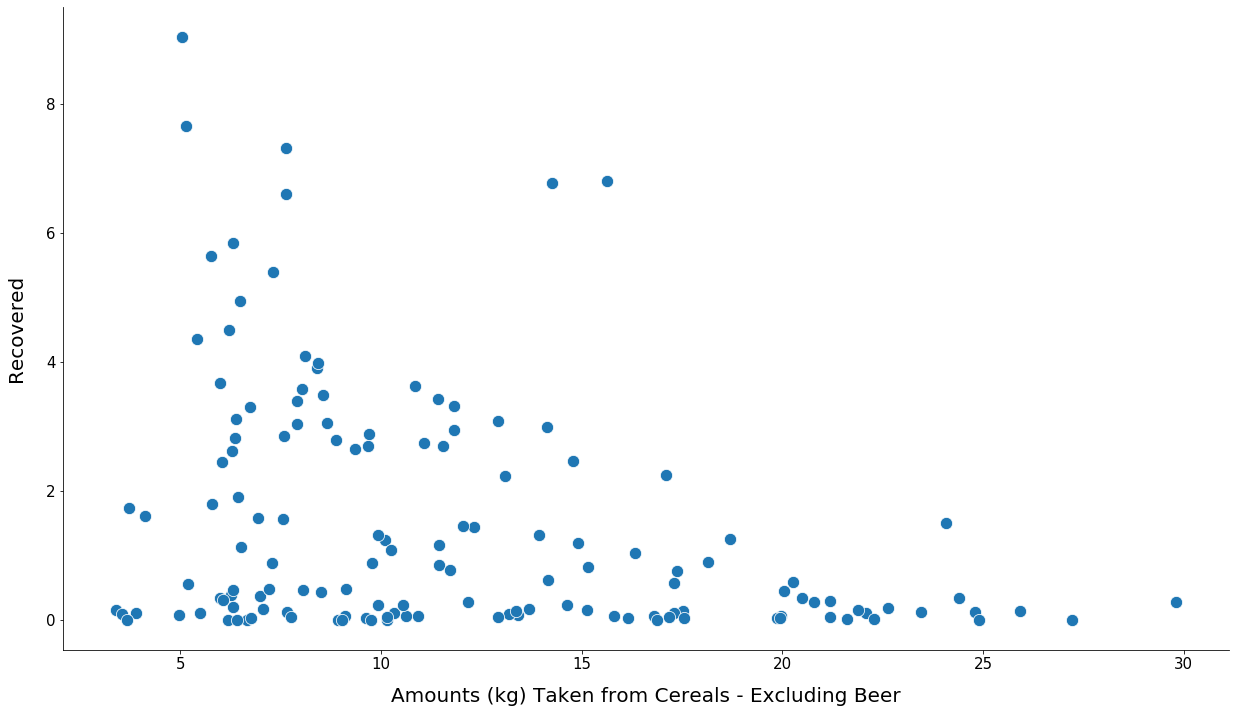

In [44]:
sns.relplot(x = "Cereals - Excluding Beer", y = "Recovered", data = country_food_supply, height=10,kind = "scatter",s = 150);
plt.xlabel("Amounts (kg) Taken from Cereals - Excluding Beer",labelpad = 15)
plt.ylabel("Recovered",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(18,10)

plt.rc("font", size = 14)
plt.rc("axes", labelsize = 18)

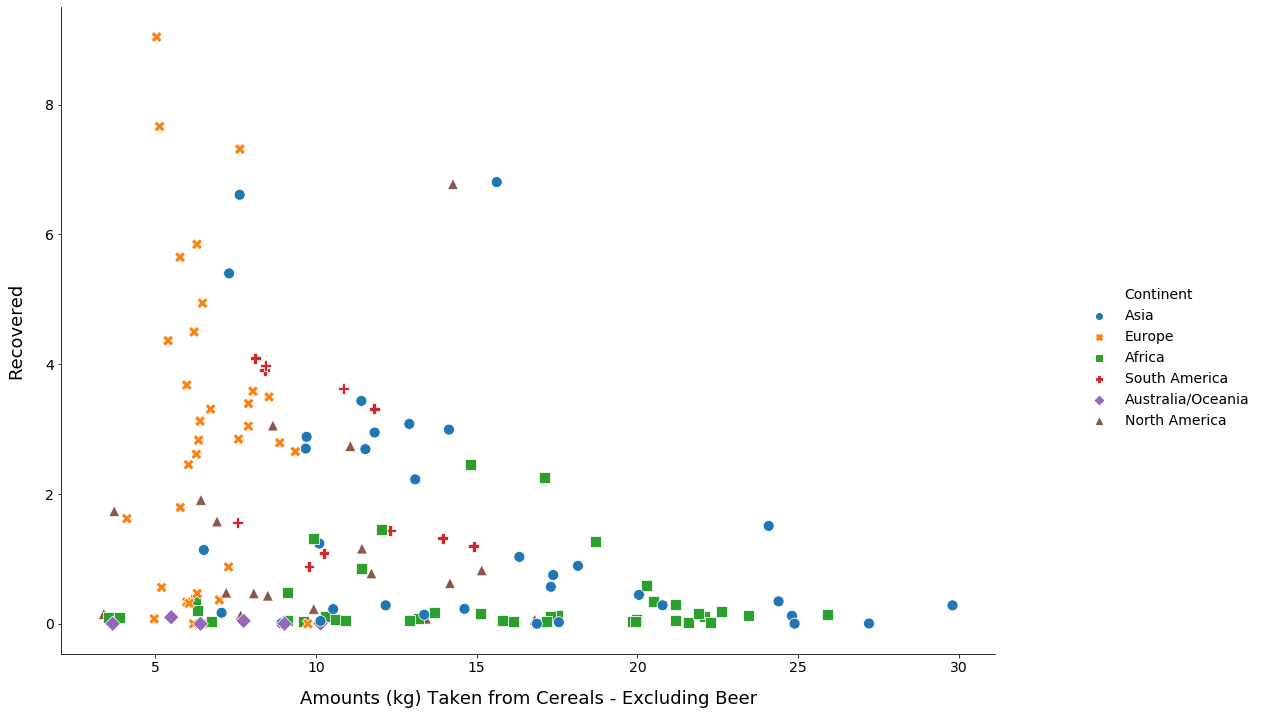

In [45]:
sns.relplot(x = "Cereals - Excluding Beer", y = "Recovered", data = country_food_supply, height=10,kind = "scatter",hue="Continent", s = 120,style="Continent");
plt.xlabel("Amounts (kg) Taken from Cereals - Excluding Beer",labelpad = 15)
plt.ylabel("Recovered",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(18,10)

plt.rc("font", size = 14)
plt.rc("axes", labelsize = 18)

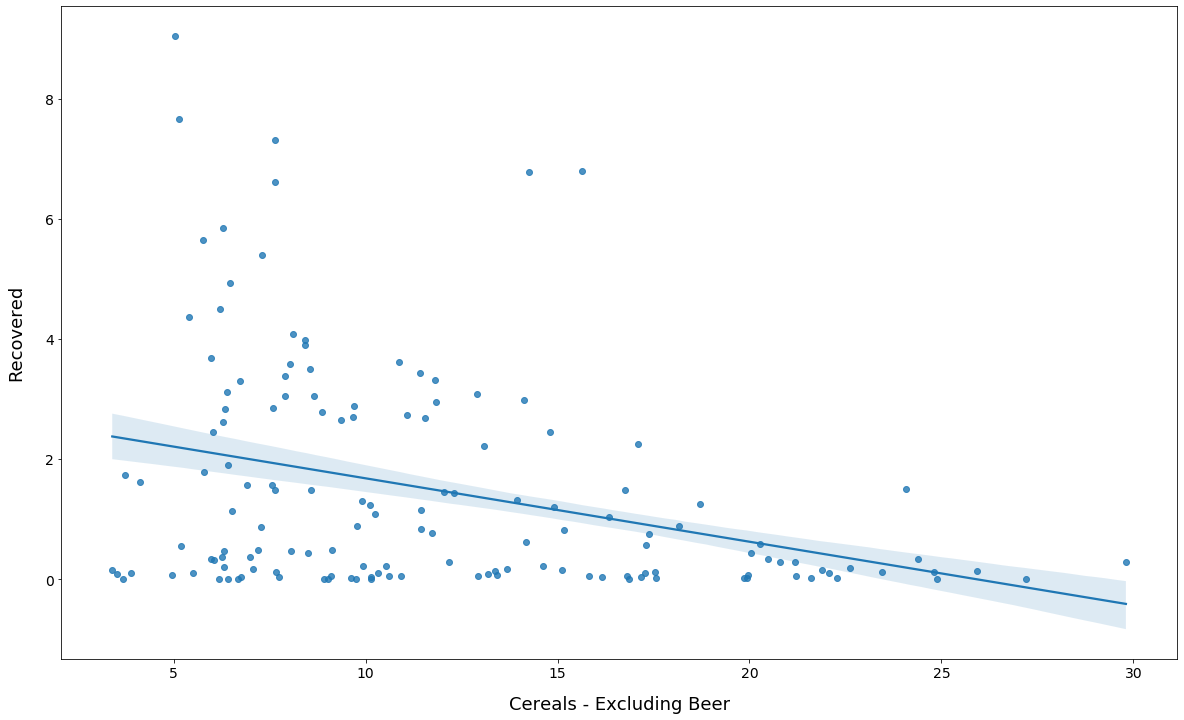

In [51]:
sns.regplot(x = "Cereals - Excluding Beer", y = "Recovered", data = country_food_supply,truncate=True,ci=80);
plt.xlabel("Cereals - Excluding Beer",labelpad = 15)
plt.ylabel("Recovered",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(20,12)

plt.rc("font", size = 14)
plt.rc("axes", labelsize = 18)

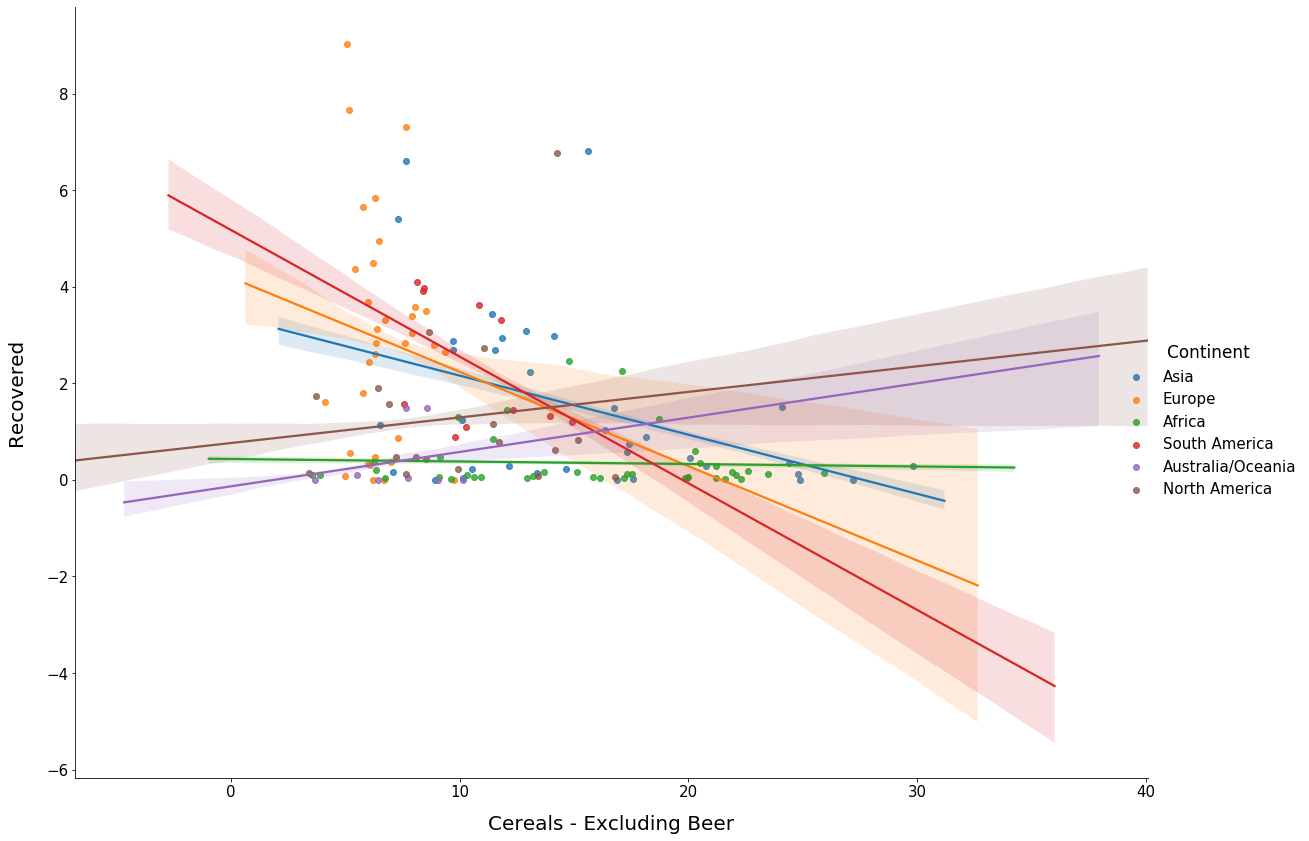

In [54]:
sns.lmplot(x = "Cereals - Excluding Beer", y = "Recovered", data = country_food_supply,hue = "Continent",aspect=2,height=10,ci = 30,fit_reg=True);
plt.xlabel("Cereals - Excluding Beer",labelpad = 15)
plt.ylabel("Recovered",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(18,12)

plt.rc("font", size = 15)
plt.rc("axes", labelsize = 20)


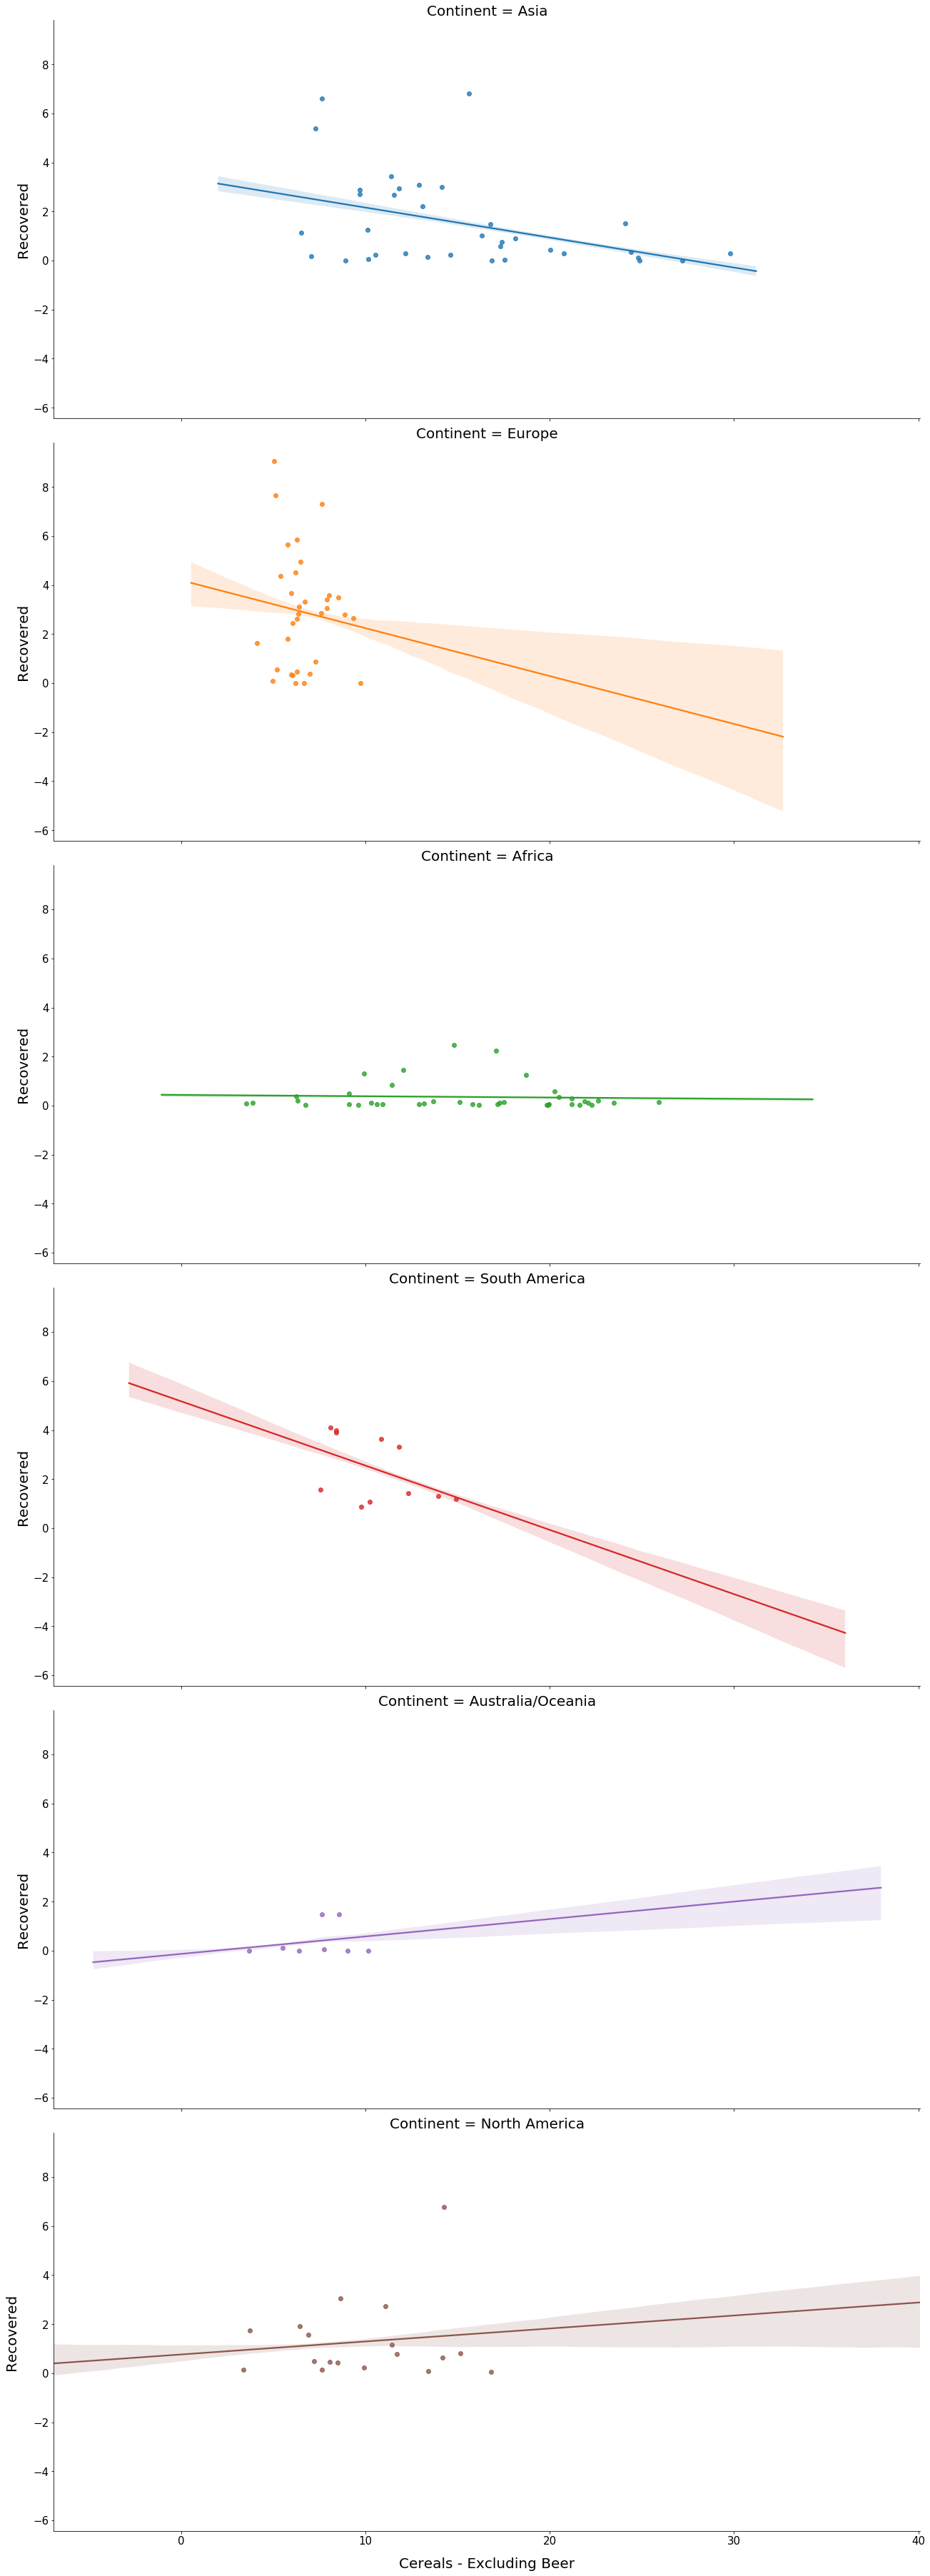

In [55]:
sns.lmplot(x = "Cereals - Excluding Beer", y = "Recovered", data = country_food_supply,hue = "Continent",aspect=2,height=10,ci = 30,fit_reg=True,row="Continent");
plt.xlabel("Cereals - Excluding Beer",labelpad = 15)
plt.ylabel("Recovered",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(18,50)

plt.rc("font", size = 14)
plt.rc("axes", labelsize = 18)

##          

## Percentage of Energy Intake (kcal) from Cereals - Excluding Beer

##    

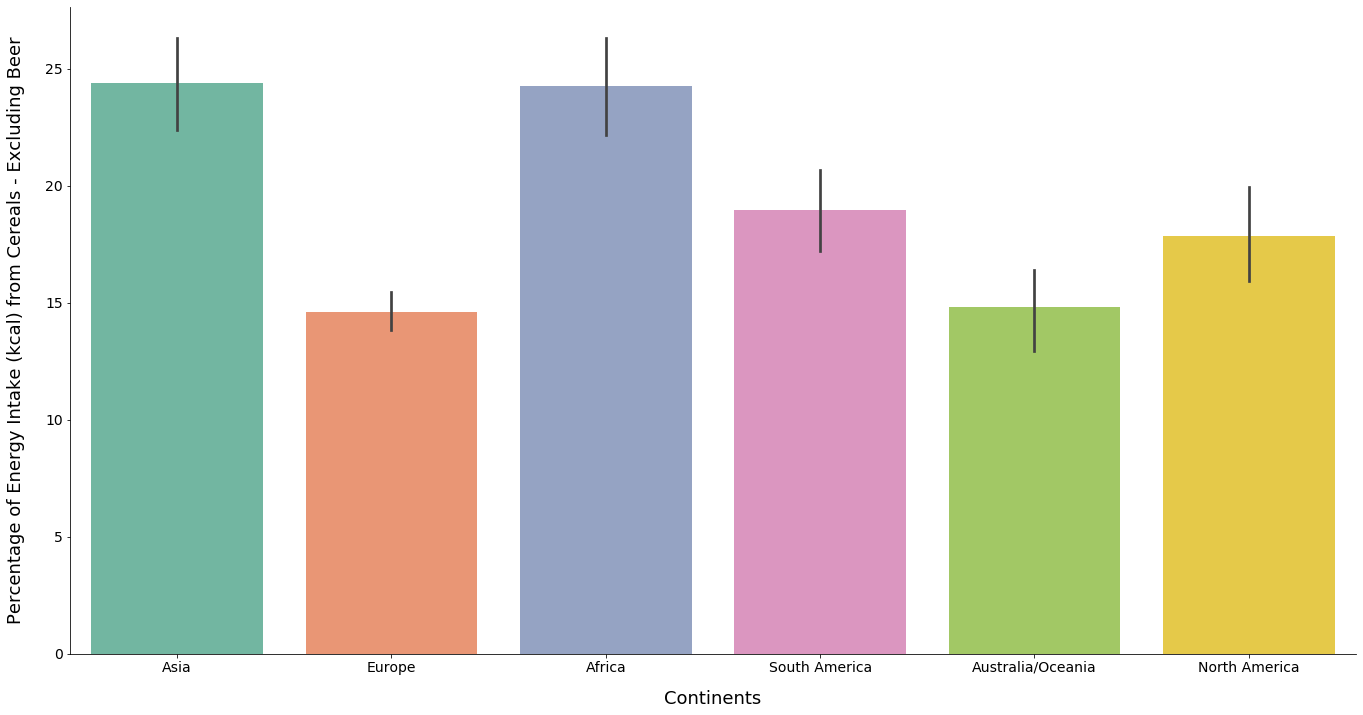

In [56]:
# Energy Intake Dataset

sns.catplot(x = "Continent", y = "Cereals - Excluding Beer", data = country_kcal_supply, height=10,kind = "bar",palette="Set2");
plt.xlabel("Continents",labelpad = 15)
plt.ylabel("Percentage of Energy Intake (kcal) from Cereals - Excluding Beer",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(20,10)

plt.rc("font", size = 14)
plt.rc("axes", labelsize = 18)


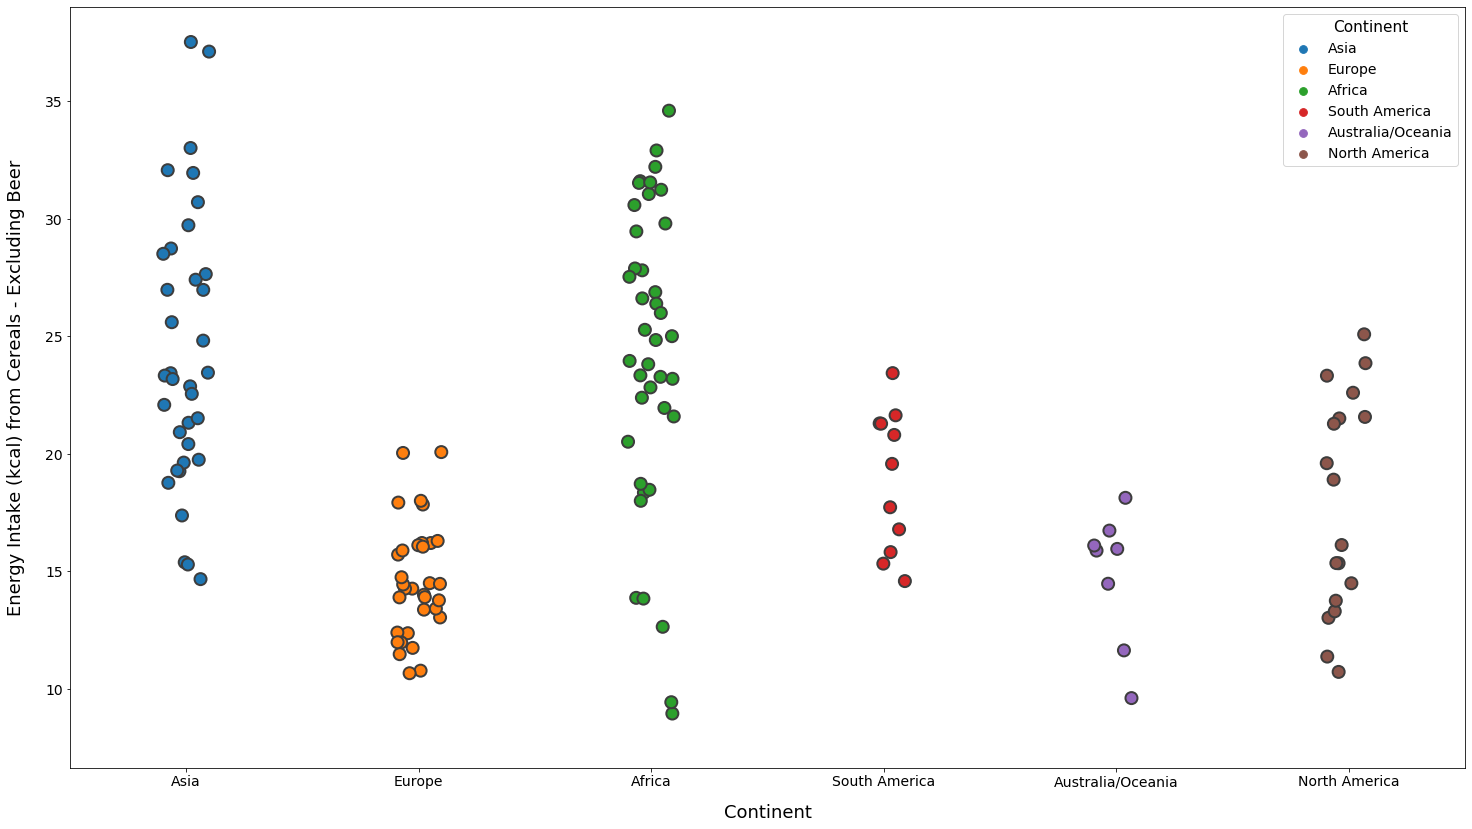

In [64]:
# Energy Intake Dataset

sns.stripplot(x = "Continent", y = "Cereals - Excluding Beer", data = country_kcal_supply,hue = "Continent",s = 12,linewidth=2);
plt.xlabel("Continent",labelpad = 15)
plt.ylabel("Energy Intake (kcal) from Cereals - Excluding Beer",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(25,14)

plt.rc("font", size = 15)
plt.rc("axes", labelsize = 20)


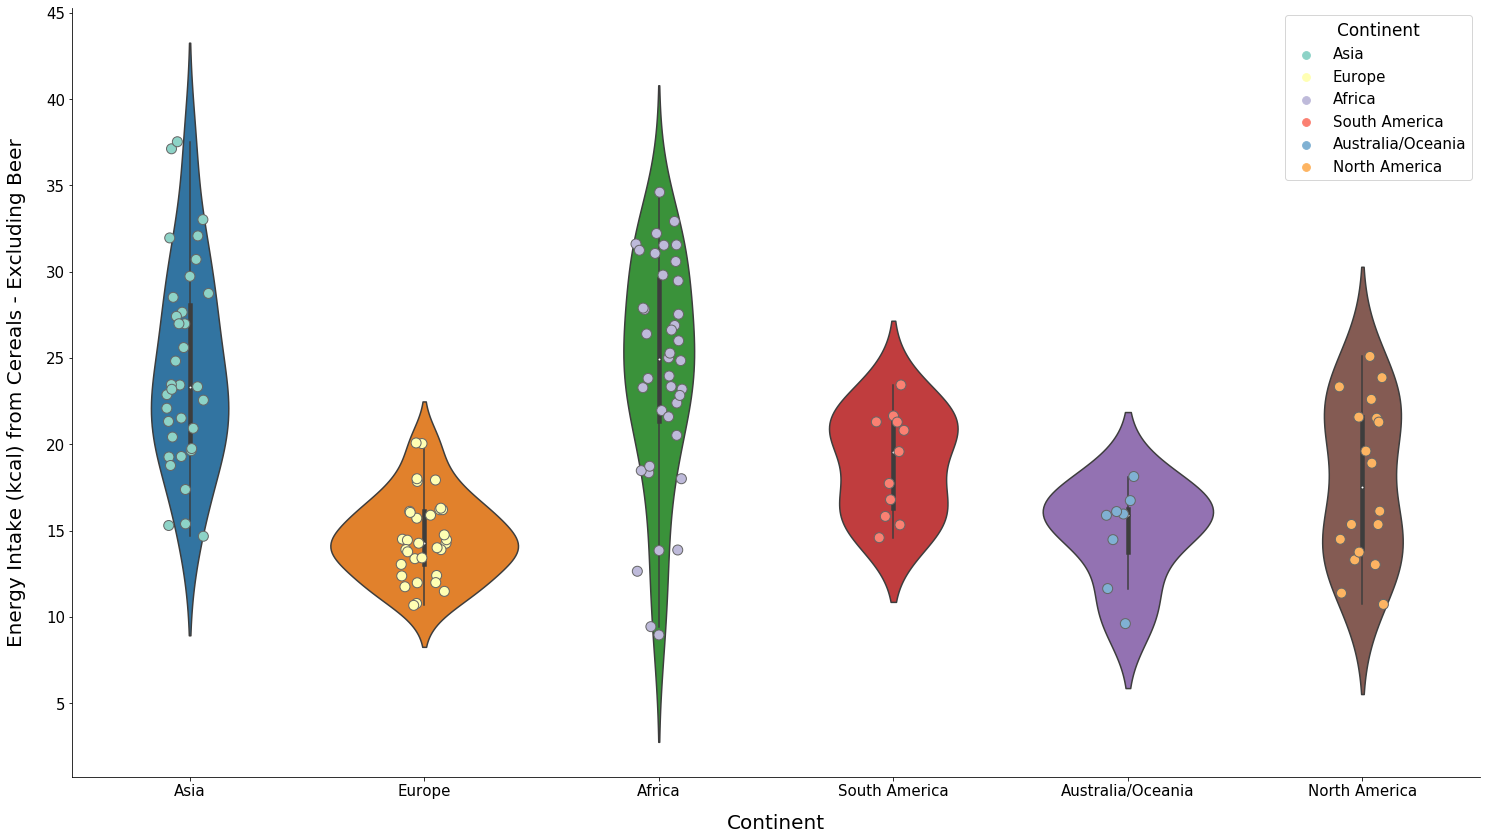

In [65]:
# Energy Intake Dataset

sns.catplot(x = "Continent", y = "Cereals - Excluding Beer", data = country_kcal_supply,aspect=5,height=10,kind="violin");
sns.stripplot(x = "Continent", y = "Cereals - Excluding Beer", data = country_kcal_supply,hue = "Continent",s = 10,palette="Set3",linewidth=1);

plt.xlabel("Continent",labelpad = 15)
plt.ylabel("Energy Intake (kcal) from Cereals - Excluding Beer",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(20,12)

plt.rc("font", size = 15)
plt.rc("axes", labelsize = 20)


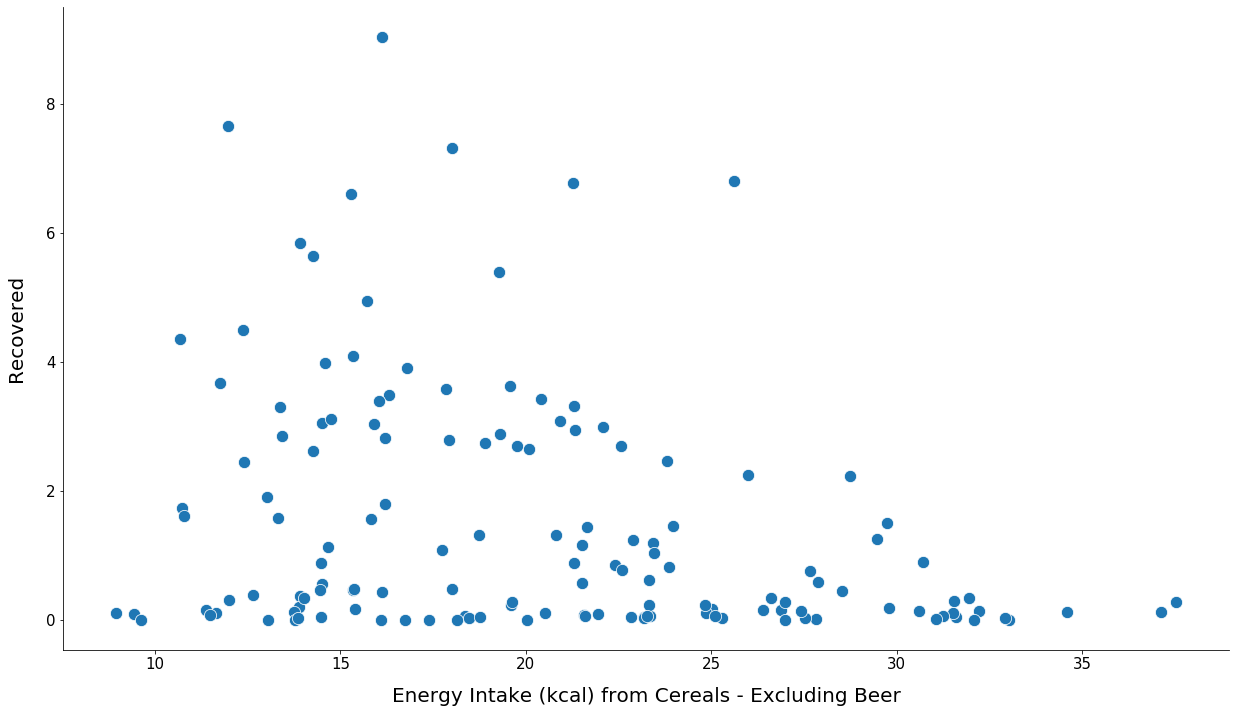

In [66]:
# Energy Intake Dataset

sns.relplot(x = "Cereals - Excluding Beer", y = "Recovered", data = country_kcal_supply, height=10,kind = "scatter",s = 150);
plt.xlabel("Energy Intake (kcal) from Cereals - Excluding Beer",labelpad = 15)
plt.ylabel("Recovered",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(18,10)

plt.rc("font", size = 14)
plt.rc("axes", labelsize = 18)

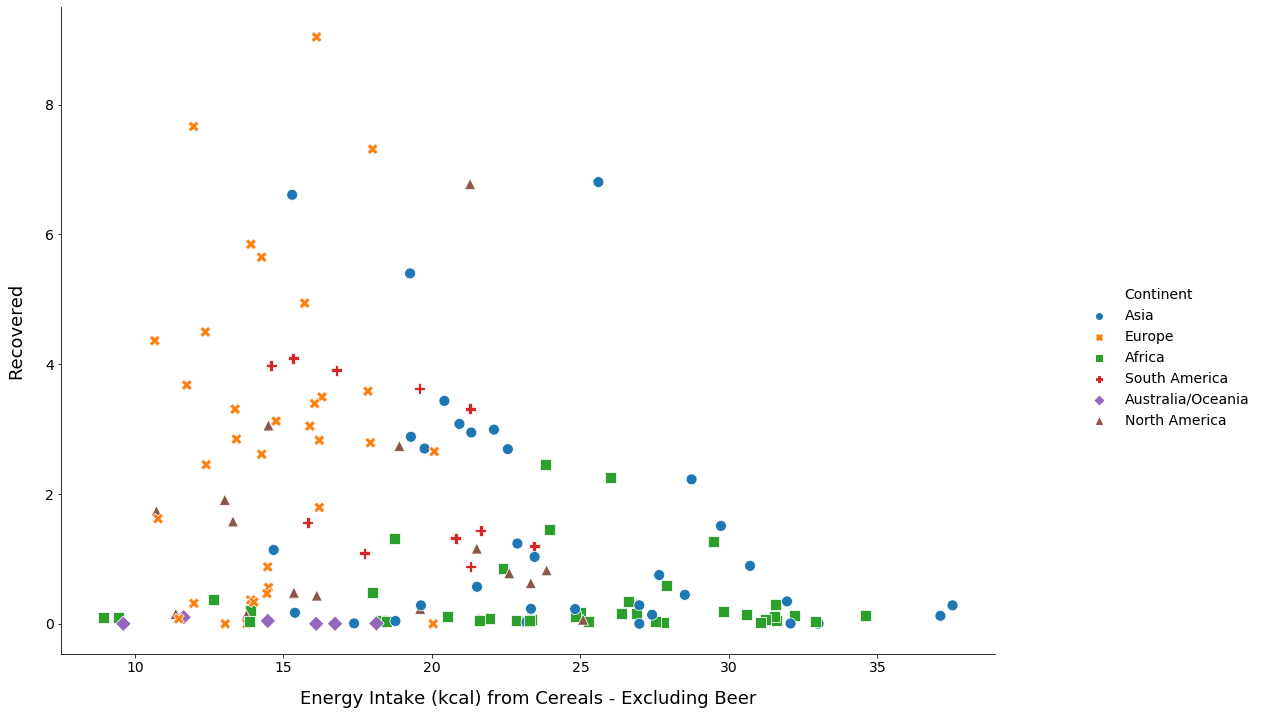

In [67]:
# Energy Intake Dataset

sns.relplot(x = "Cereals - Excluding Beer", y = "Recovered", data = country_kcal_supply, height=10,kind = "scatter",hue="Continent", s = 120,style="Continent");
plt.xlabel("Energy Intake (kcal) from Cereals - Excluding Beer",labelpad = 15)
plt.ylabel("Recovered",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(18,10)

plt.rc("font", size = 14)
plt.rc("axes", labelsize = 18)

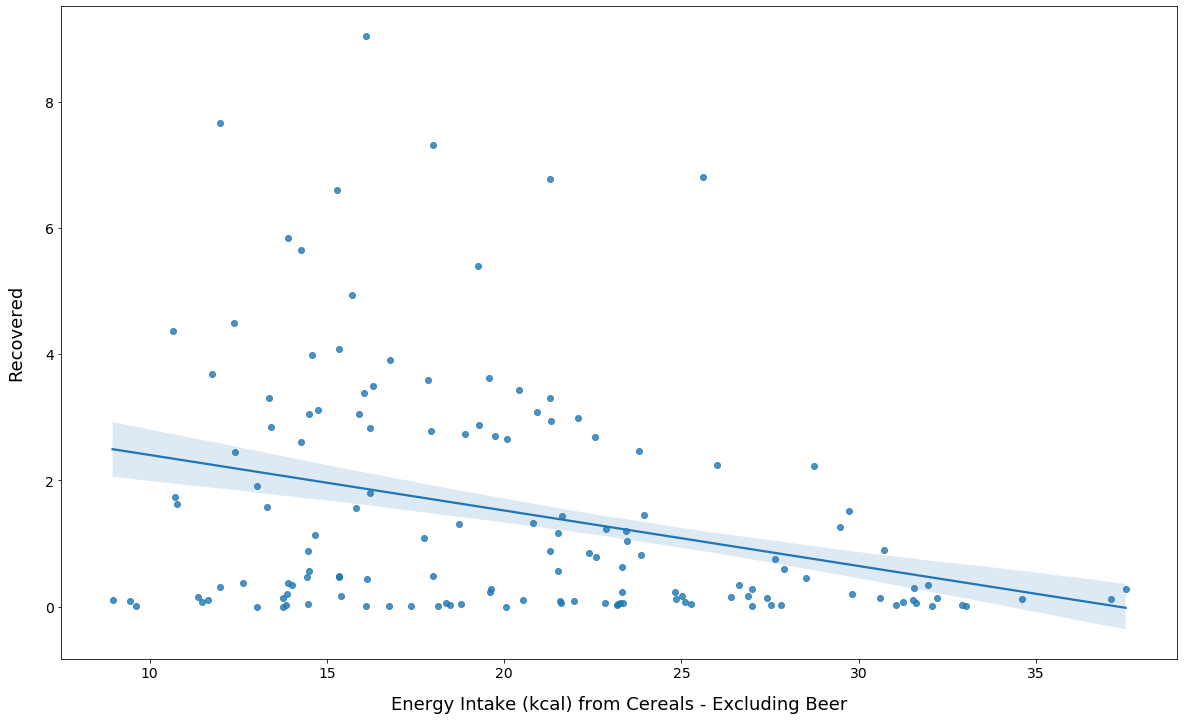

In [68]:
# Energy Intake Dataset

sns.regplot(x = "Cereals - Excluding Beer", y = "Recovered", data = country_kcal_supply,truncate=True,ci=80);
plt.xlabel("Energy Intake (kcal) from Cereals - Excluding Beer",labelpad = 15)
plt.ylabel("Recovered",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(20,12)

plt.rc("font", size = 14)
plt.rc("axes", labelsize = 18)

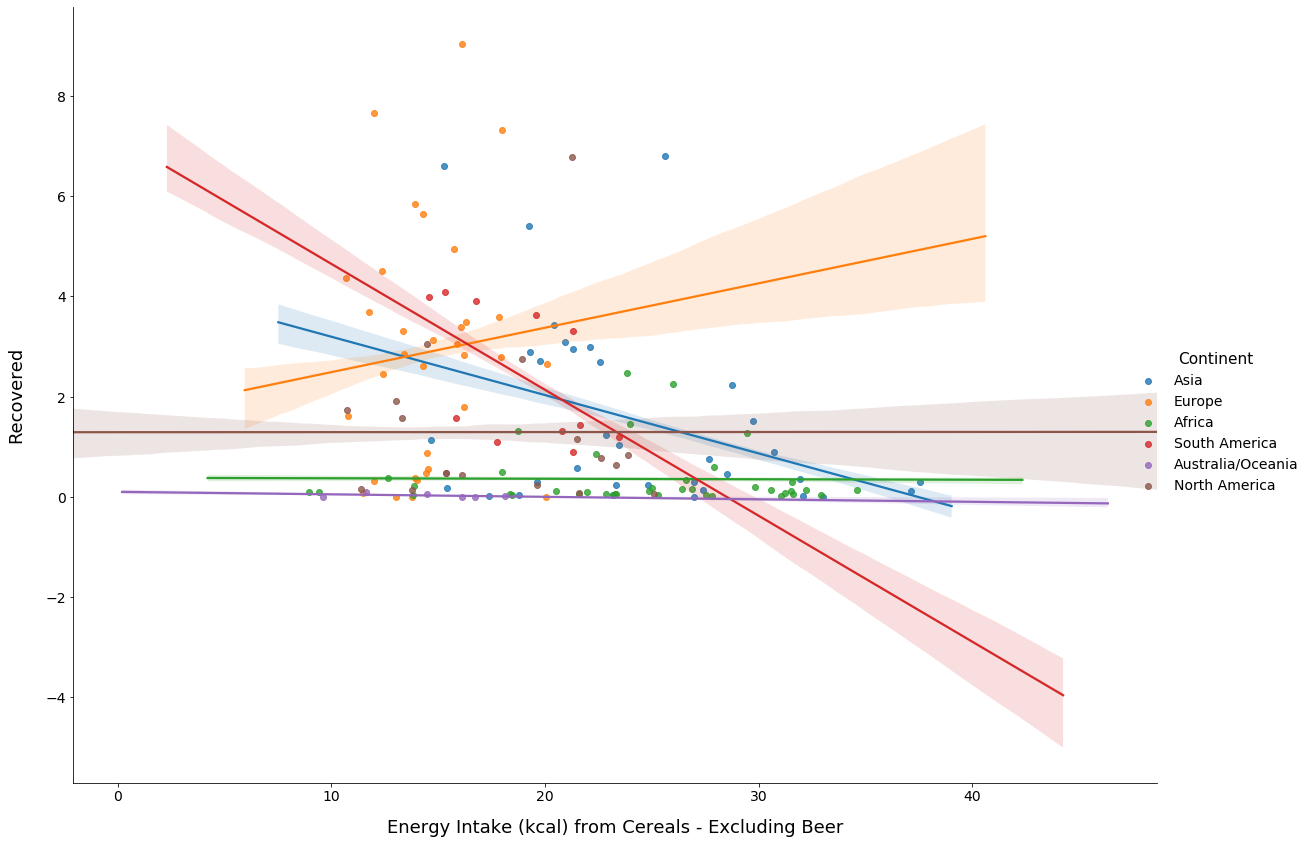

In [69]:
# Energy Intake Dataset

sns.lmplot(x = "Cereals - Excluding Beer", y = "Recovered", data = country_kcal_supply,hue = "Continent",aspect=2,height=10,ci = 30,fit_reg=True);
plt.xlabel("Energy Intake (kcal) from Cereals - Excluding Beer",labelpad = 15)
plt.ylabel("Recovered",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(18,12)

plt.rc("font", size = 15)
plt.rc("axes", labelsize = 20)


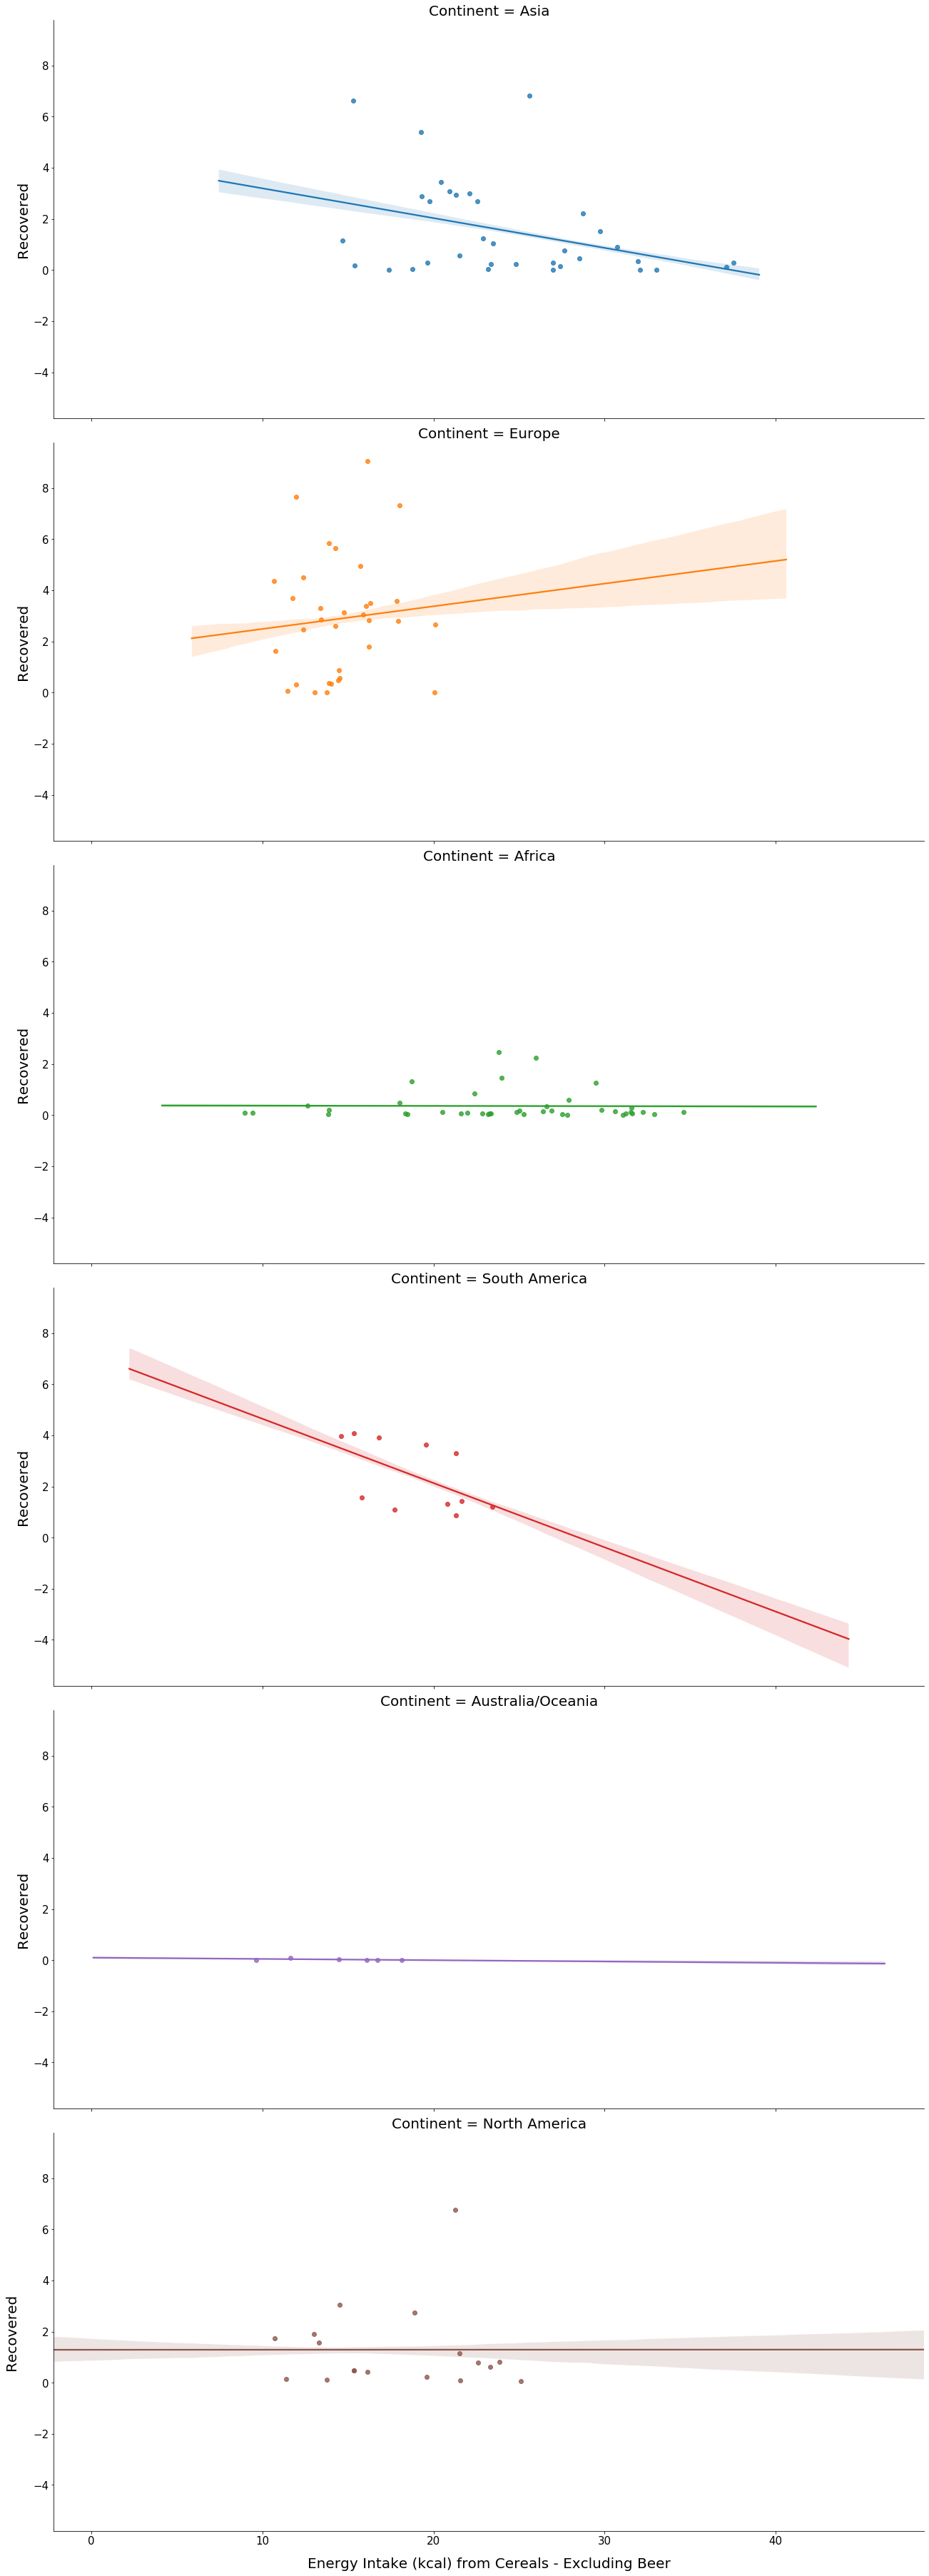

In [70]:
# Energy Intake Dataset

sns.lmplot(x = "Cereals - Excluding Beer", y = "Recovered", data = country_kcal_supply,hue = "Continent",aspect=2,height=10,ci = 30,fit_reg=True,row="Continent");
plt.xlabel("Energy Intake (kcal) from Cereals - Excluding Beer",labelpad = 15)
plt.ylabel("Recovered",labelpad = 20)
figure = plt.gcf()
figure.set_size_inches(18,50)

plt.rc("font", size = 14)
plt.rc("axes", labelsize = 18)